In [1]:
#tensorFlow para entrenar la red
import tensorflow as tf

# numpy :D
import numpy as np

# Imagenes
import skimage as ski
from skimage import data, io, filters
from skimage.transform import resize
from PIL import Image

# Graficado
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Lectura de archivos  
import os
import csv

#libreria números pseudo random
import random

#para plotear
import math
from scipy.fftpack import fft, ifft
from scipy import ndimage, misc
import scipy.misc

#importar sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

import cv2 as cv
import sys
import matplotlib.pyplot as plt
%matplotlib inline
print("OpenCV version:")
print(cv.__version__)

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

OpenCV version:
3.4.2


In [21]:
def VideoProcessing(numberFrames,frameRange,Folder,VideoNumberI,VideoNumberF,sizey,sizex):
    video = []
    for x in range(VideoNumberI,VideoNumberF):
        fps,frameCount,duration = frames(Folder + str(x+1) +'.mov')
        cap = cv.VideoCapture(Folder + str(x+1) +'.mov')
        fullVideo = saveVideo(frameCount,cap,sizey,sizex)
        print(len(fullVideo))
        frameRangeCounter = 0
        contadorGlobal = 0
        contador = 0
        initFrame = 0
        while(contadorGlobal < int(frameCount/(frameRange*framesSpace))):
            #initFrame = random.randint(1, frameRange)
            contador = 0
            videoTemporal = []
            for frame in fullVideo:
                if(contador >= initFrame and contador < initFrame + numberFrames):
                    #print("contador  " , contador , "   initFrame. " , initFrame , "   numberFrames. " , numberFrames)
                    videoTemporal.append(frame[0])
                    videoTemporal.append(frame[1])
                    videoTemporal.append(frame[2])
                    videoTemporal.append(frame[3])
                    videoTemporal.append(frame[4])
                    videoTemporal.append(frame[5])
                    videoTemporal.append(frame[6])
                    #videoTemporal.append(frame[7])
                    #videoTemporal.append(frame[8])
                    #videoTemporal.append(frame[9])
                    contador = contador + 1
                        
                else:
                    contador = contador + 1
            
            if(len(videoTemporal) == frameRange*filtros):
                video.append(videoTemporal)
            initFrame = initFrame + frameRange
            print("videoTemporal de frames ",initFrame, 'tamano  ', len(videoTemporal))
            contadorGlobal = contadorGlobal + 1        
        print('video   ', x)
            
    return video

In [22]:
def saveVideo(frameCount,cap,y,x):
    contador = 0
    fullVideo = []
    #guardamos todo el video en un vector de frames
    while(contador < frameCount):
        Video = [] 
        ret, frame2 = cap.read()
        if (frame2 is not None):
            #print(contador)
            #if(contador >= 1100):
            #    print(frame2)
            #    print(noSirve1)
            #    print(noSirve2)
            #if(contador > 742 and contador < 746):
            #    plt.imshow(frame2, interpolation='none', cmap='gray')
            #    plt.xticks([]), plt.yticks([])
            #    plt.show()
            #b,g,r = cv.split(frame2)
            gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
            face = face_cascade.detectMultiScale(gray, 1.05, 3)
            if(len(face) == 1):
                if(x != 0 and y != 0):
                    #print(face[0][0],face[0][1],face[0][2],face[0][3])
                    gray = redimensionar(gray,y,x,face)
                    pic1 = gray
                    #r = redimensionar(r,y,x)
                    #g = redimensionar(g,y,x)
                    #b = redimensionar(b,y,x)
                laplacian = cv.Laplacian(gray,cv.CV_8U)
                sobelx = cv.Sobel(gray,cv.CV_16S,1,0,ksize=5)
                sobely = cv.Sobel(gray,cv.CV_16S,0,1,ksize=5)
                kirs = kirsch_filter(gray)
                #Video.append(r)
                #Video.append(g)
                #Video.append(b)
                Video.append(gray)
                Video.append(sobelx)
                Video.append(sobely)
                Video.append(laplacian)
                Video.append(kirs)
                if(contador > 0):
                    #OPTx, OPTy = calculate_flow(pic1, gray)
                    #Video.append(OPTx)
                    #Video.append(OPTy)
                    fullVideo.append(Video)
                    ret2, noSirve2 = cap.read()
                    ret3, noSirve3 = cap.read()
                    #ret4, noSirve4 = cap.read()
                    contador = contador + framesSpace - 1
        contador = contador + 1
    cap.release()
    return fullVideo 

In [38]:
def saveVideo(frameCount,cap,y,x):
    contador = 0
    fullVideo = []
    face2 = [0,1]
    #guardamos todo el video en un vector de frames
    while(contador < frameCount):
        Video = [] 
        ret, frame2 = cap.read()
        if (frame2 is not None):
            #print(contador)
            #if(contador >= 1100):
            #    print(frame2)
            #    print(noSirve1)
            #    print(noSirve2)
            #if(contador > 742 and contador < 746):
            #    plt.imshow(frame2, interpolation='none', cmap='gray')
            #    plt.xticks([]), plt.yticks([])
            #    plt.show()
            #b,g,r = cv.split(frame2)
            gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
            face = face_cascade.detectMultiScale(gray, 1.05, 3)
            if(len(face) == 1 or len(face2)==1):
                if(len(face) != 1):
                    face = face2
                #print(face[0][0],face[0][1],face[0][2],face[0][3])
                gray2 = redimensionar(gray,y,x,face)
                #r = redimensionar(r,y,x)
                #g = redimensionar(g,y,x)
                #b = redimensionar(b,y,x)
                laplacian = cv.Laplacian(gray,cv.CV_8U)
                laplacian = redimensionar(laplacian,y,x,face)
                sobelx = cv.Sobel(gray,cv.CV_16S,1,0,ksize=5)
                sobelx = redimensionar(sobelx,y,x,face)
                sobely = cv.Sobel(gray,cv.CV_16S,0,1,ksize=5)
                sobely = redimensionar(sobely,y,x,face)
                kirs = kirsch_filter(gray)
                kirs = redimensionar(kirs,y,x,face)
                #Video.append(r)
                #Video.append(g)
                #Video.append(b)
                Video.append(gray2)
                Video.append(sobelx)
                Video.append(sobely)
                Video.append(laplacian)
                Video.append(kirs)
                if(contador > 0):
                    OPTx, OPTy = calculate_flow(pic1, gray)
                    OPTx = redimensionar(OPTx,y,x,face)
                    OPTy = redimensionar(OPTy,y,x,face)
                    Video.append(OPTx)
                    Video.append(OPTy)
                    fullVideo.append(Video)
                    temporalContador = framesSpace
                    while(temporalContador > 0):
                        ret2, noSirve1 = cap.read()
                        temporalContador = temporalContador - 1
            pic1 = gray
        contador = contador + 1
        face2 = face
    cap.release()
    return fullVideo 

In [39]:
def redimensionar(frame,y,x,face):
    frame=ski.util.img_as_ubyte(frame) #ni golfita idea, ya se!! convierte las imagenes a cosas menos pesadas
    #len(frame[0])
    #len(frame)
    #crop_img = frame[20:len(frame)-50, 110:len(frame[0])-50]
    #print(len(face))
    crop_img = frame[face[0][1]:face[0][1]+int(face[0][3]), face[0][0]:face[0][0]+face[0][2]]
    im = cv.resize(crop_img,(y,x), fx=0.5, fy=0.5, interpolation = cv.INTER_AREA)
    return im

In [40]:
def calculate_flow(frame_a, frame_b):
        flow = cv.calcOpticalFlowFarneback(
            frame_a,
            frame_b,
            None,
            0.5, 3, 15, 3, 5, 1.2, 0
        )

        # Change here
        horz = cv.normalize(flow[..., 0], None, 0, 255, cv.NORM_MINMAX)
        vert = cv.normalize(flow[..., 1], None, 0, 255, cv.NORM_MINMAX)
        horz = horz.astype('uint8')
        vert = vert.astype('uint8')

        return horz, vert

In [41]:
import numpy as np
import cv2

def kirsch_filter(gray):
    if gray.ndim > 2:
        raise Exception("illegal argument: input must be a single channel image (gray)")
    kernelG1 = np.array([[ 5,  5,  5],
                         [-3,  0, -3],
                         [-3, -3, -3]], dtype=np.int16)
    kernelG2 = np.array([[ 5,  5, -3],
                         [ 5,  0, -3],
                         [-3, -3, -3]], dtype=np.int16)
    kernelG3 = np.array([[ 5, -3, -3],
                         [ 5,  0, -3],
                         [ 5, -3, -3]], dtype=np.int16)
    kernelG4 = np.array([[-3, -3, -3],
                         [ 5,  0, -3],
                         [ 5,  5, -3]], dtype=np.int16)
    kernelG5 = np.array([[-3, -3, -3],
                         [-3,  0, -3],
                         [ 5,  5,  5]], dtype=np.int16)
    kernelG6 = np.array([[-3, -3, -3],
                         [-3,  0,  5],
                         [-3,  5,  5]], dtype=np.int16)
    kernelG7 = np.array([[-3, -3,  5],
                         [-3,  0,  5],
                         [-3, -3,  5]], dtype=np.int16)
    kernelG8 = np.array([[-3,  5,  5],
                         [-3,  0,  5],
                         [-3, -3, -3]], dtype=np.int16)

    g1 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g2 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g3 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g4 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g5 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g6 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g7 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g8 = cv2.normalize(cv2.filter2D(gray, cv2.CV_16S, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    magn = cv2.max(
        g1, cv2.max(
            g2, cv2.max(
                g3, cv2.max(
                    g4, cv2.max(
                        g5, cv2.max(
                            g6, cv2.max(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    return magn

In [42]:
def frames(video):
    cap = cv.VideoCapture(video)
    fps = cap.get(cv.CAP_PROP_FPS)      # OpenCV2 version 2 used "CV_CAP_PROP_FPS"
    frameCount = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    duration = frameCount/fps

    print('fps = ' + str(fps))
    print('number of frames = ' + str(frameCount))
    print('duration (S) = ' + str(duration))
    minutes = int(duration/60)
    seconds = duration%60
    print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))
    cap.release()
    return fps,frameCount,duration

In [3]:
numberFrames = 100  #18
frameRange = 100  #56
framesSpace = 2
#TruthFolder = "Videos/Truth/"
#DeceitFolder = "Videos/Deceit/"
#TruthVideoNumber = 66
#DeceitVideoNumber = 67
TruthVideoNumber = 141
DeceitVideoNumber = 141
TruthFolder = "Videos3/T/"
DeceitFolder = "Videos3/F/"
filtros = 7

# Correr hasta aqui si solamente se va a hacer shuffle, pasar al siguiente comentario 
## PD: no olvides cambiar en numero de frames que se van a procesar

In [44]:
VideoNumberI = 0
VideoNumberF = TruthVideoNumber
videosTruth = VideoProcessing(numberFrames,frameRange,TruthFolder,VideoNumberI,VideoNumberF,50,50)

fps = 29.969517952037982
number of frames = 1111
duration (S) = 37.071
duration (M:S) = 0:37.071
368
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   476
videoTemporal de frames  500 tamano   0
video    0
fps = 29.969740823575844
number of frames = 1139
duration (S) = 38.005
duration (M:S) = 0:38.005
377
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   539
videoTemporal de frames  500 tamano   0
video    1
fps = 29.969702759505417
number of frames = 1098
duration (S) = 36.637
duration (M:S) = 0:36.637
364
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   448
videoTemporal de frames  500 tamano   0
video    2
fps = 29.969838223197147
number of frame

360
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   420
videoTemporal de frames  500 tamano   0
video    26
fps = 29.969608284556507
number of frames = 1065
duration (S) = 35.536
duration (M:S) = 0:35.536
347
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   329
videoTemporal de frames  500 tamano   0
video    27
fps = 29.969638601416865
number of frames = 918
duration (S) = 30.631
duration (M:S) = 0:30.631
291
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   637
videoTemporal de frames  400 tamano   0
video    28
fps = 29.97002997002997
number of frames = 1200
duration (S) = 40.04
duration (M:S) = 0:40.04
398
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano  

355
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   385
videoTemporal de frames  500 tamano   0
video    53
fps = 30.0
number of frames = 1052
duration (S) = 35.06666666666667
duration (M:S) = 0:35.06666666666667
349
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   343
videoTemporal de frames  500 tamano   0
video    54
fps = 30.0
number of frames = 960
duration (S) = 32.0
duration (M:S) = 0:32.0
319
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   133
video    55
fps = 30.0
number of frames = 1125
duration (S) = 37.5
duration (M:S) = 0:37.5
375
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de f

332
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   224
video    78
fps = 29.97002997002997
number of frames = 1164
duration (S) = 38.8388
duration (M:S) = 0:38.8388
388
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   616
videoTemporal de frames  500 tamano   0
video    79
fps = 29.97002997002997
number of frames = 1054
duration (S) = 35.16846666666667
duration (M:S) = 0:35.16846666666667
351
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   357
videoTemporal de frames  500 tamano   0
video    80
fps = 29.97002997002997
number of frames = 1208
duration (S) = 40.30693333333333
duration (M:S) = 0:40.30693333333333
403
videoTemporal de frames  100 t

347
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   329
videoTemporal de frames  500 tamano   0
video    104
fps = 30.0
number of frames = 1070
duration (S) = 35.666666666666664
duration (M:S) = 0:35.666666666666664
357
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   399
videoTemporal de frames  500 tamano   0
video    105
fps = 30.0
number of frames = 1080
duration (S) = 36.0
duration (M:S) = 0:36.0
360
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   420
videoTemporal de frames  500 tamano   0
video    106
fps = 30.0
number of frames = 1014
duration (S) = 33.8
duration (M:S) = 0:33.8
338
videoTemporal de frames  100 tamano   700
videoTemporal 

388
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   616
videoTemporal de frames  500 tamano   0
video    130
fps = 29.97002997002997
number of frames = 830
duration (S) = 27.694333333333333
duration (M:S) = 0:27.694333333333333
277
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   539
videoTemporal de frames  400 tamano   0
video    131
fps = 29.97002997002997
number of frames = 1179
duration (S) = 39.3393
duration (M:S) = 0:39.3393
393
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   651
videoTemporal de frames  500 tamano   0
video    132
fps = 29.97002997002997
number of frames = 863
duration (S) = 28.795433333333335
duration (M:S) = 0:28.795433333333335
288
videoTemporal de frames  10

In [45]:
print(len(videosTruth))
#print(videosTruth[0])

419


## Training videos: 1 - 52

0


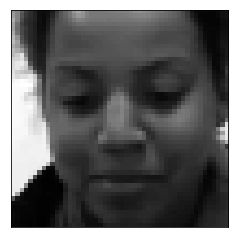

1


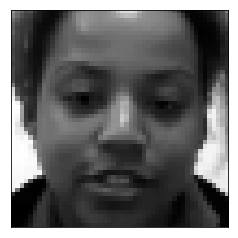

2


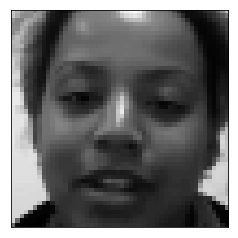

3


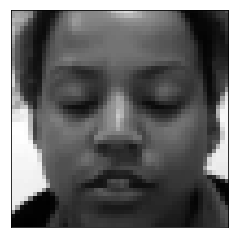

4


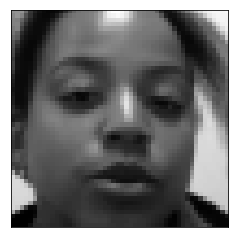

5


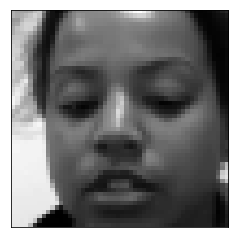

6

In [13]:
for x in range(int(len(videosTruth))):
    print(x)
    plt.imshow(videosTruth[x][0], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
len(videosTruth)

In [16]:
len(videosTruth)

307

In [46]:
#TruthR = []
#TruthG = []
#TruthB = []
TruthGS = []
TruthSX = []
TruthSY = []
TruthLAP = []
TruthKIR = []
TruthOX = []
TruthOY = []
yTruth = []
contadorr = 0
for x in videosTruth:
    #temporalR = []
    #temporalG = []
    #temporalB = []
    temporalGS = []
    temporalSX = []
    temporalSY = []
    temporalLAP = []
    temporalKIR = []
    temporalOX = []
    temporalOY = []
    if(len(x)==numberFrames*filtros):
        contador = 0
        for y in range(numberFrames):
            temporalGS.append(x[contador])
            contador = contador + filtros

        contador = 1
        for y in range(numberFrames):
            temporalSX.append(x[contador])
            contador = contador + filtros

        contador = 2
        for y in range(numberFrames):
            temporalSY.append(x[contador])
            contador = contador + filtros

        contador = 3
        for y in range(numberFrames):
            temporalLAP.append(x[contador])
            contador = contador + filtros
            
        contador = 4
        for y in range(numberFrames):
            temporalKIR.append(x[contador])
            contador = contador + filtros
            
        contador = 5
        for y in range(numberFrames):
            temporalOX.append(x[contador])
            contador = contador + filtros
            
        contador = 6
        for y in range(numberFrames):
            temporalOY.append(x[contador])
            contador = contador + filtros

        #TruthR.append(temporalR)
        #TruthG.append(temporalG)
        #TruthB.append(temporalB)
        TruthGS.append(temporalGS)
        TruthSX.append(temporalSX)
        TruthSY.append(temporalSY)
        TruthLAP.append(temporalLAP)
        TruthKIR.append(temporalKIR)
        TruthOX.append(temporalOX)
        TruthOY.append(temporalOY)
        yTruth.append([0,1])
        contadorr += 1
    else:
        print(contadorr,len(x))
        contadorr += 1

In [47]:
print("TruthGS ",len(TruthGS),"  TruthSX  ",len(TruthSX),"TruthSY  ",len(TruthSY),
      "TruthLAP ",len(TruthLAP),"  TruthKIR  ",len(TruthKIR),
      "  TruthOX ",len(TruthOX),"  TruthOY  ",len(TruthOY),"  yTruth  ",len(yTruth))

TruthGS  419   TruthSX   419 TruthSY   419 TruthLAP  419   TruthKIR   419   TruthOX  419   TruthOY   419   yTruth   419


0


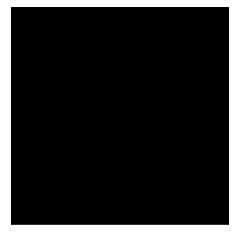

1


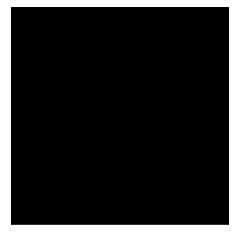

2


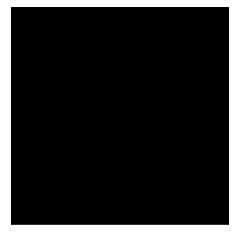

3


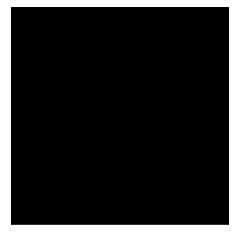

4


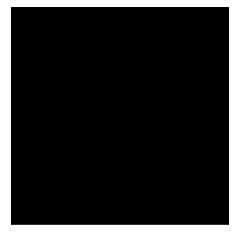

5


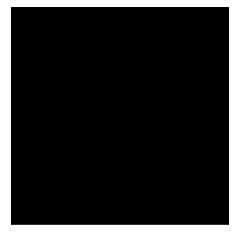

6


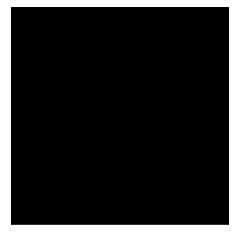

7


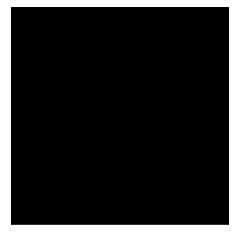

8


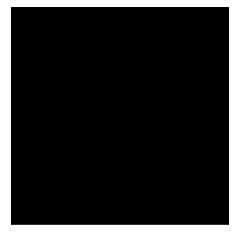

9


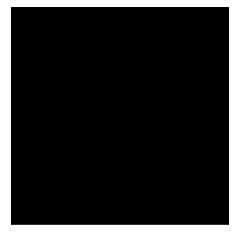

10


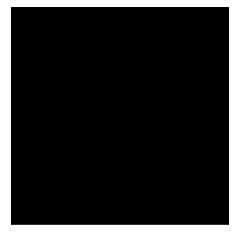

11


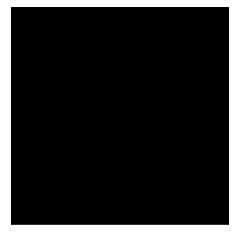

12


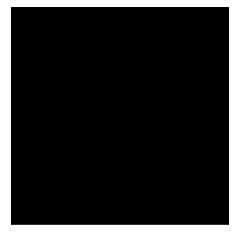

13


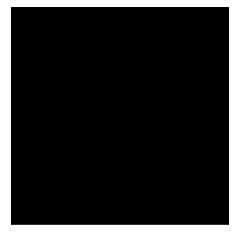

14


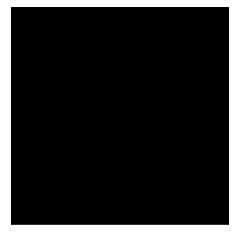

15


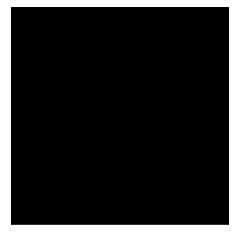

16


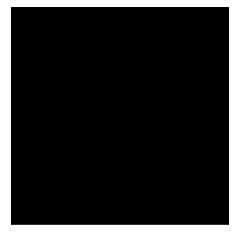

17


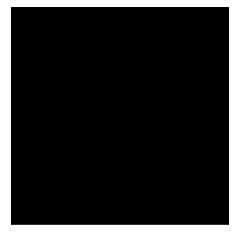

18


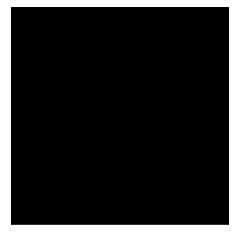

19


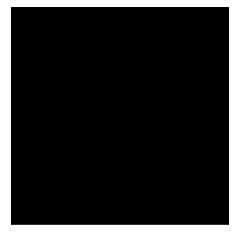

20


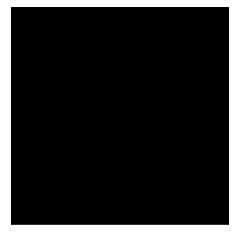

21


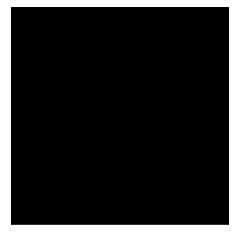

22


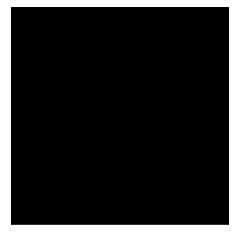

23


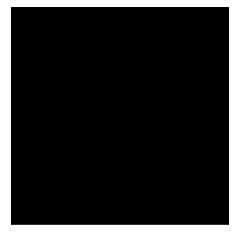

24


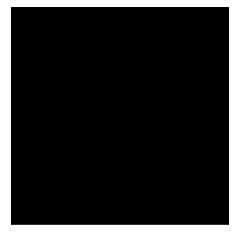

25


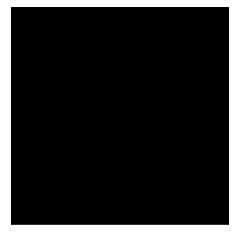

26


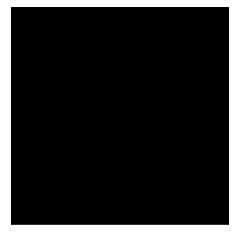

27


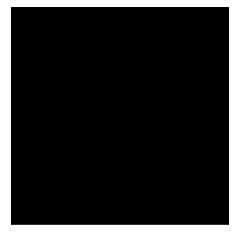

28


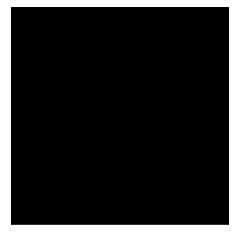

29


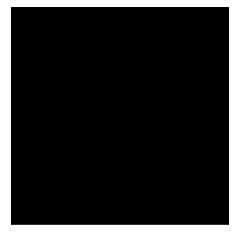

30


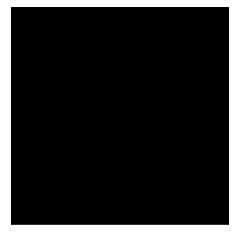

31


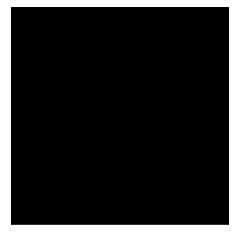

32


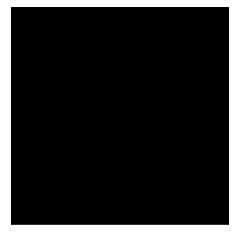

33


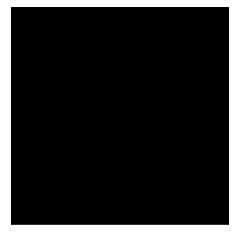

34


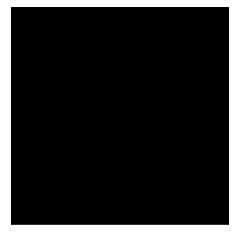

35


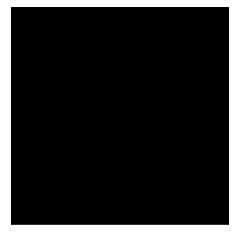

36


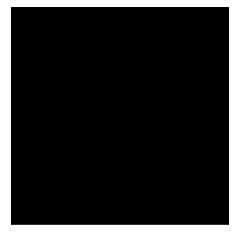

37


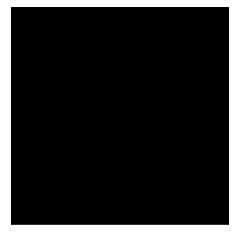

38


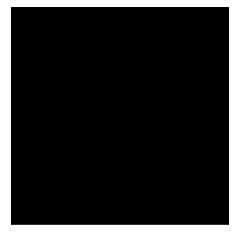

39


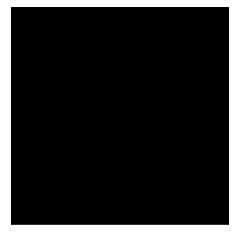

40


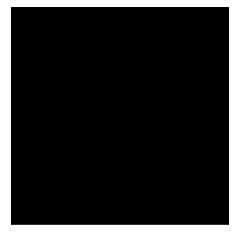

41


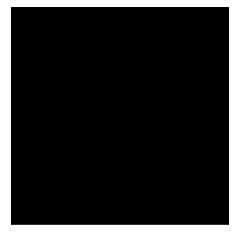

42


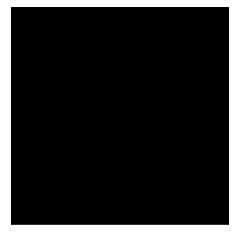

43


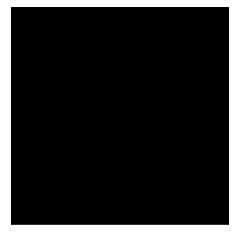

44


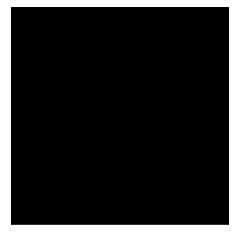

45


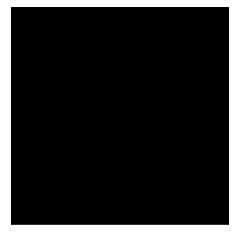

46


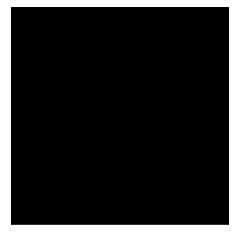

47


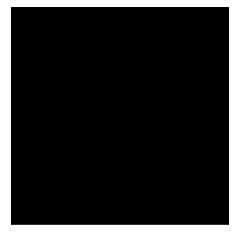

48


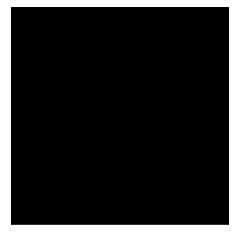

49


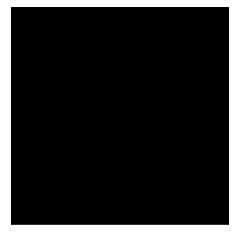

50


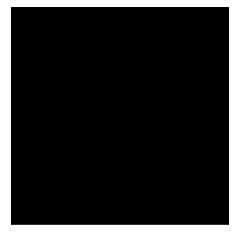

51


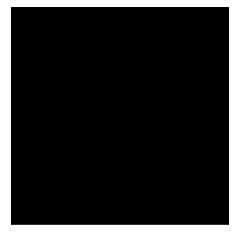

52


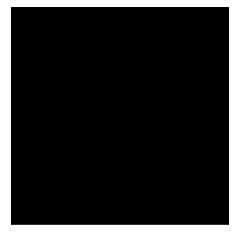

53


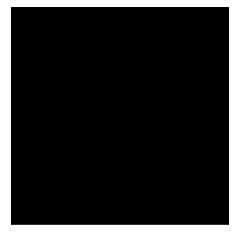

54


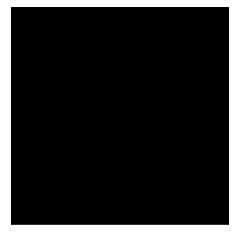

55


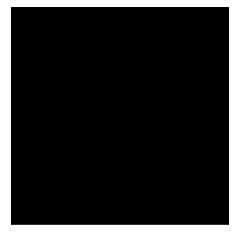

56


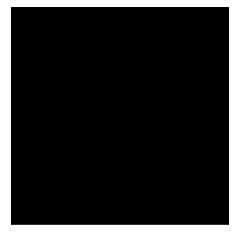

57


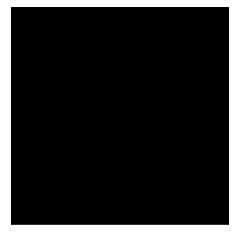

58


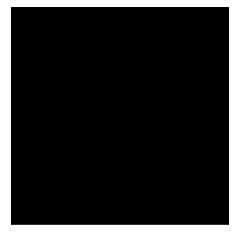

59


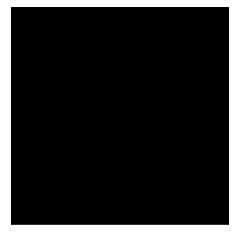

60


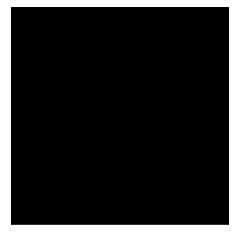

61


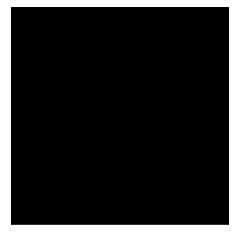

62


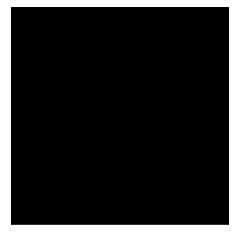

63


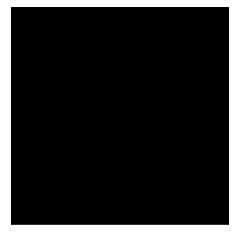

64


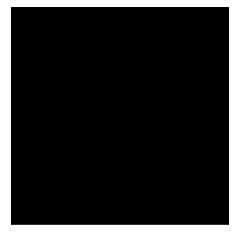

65


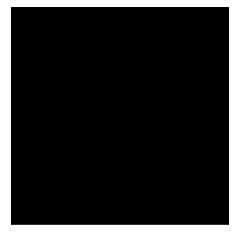

66


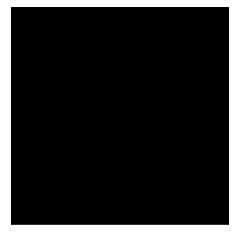

67


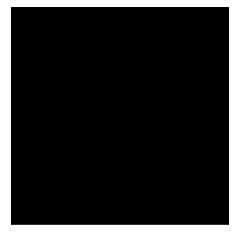

68


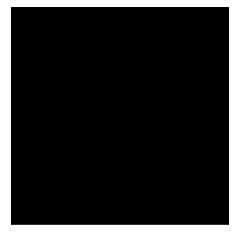

69


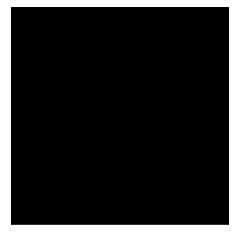

NameError: name 'videosTruth' is not defined

In [11]:
for x in range(70):
    print(x)
    plt.imshow(TruthOX[1][x], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
len(videosTruth)

In [48]:
VideoNumberI = 0
VideoNumberF = DeceitVideoNumber
videosDeceit = VideoProcessing(numberFrames,frameRange,DeceitFolder,VideoNumberI,VideoNumberF,50,50)

fps = 29.96984820128925
number of frames = 1153
duration (S) = 38.472
duration (M:S) = 0:38.472
382
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   574
videoTemporal de frames  500 tamano   0
video    0
fps = 29.969308539447553
number of frames = 1162
duration (S) = 38.773
duration (M:S) = 0:38.773
385
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   595
videoTemporal de frames  500 tamano   0
video    1
fps = 29.969755292823756
number of frames = 872
duration (S) = 29.096
duration (M:S) = 0:29.096
288
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   616
videoTemporal de frames  400 tamano   0
video    2
fps = 29.969452624047115
number of frames = 1089
duration (S) = 36.336999999999996
d

367
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   469
videoTemporal de frames  500 tamano   0
video    26
fps = 29.969340827797648
number of frames = 1173
duration (S) = 39.14
duration (M:S) = 0:39.14
389
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   623
videoTemporal de frames  500 tamano   0
video    27
fps = 29.96951219512195
number of frames = 983
duration (S) = 32.800000000000004
duration (M:S) = 0:32.800000000000004
325
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   175
video    28
fps = 29.96996176952485
number of frames = 878
duration (S) = 29.296
duration (M:S) = 0:29.296
290
videoTemporal de frames  100 tamano   700
videoTemporal

355
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   385
videoTemporal de frames  500 tamano   0
video    53
fps = 30.0
number of frames = 1052
duration (S) = 35.06666666666667
duration (M:S) = 0:35.06666666666667
351
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   357
videoTemporal de frames  500 tamano   0
video    54
fps = 30.0
number of frames = 880
duration (S) = 29.333333333333332
duration (M:S) = 0:29.333333333333332
293
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   651
videoTemporal de frames  400 tamano   0
video    55
fps = 30.0
number of frames = 1091
duration (S) = 36.36666666666667
duration (M:S) = 0:36.36666666666667
364
videoTemporal de frames  100 tamano   700
videoTem

390
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   630
videoTemporal de frames  500 tamano   0
video    79
fps = 29.97002997002997
number of frames = 1033
duration (S) = 34.46776666666667
duration (M:S) = 0:34.46776666666667
344
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   308
videoTemporal de frames  500 tamano   0
video    80
fps = 29.97002997002997
number of frames = 1086
duration (S) = 36.236200000000004
duration (M:S) = 0:36.236200000000004
362
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   434
videoTemporal de frames  500 tamano   0
video    81
fps = 29.97002997002997
number of frames = 1045
duration (S) = 34.86816666666667
duration 

289
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   623
videoTemporal de frames  400 tamano   0
video    105
fps = 30.0
number of frames = 1078
duration (S) = 35.93333333333333
duration (M:S) = 0:35.93333333333333
359
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   413
videoTemporal de frames  500 tamano   0
video    106
fps = 30.0
number of frames = 1056
duration (S) = 35.2
duration (M:S) = 0:35.2
352
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   364
videoTemporal de frames  500 tamano   0
video    107
fps = 30.0
number of frames = 1048
duration (S) = 34.93333333333333
duration (M:S) = 0:34.93333333333333
349
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tam

388
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   616
videoTemporal de frames  500 tamano   0
video    131
fps = 29.97002997002997
number of frames = 1236
duration (S) = 41.2412
duration (M:S) = 0:41.2412
412
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   700
videoTemporal de frames  500 tamano   84
videoTemporal de frames  600 tamano   0
video    132
fps = 29.97002997002997
number of frames = 1220
duration (S) = 40.70733333333333
duration (M:S) = 0:40.70733333333333
407
videoTemporal de frames  100 tamano   700
videoTemporal de frames  200 tamano   700
videoTemporal de frames  300 tamano   700
videoTemporal de frames  400 tamano   700
videoTemporal de frames  500 tamano   49
videoTemporal de frames  600 tamano   0
video    133
fps = 30.0
number of frames

In [20]:
len(videosDeceit[10])

500

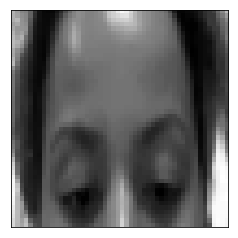

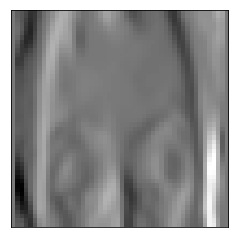

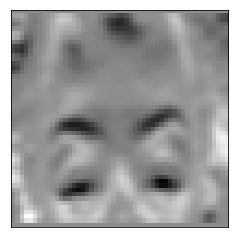

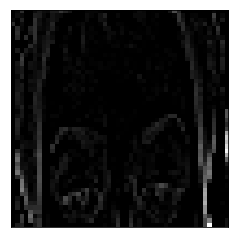

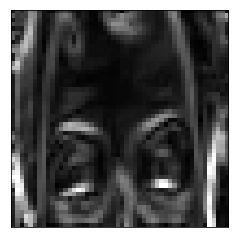

In [206]:
for x in range(419):
    plt.imshow(videosDeceit[0][x], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [49]:
len(videosDeceit)

417

## deceit training: 1 - 45

In [50]:
#DeceitR = []
#DeceitG = []
#DeceitB = []
DeceitGS = []
DeceitSX = []
DeceitSY = []
DeceitLAP = []
DeceitKIR = []
DeceitOX = []
DeceitOY = []
yDeceit = []
contadorr = 0
for x in videosDeceit:
    #temporalR = []
    #temporalG = []
    #temporalB = []
    temporalGS = []
    temporalSX = []
    temporalSY = []
    temporalLAP = []
    temporalKIR = []
    temporalOX = []
    temporalOY = []
    if(len(x)==numberFrames*filtros):
        contador = 0
        for y in range(numberFrames):
            temporalGS.append(x[contador])
            contador = contador + filtros

        contador = 1
        for y in range(numberFrames):
            temporalSX.append(x[contador])
            contador = contador + filtros

        contador = 2
        for y in range(numberFrames):
            temporalSY.append(x[contador])
            contador = contador + filtros

        contador = 3
        for y in range(numberFrames):
            temporalLAP.append(x[contador])
            contador = contador + filtros
            
        contador = 4
        for y in range(numberFrames):
            temporalKIR.append(x[contador])
            contador = contador + filtros
            
        contador = 5
        for y in range(numberFrames):
            temporalOX.append(x[contador])
            contador = contador + filtros
            
        contador = 6
        for y in range(numberFrames):
            temporalOY.append(x[contador])
            contador = contador + filtros

        #DeceitR.append(temporalR)
        #DeceitG.append(temporalG)
        #DeceitB.append(temporalB)
        DeceitGS.append(temporalGS)
        DeceitSX.append(temporalSX)
        DeceitSY.append(temporalSY)
        DeceitLAP.append(temporalLAP)
        DeceitKIR.append(temporalKIR)
        DeceitOX.append(temporalOX)
        DeceitOY.append(temporalOY)
        yDeceit.append([1,0])
        contadorr += 1
    else:
        print(contadorr,len(x))
        contadorr += 1

In [22]:
print("TruthGS ",len(TruthGS),"  TruthSX  ",len(TruthSX),"TruthSY  ",len(TruthSY),
      "TruthLAP ",len(TruthLAP),"  TruthKIR  ",len(TruthKIR),
      "  TruthOX ",len(TruthOX),"  TruthOY  ",len(TruthOY),"  yTruth  ",len(yTruth))

TruthGS  307   TruthSX   307 TruthSY   307 TruthLAP  307   TruthKIR   307   TruthOX  0   TruthOY   0   yTruth   307


In [51]:
print("TruthGS ",len(TruthGS),"  TruthSX  ",len(TruthSX),"TruthSY  ",len(TruthSY),
      "TruthLAP ",len(TruthLAP),"  TruthKIR  ",len(TruthKIR),
      "  TruthOX ",len(TruthOX),"  TruthOY  ",len(TruthOY),"  yTruth  ",len(yTruth))

TruthGS  419   TruthSX   419 TruthSY   419 TruthLAP  419   TruthKIR   419   TruthOX  419   TruthOY   419   yTruth   419


In [23]:
print("DeceitGS ",len(DeceitGS),"  DeceitSX  ",len(DeceitSX),"DeceitSY  ",len(DeceitSY),
      "DeceitLAP ",len(DeceitLAP),"  DeceitKIR  ",len(DeceitKIR),
      "  DeceitOX ",len(DeceitOX),"  DeceitOY  ",len(DeceitOY),"  yDeceit  ",len(yDeceit))

DeceitGS  336   DeceitSX   336 DeceitSY   336 DeceitLAP  336   DeceitKIR   336   DeceitOX  0   DeceitOY   0   yDeceit   336


In [52]:
print("DeceitGS ",len(DeceitGS),"  DeceitSX  ",len(DeceitSX),"DeceitSY  ",len(DeceitSY),
      "DeceitLAP ",len(DeceitLAP),"  DeceitKIR  ",len(DeceitKIR),
      "  DeceitOX ",len(DeceitOX),"  DeceitOY  ",len(DeceitOY),"  yDeceit  ",len(yDeceit))

DeceitGS  417   DeceitSX   417 DeceitSY   417 DeceitLAP  417   DeceitKIR   417   DeceitOX  417   DeceitOY   417   yDeceit   417


In [53]:
#np.save('Data'+ str(numberFrames)+'Frames/TruthR'+str(numberFrames)+'.npy',np.array(TruthR))
#np.save('Data'+ str(numberFrames)+'Frames/TruthG'+str(numberFrames)+'.npy',np.array(TruthG))
#np.save('Data'+str(numberFrames)+'Frames/TruthB'+str(numberFrames)+'.npy',np.array(TruthB))
np.save('Data'+ str(numberFrames)+'FramesFull/TruthGS'+str(numberFrames)+'.npy',np.array(TruthGS))
np.save('Data'+ str(numberFrames)+'FramesFull/TruthSX'+str(numberFrames)+'.npy',np.array(TruthSX))
np.save('Data'+str(numberFrames)+'FramesFull/TruthSY'+str(numberFrames)+'.npy',np.array(TruthSY))
np.save('Data'+ str(numberFrames)+'FramesFull/TruthLAP'+str(numberFrames)+'.npy',np.array(TruthLAP))
np.save('Data'+str(numberFrames)+'FramesFull/TruthKIR'+str(numberFrames)+'.npy',np.array(TruthKIR))
np.save('Data'+str(numberFrames)+'FramesFull/TruthOX'+str(numberFrames)+'.npy',np.array(TruthOX))
np.save('Data'+str(numberFrames)+'FramesFull/TruthOY'+str(numberFrames)+'.npy',np.array(TruthOY))
np.save('Data'+str(numberFrames)+'FramesFull/TruthY'+str(numberFrames)+'.npy',np.array(yTruth))

In [54]:
#np.save('Data'+ str(numberFrames)+'Frames/DeceitR'+str(numberFrames)+'.npy',np.array(DeceitR))
#np.save('Data'+ str(numberFrames)+'Frames/DeceitG'+str(numberFrames)+'.npy',np.array(DeceitG))
#np.save('Data'+str(numberFrames)+'Frames/DeceitB'+str(numberFrames)+'.npy',np.array(DeceitB))
np.save('Data'+str(numberFrames)+'FramesFull/DeceitGS'+str(numberFrames)+'.npy',np.array(DeceitGS))
np.save('Data'+str(numberFrames)+'FramesFull/DeceitSX'+str(numberFrames)+'.npy',np.array(DeceitSX))
np.save('Data'+str(numberFrames)+'FramesFull/DeceitSY'+str(numberFrames)+'.npy',np.array(DeceitSY))
np.save('Data'+ str(numberFrames)+'FramesFull/DeceitLAP'+str(numberFrames)+'.npy',np.array(DeceitLAP))
np.save('Data'+str(numberFrames)+'FramesFull/DeceitKIR'+str(numberFrames)+'.npy',np.array(DeceitKIR))
np.save('Data'+str(numberFrames)+'FramesFull/DeceitOX'+str(numberFrames)+'.npy',np.array(DeceitOX))
np.save('Data'+str(numberFrames)+'FramesFull/DeceitOY'+str(numberFrames)+'.npy',np.array(DeceitOY))
np.save('Data'+str(numberFrames)+'FramesFull/DeceitY'+str(numberFrames)+'.npy',np.array(yDeceit))

# Si solamente se quiere hacer suffle y ya se tienen los datos limpios. ejecutar esto que esta en comentarios para no volver a cargar los videos

In [4]:
#TruthR =  np.load('Data'+ str(numberFrames)+'Frames/TruthR'+str(numberFrames)+'.npy')
#TruthG =  np.load('Data'+ str(numberFrames)+'Frames/TruthG'+str(numberFrames)+'.npy')
#TruthB =  np.load('Data'+str(numberFrames)+'Frames/TruthB'+str(numberFrames)+'.npy')

TruthGS =  np.load('Data'+str(numberFrames)+'FramesFull/TruthGS'+str(numberFrames)+'.npy')
TruthSX =  np.load('Data'+str(numberFrames)+'FramesFull/TruthSX'+str(numberFrames)+'.npy')
TruthSY =  np.load('Data'+str(numberFrames)+'FramesFull/TruthSY'+str(numberFrames)+'.npy')

TruthLAP =  np.load('Data'+ str(numberFrames)+'FramesFull/TruthLAP'+str(numberFrames)+'.npy')
TruthKIR =  np.load('Data'+str(numberFrames)+'FramesFull/TruthKIR'+str(numberFrames)+'.npy')

TruthOX =  np.load('Data'+str(numberFrames)+'FramesFull/TruthOX'+str(numberFrames)+'.npy')
TruthOY =  np.load('Data'+str(numberFrames)+'FramesFull/TruthOY'+str(numberFrames)+'.npy')
yTruth  =  np.load('Data'+str(numberFrames)+'FramesFull/TruthY'+str(numberFrames)+'.npy')
print("TruthGS ",len(TruthGS),"  TruthSX  ",len(TruthSX),"TruthSY  ",len(TruthSY),
      "  TruthOX ",len(TruthOX),"  TruthOY  ",len(TruthOY),"  yTruth  ",len(yTruth))
print("TruthGS ",len(TruthGS),"  TruthOX ",len(TruthOX),"  TruthOY  ",len(TruthOY),"  yTruth  ",len(yTruth))

TruthGS  419   TruthSX   419 TruthSY   419   TruthOX  419   TruthOY   419   yTruth   419
TruthGS  419   TruthOX  419   TruthOY   419   yTruth   419


In [57]:
#DeceitR =  np.load('Data'+ str(numberFrames)+'Frames/DeceitR'+str(numberFrames)+'.npy')
#DeceitG =  np.load('Data'+ str(numberFrames)+'Frames/DeceitG'+str(numberFrames)+'.npy')
#DeceitB =  np.load('Data'+str(numberFrames)+'Frames/DeceitB'+str(numberFrames)+'.npy')

DeceitGS =  np.load('Data'+str(numberFrames)+'FramesFull/DeceitGS'+str(numberFrames)+'.npy')
DeceitSX =  np.load('Data'+str(numberFrames)+'FramesFull/DeceitSX'+str(numberFrames)+'.npy')
DeceitSY =  np.load('Data'+str(numberFrames)+'FramesFull/DeceitSY'+str(numberFrames)+'.npy')

DeceitLAP =  np.load('Data'+ str(numberFrames)+'FramesFull/DeceitLAP'+str(numberFrames)+'.npy')
DeceitKIR =  np.load('Data'+str(numberFrames)+'FramesFull/DeceitKIR'+str(numberFrames)+'.npy')

DeceitOX =  np.load('Data'+str(numberFrames)+'FramesFull/DeceitOX'+str(numberFrames)+'.npy')
DeceitOY =  np.load('Data'+str(numberFrames)+'FramesFull/DeceitOY'+str(numberFrames)+'.npy')
yDeceit  =  np.load('Data'+str(numberFrames)+'FramesFull/DeceitY'+str(numberFrames)+'.npy')
print("DeceitGS ",len(DeceitGS),"  DeceitOX ",len(DeceitOX),"  DeceitOY  ",len(DeceitOY),"  DeceitOY  ",len(yDeceit))

DeceitGS  417   DeceitOX  417   DeceitOY   417   DeceitOY   417


In [213]:
yTruth

[[0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 

In [ ]:
#DataRTrain = np.concatenate((TruthR , DeceitR),axis=0)
#DataGTrain =  np.concatenate((TruthG , DeceitG),axis=0)
#DataBTrain = np.concatenate((TruthB , DeceitB),axis=0)

In [58]:
DataGSTrain = np.concatenate((TruthGS , DeceitGS),axis=0)
DataSXTrain =  np.concatenate((TruthSX , DeceitSX),axis=0)
DataSYTrain = np.concatenate((TruthSY , DeceitSY),axis=0)

In [59]:
DataLAPTrain = np.concatenate((TruthLAP , DeceitLAP),axis=0)
DataKIRTrain = np.concatenate((TruthKIR , DeceitKIR),axis=0)

In [60]:
DataOXTrain = np.concatenate((TruthOX , DeceitOX),axis=0)
DataOYTrain = np.concatenate((TruthOY , DeceitOY),axis=0)

In [61]:
DatayTrain = np.concatenate((yTruth , yDeceit),axis=0)

In [62]:
print("DataGSTrain ",len(DataGSTrain),"  DatayTrain  ",len(DatayTrain))

DataGSTrain  836   DatayTrain   836


In [63]:
print("DataGSTrain ",len(DataGSTrain),"  DatayTrain  ",len(DatayTrain))

DataGSTrain  836   DatayTrain   836


In [31]:
#np.save('Data'+str(numberFrames)+'Frames/Shuffle/TrainR'+str(numberFrames)+'.npy',np.array(DataRTrain))
#np.save('Data'+str(numberFrames)+'Frames/Shuffle/TrainG'+str(numberFrames)+'.npy',np.array(DataGTrain))
#np.save('Data'+str(numberFrames)+'Frames/Shuffle/TrainB'+str(numberFrames)+'.npy',np.array(DataBTrain))

In [64]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainGS'+str(numberFrames)+'.npy',np.array(DataGSTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainSX'+str(numberFrames)+'.npy',np.array(DataSXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainSY'+str(numberFrames)+'.npy',np.array(DataSYTrain))

In [65]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainLAP'+str(numberFrames)+'.npy',np.array(DataLAPTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainKIR'+str(numberFrames)+'.npy',np.array(DataKIRTrain))

In [66]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainOX'+str(numberFrames)+'.npy',np.array(DataOXTrain))
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainOY'+str(numberFrames)+'.npy',np.array(DataOYTrain))

In [67]:
np.save('Data'+str(numberFrames)+'FramesFull/Shuffle/TrainY'+str(numberFrames)+'.npy',np.array(DatayTrain))

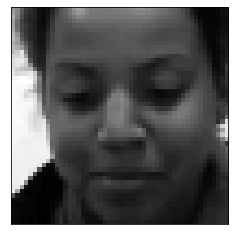

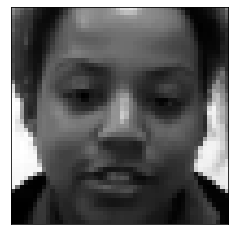

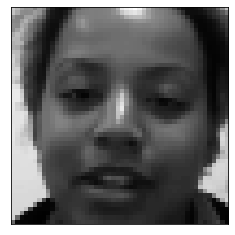

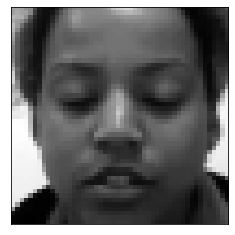

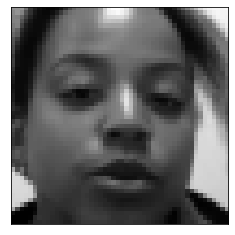

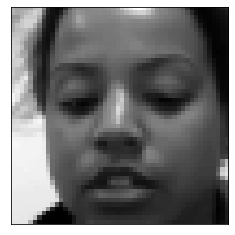

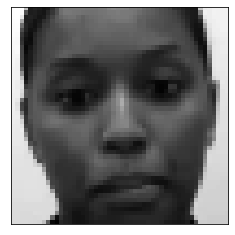

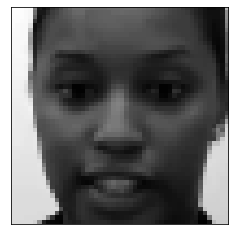

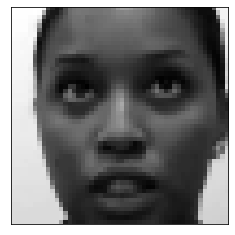

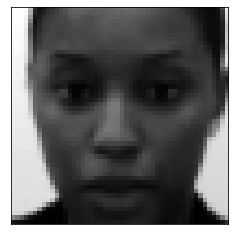

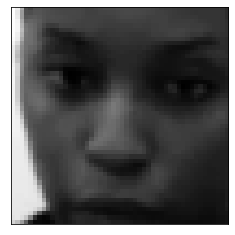

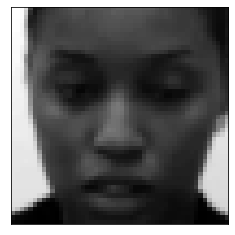

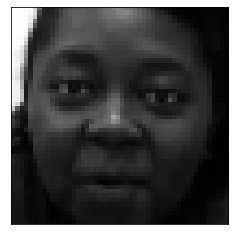

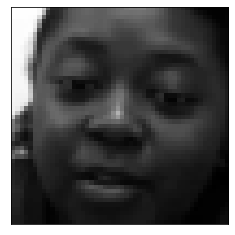

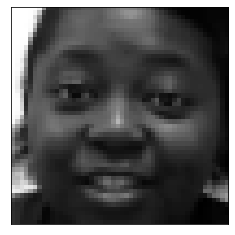

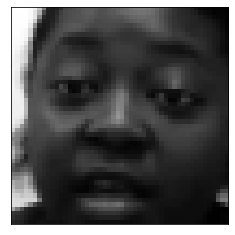

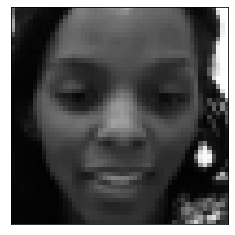

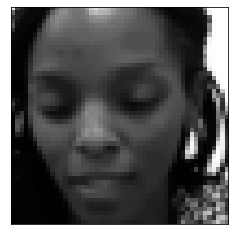

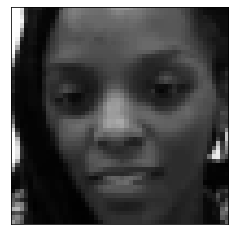

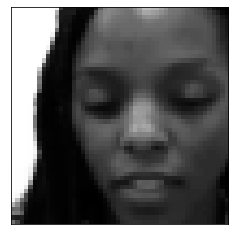

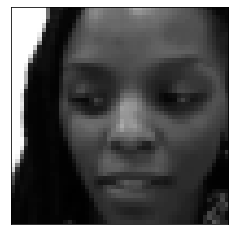

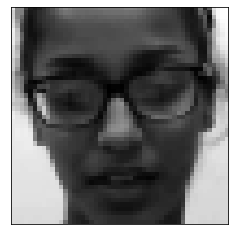

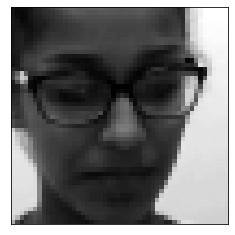

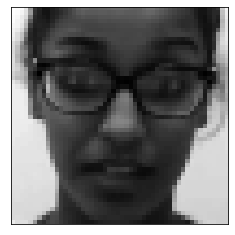

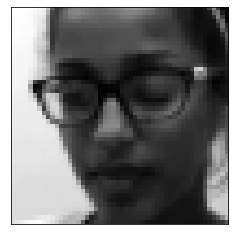

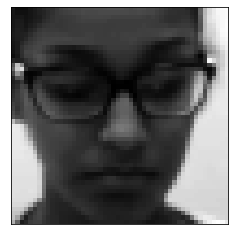

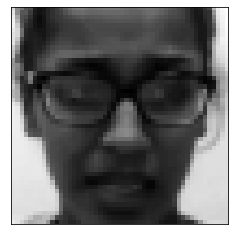

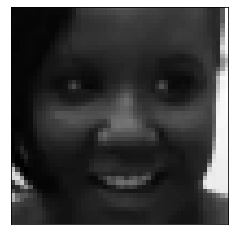

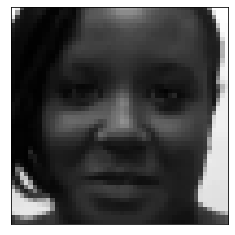

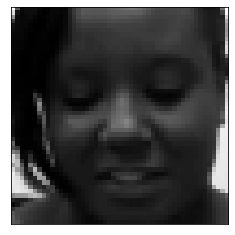

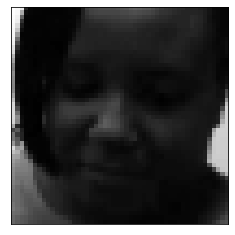

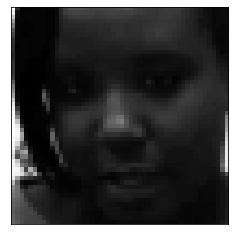

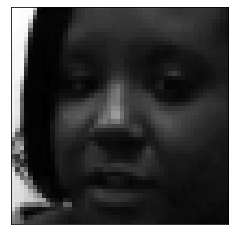

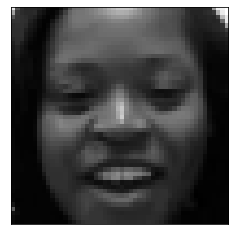

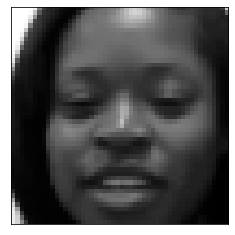

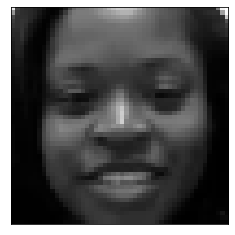

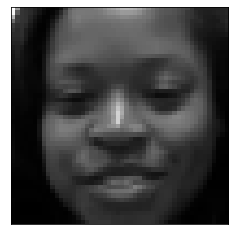

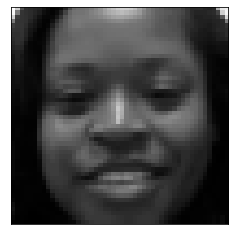

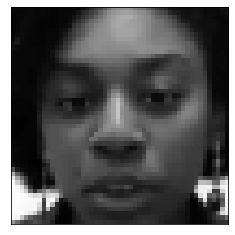

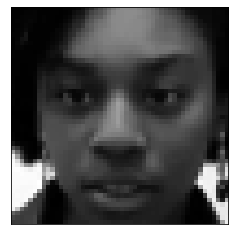

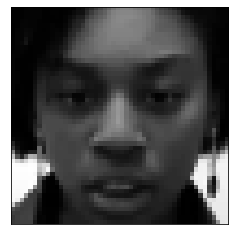

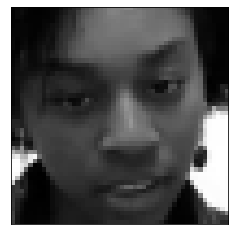

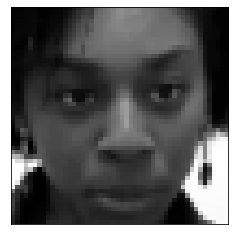

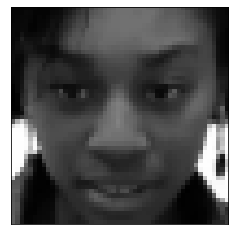

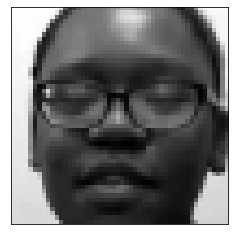

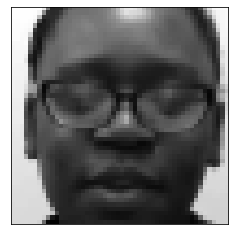

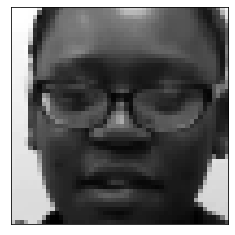

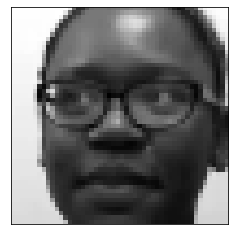

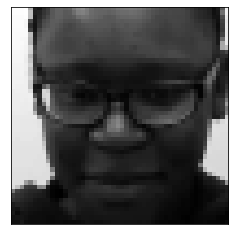

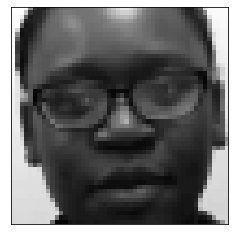

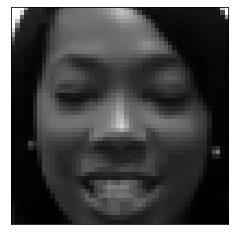

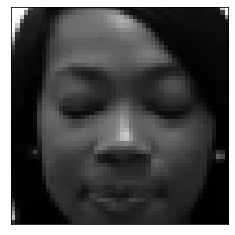

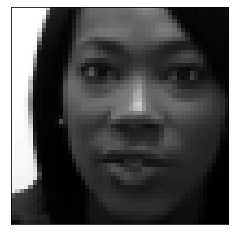

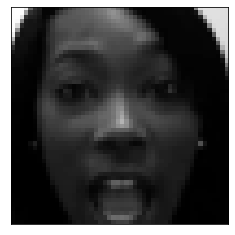

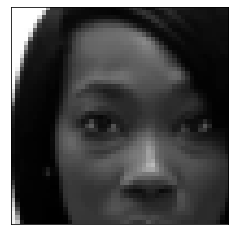

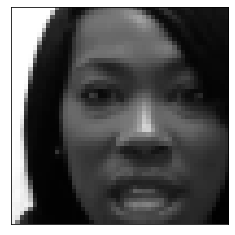

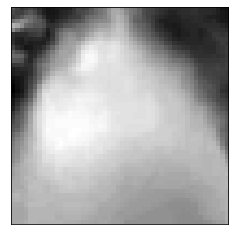

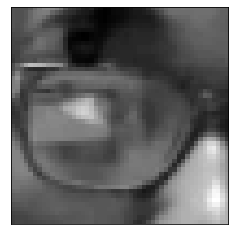

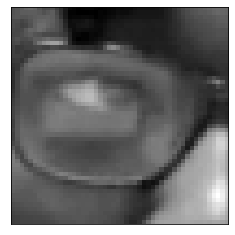

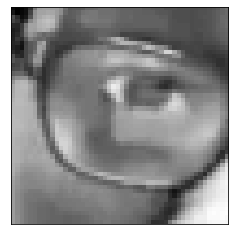

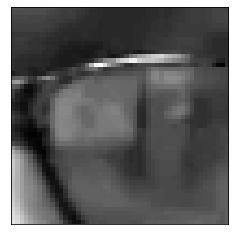

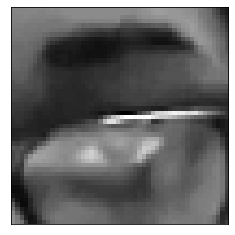

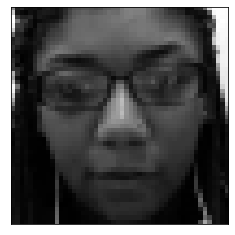

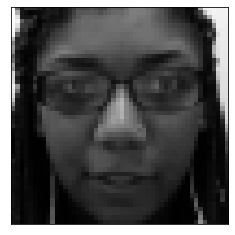

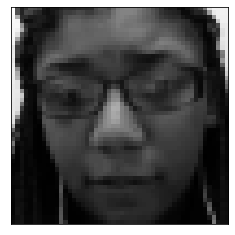

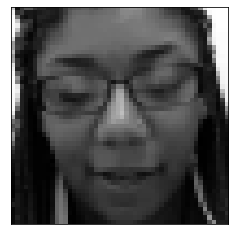

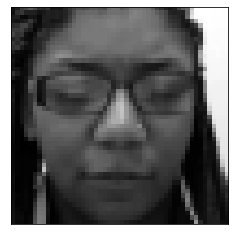

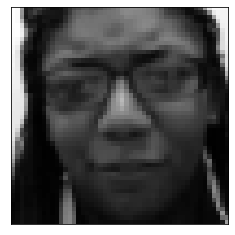

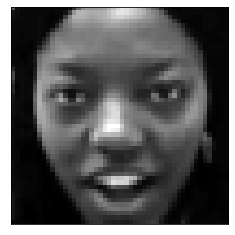

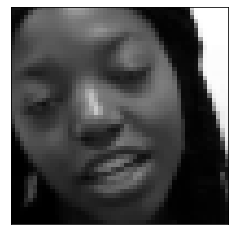

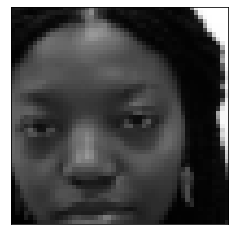

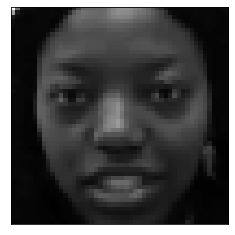

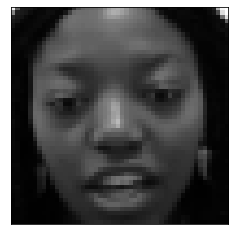

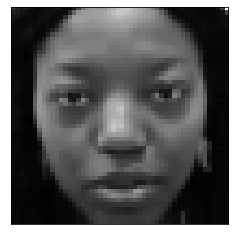

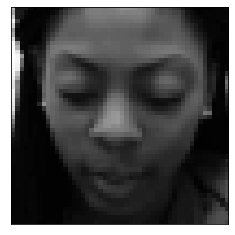

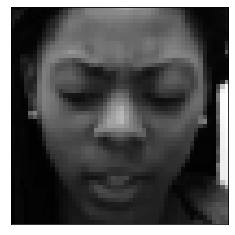

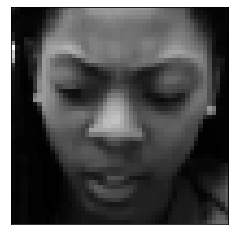

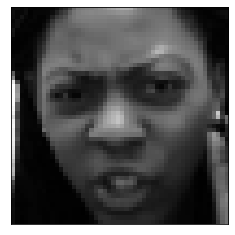

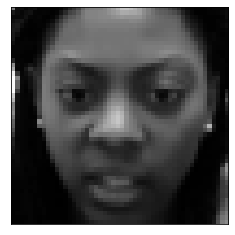

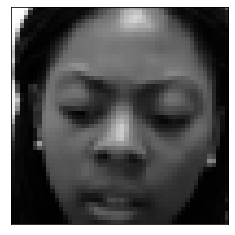

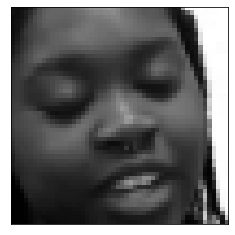

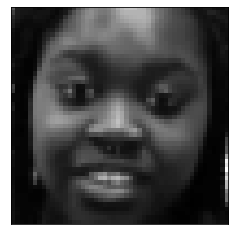

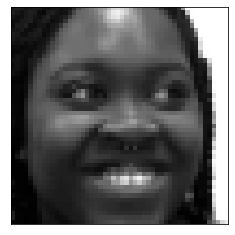

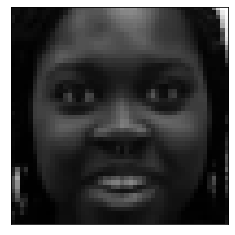

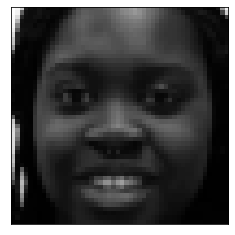

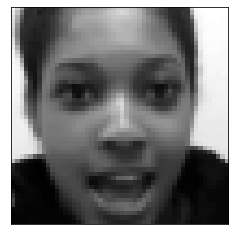

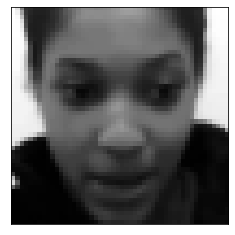

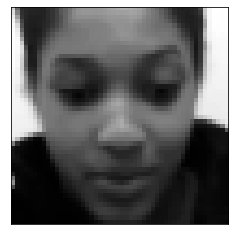

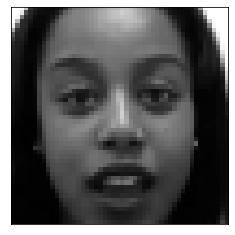

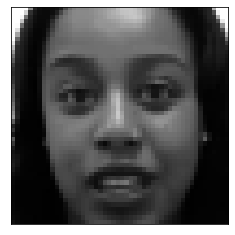

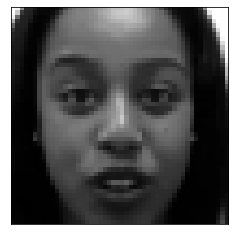

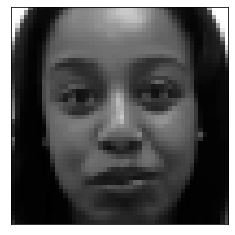

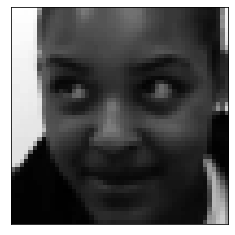

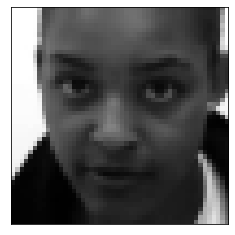

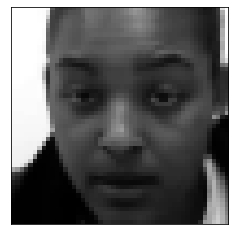

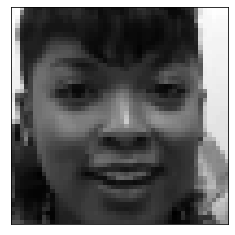

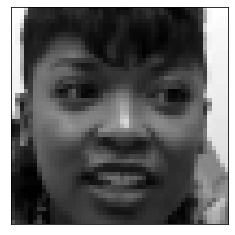

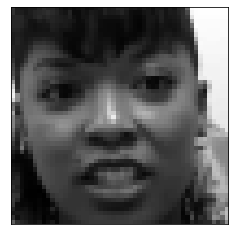

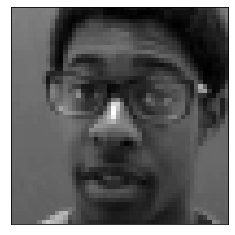

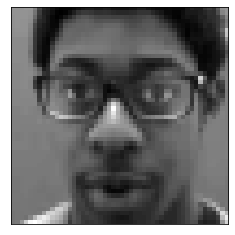

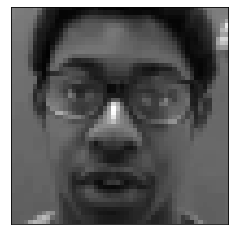

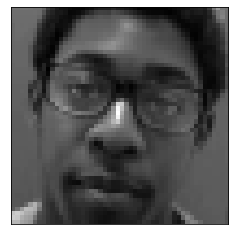

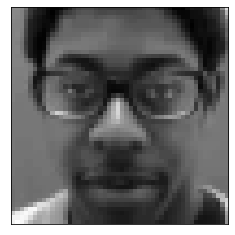

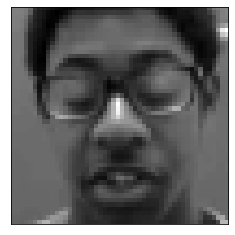

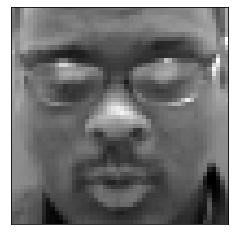

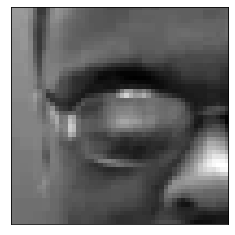

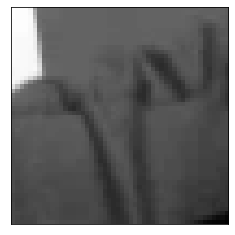

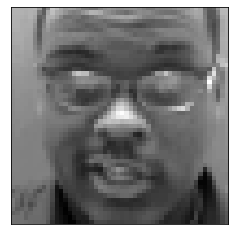

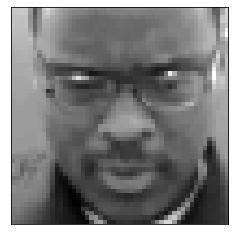

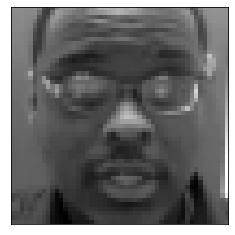

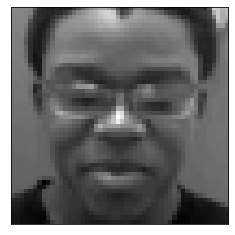

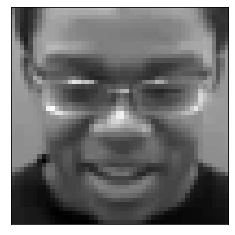

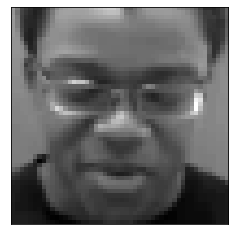

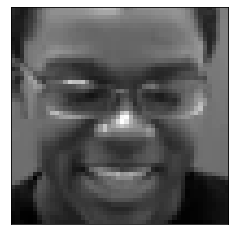

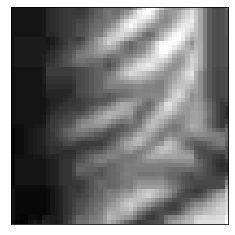

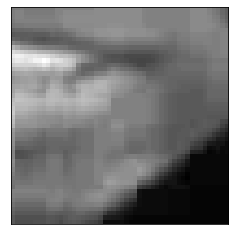

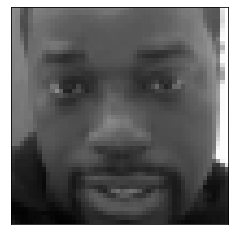

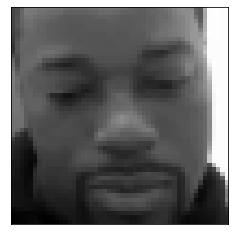

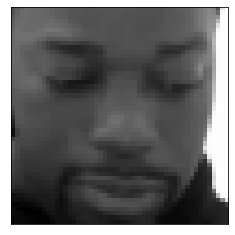

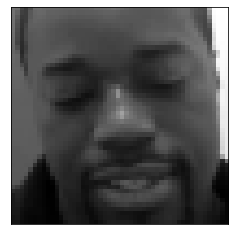

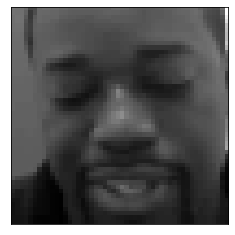

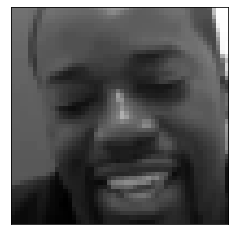

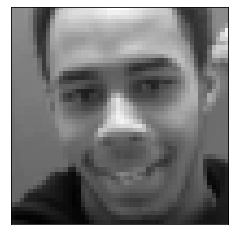

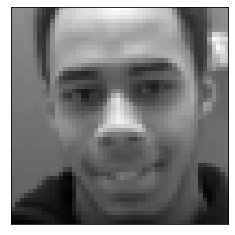

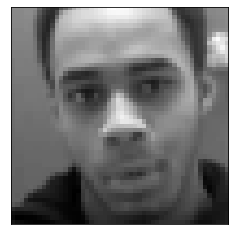

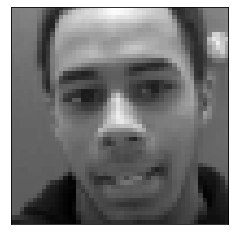

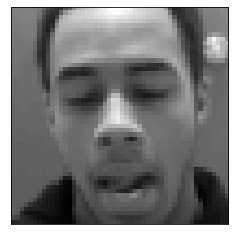

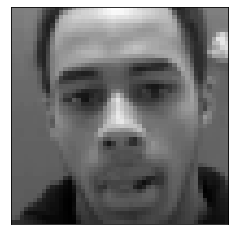

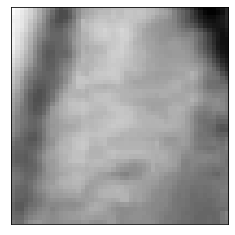

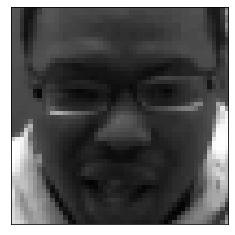

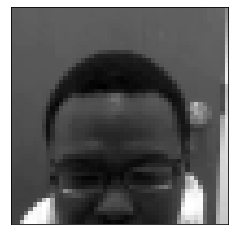

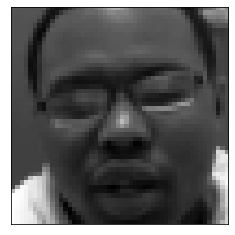

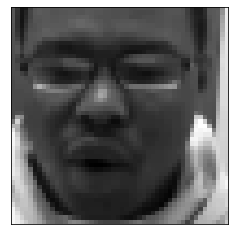

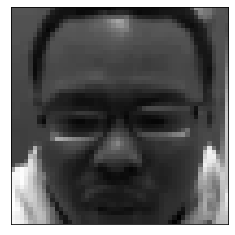

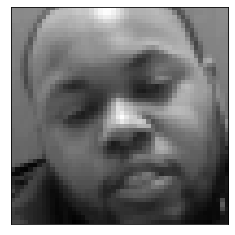

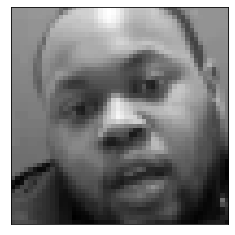

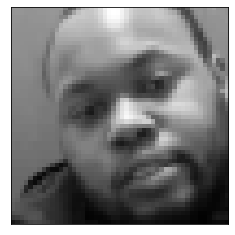

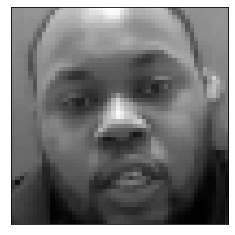

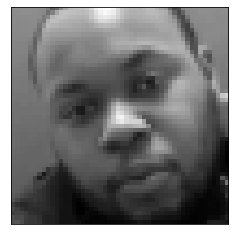

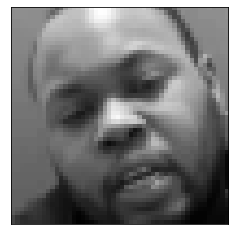

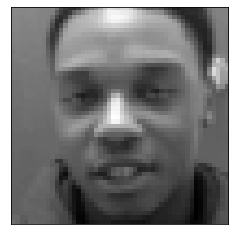

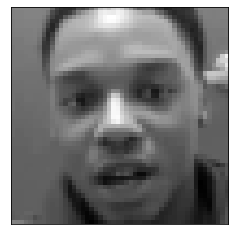

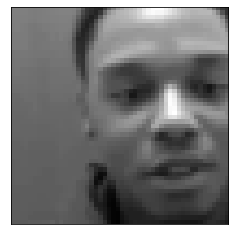

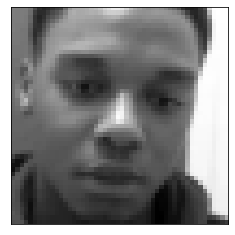

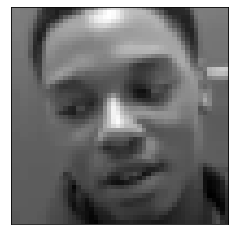

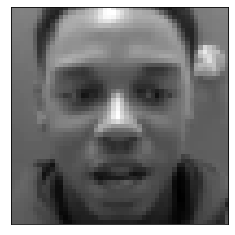

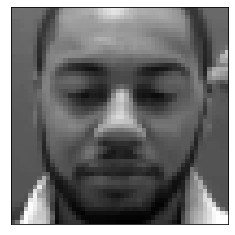

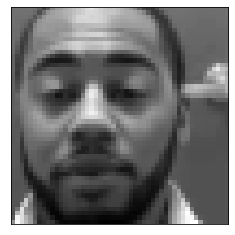

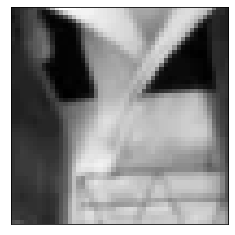

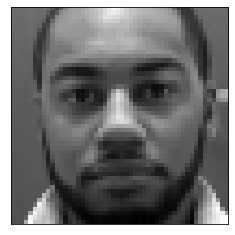

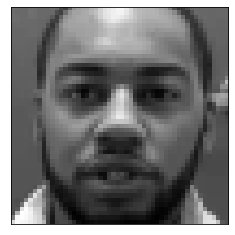

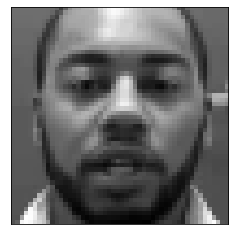

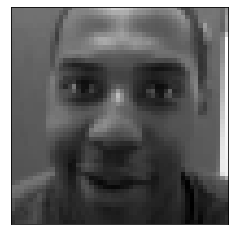

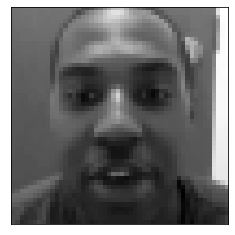

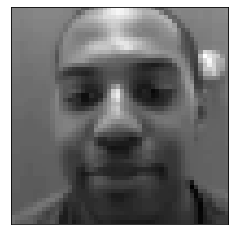

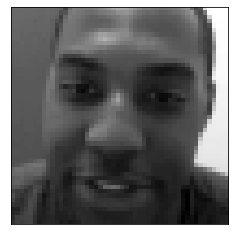

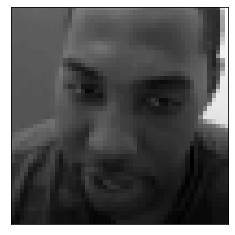

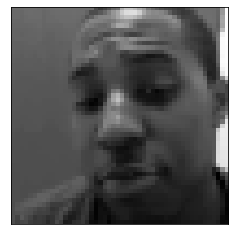

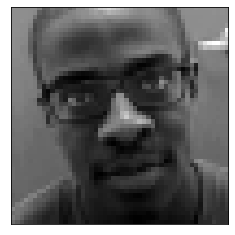

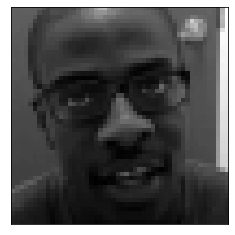

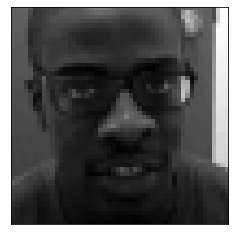

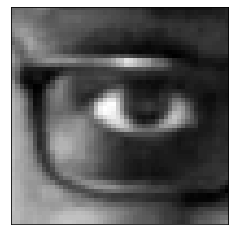

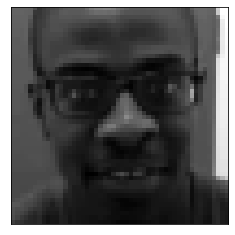

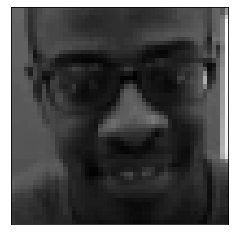

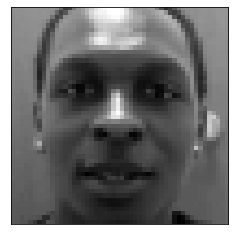

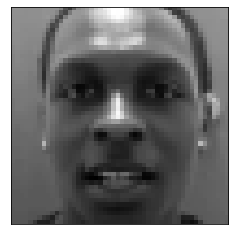

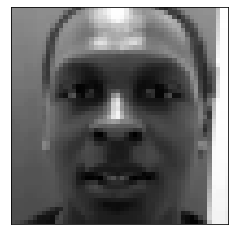

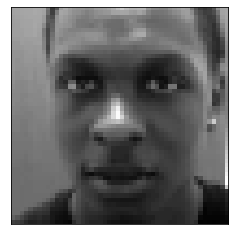

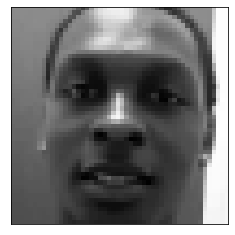

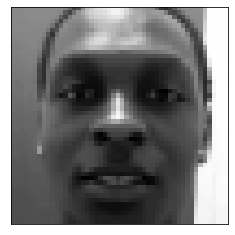

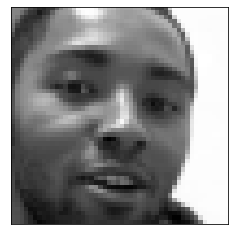

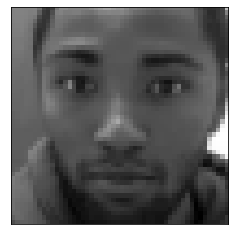

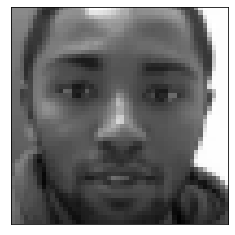

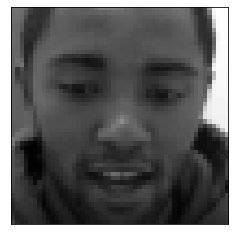

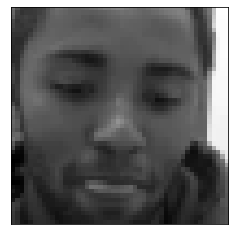

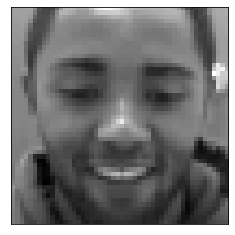

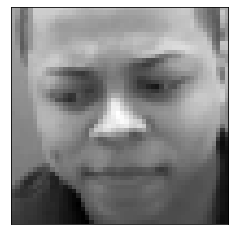

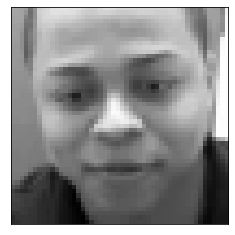

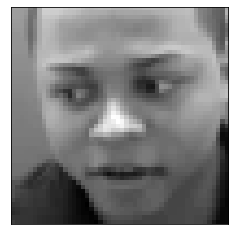

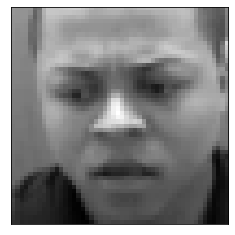

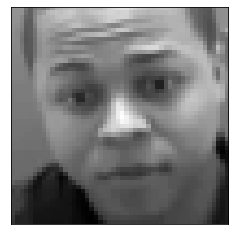

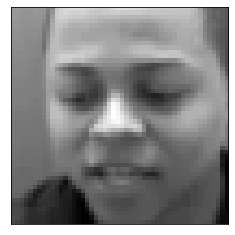

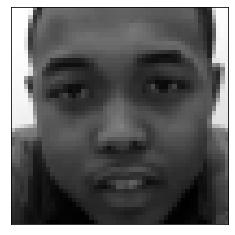

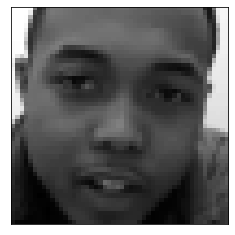

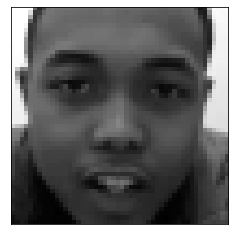

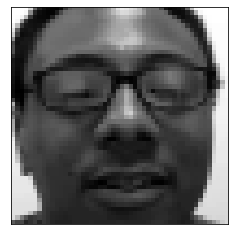

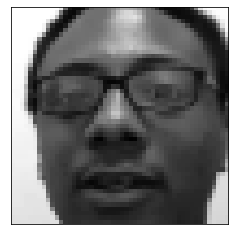

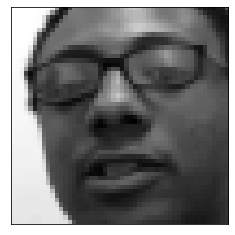

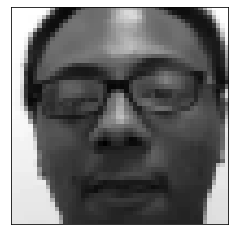

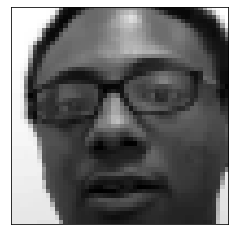

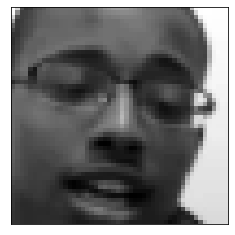

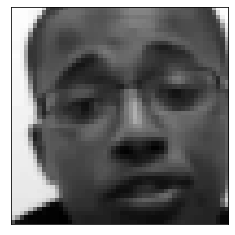

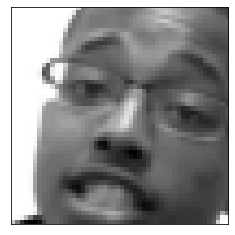

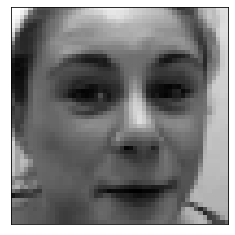

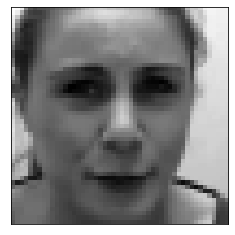

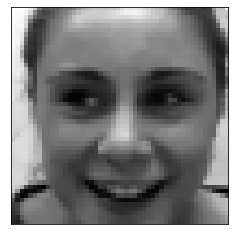

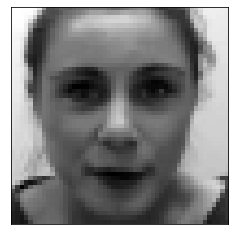

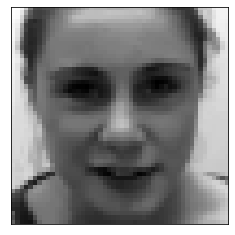

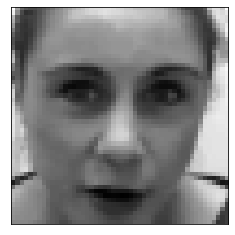

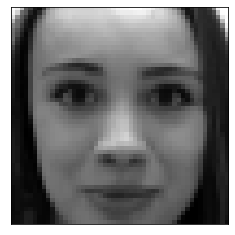

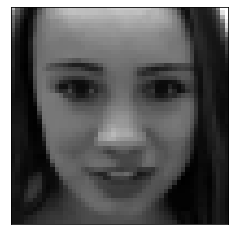

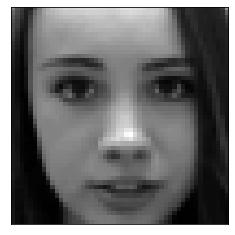

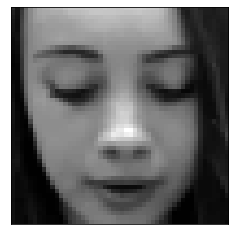

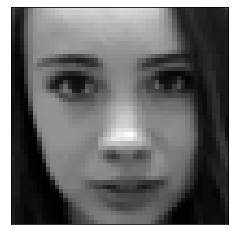

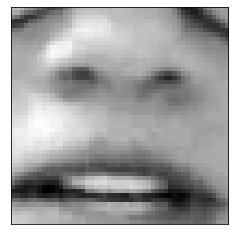

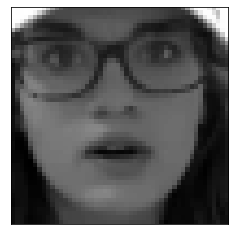

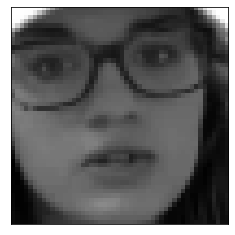

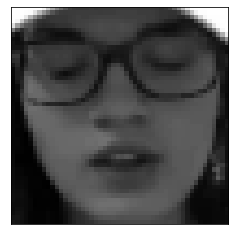

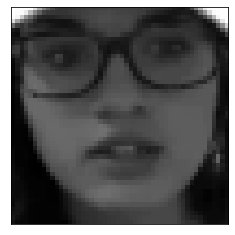

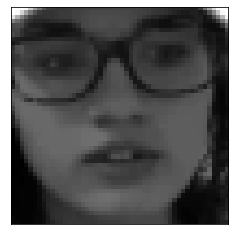

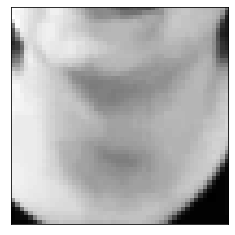

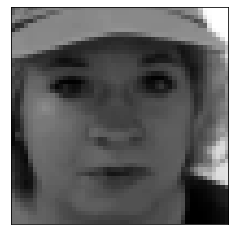

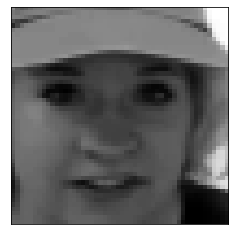

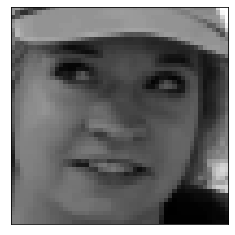

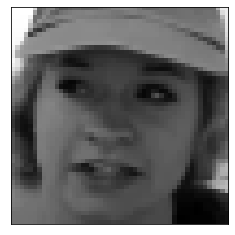

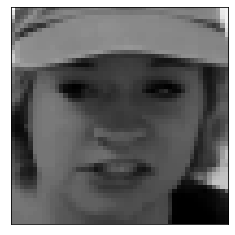

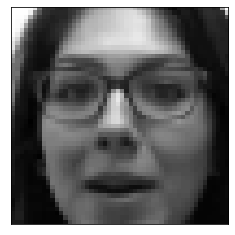

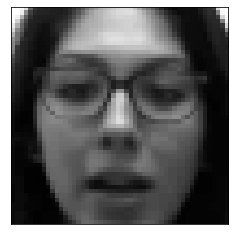

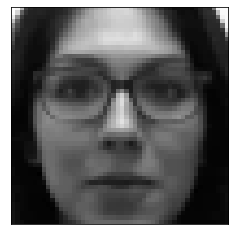

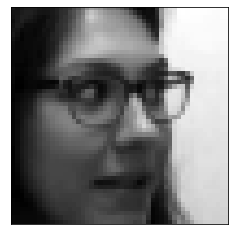

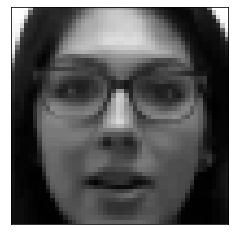

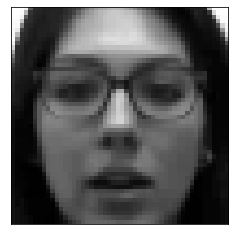

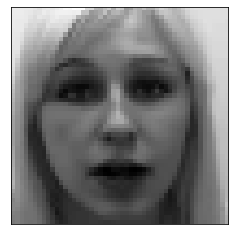

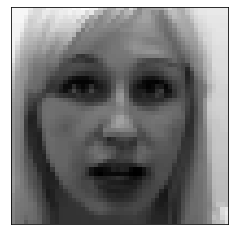

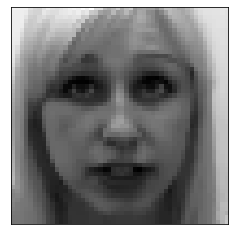

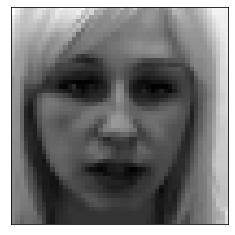

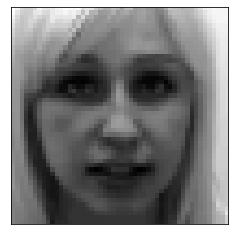

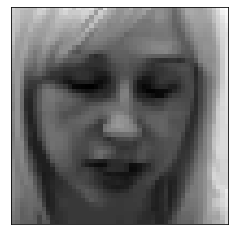

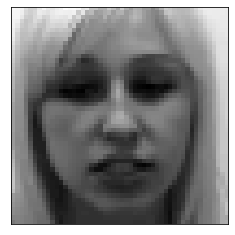

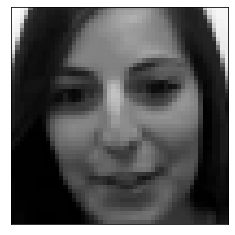

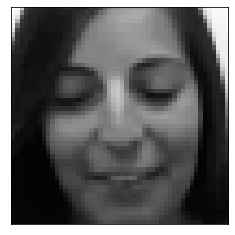

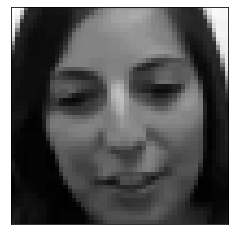

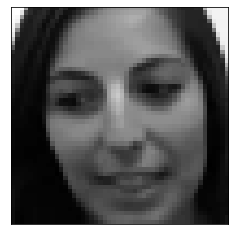

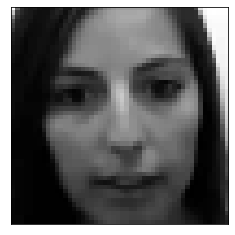

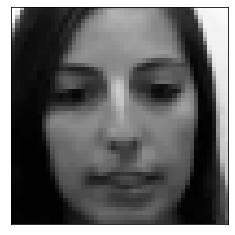

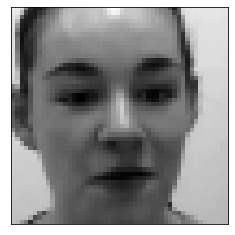

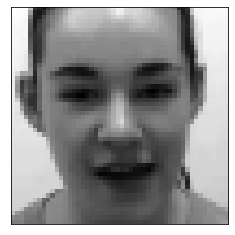

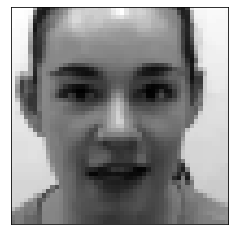

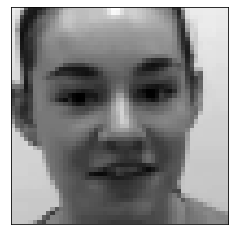

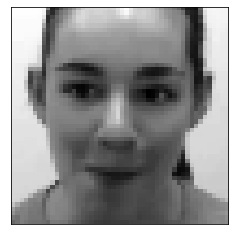

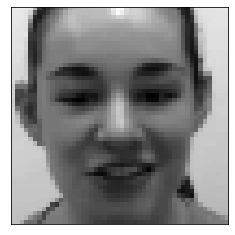

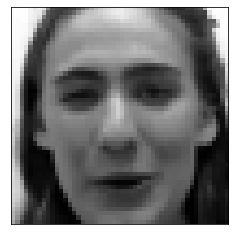

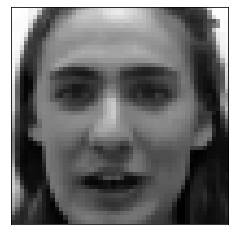

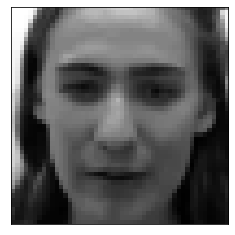

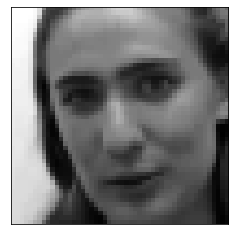

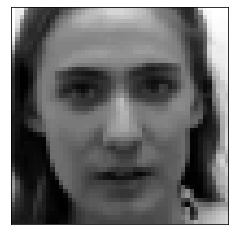

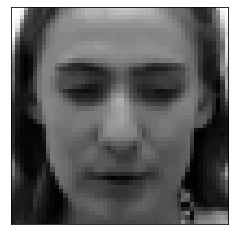

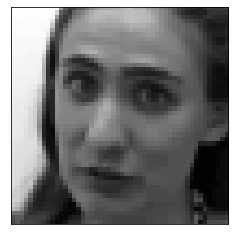

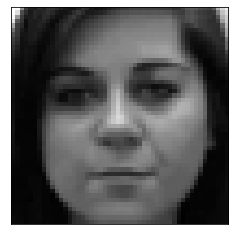

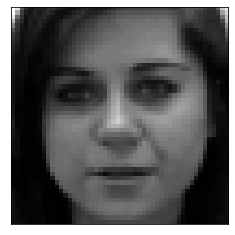

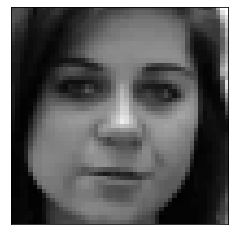

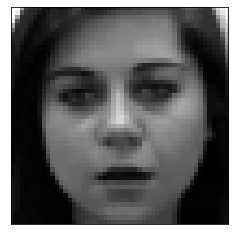

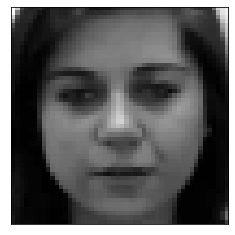

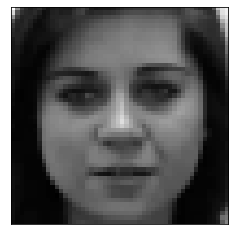

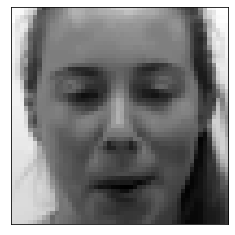

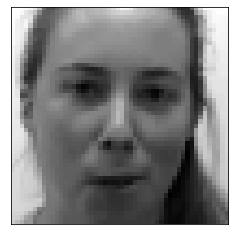

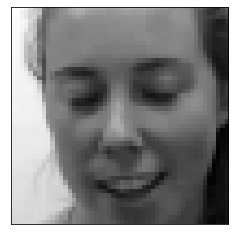

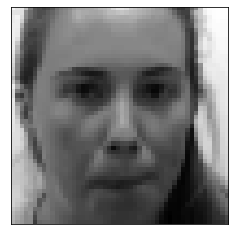

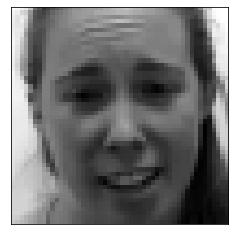

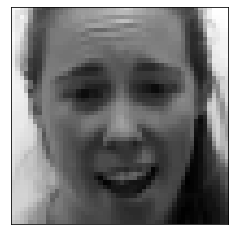

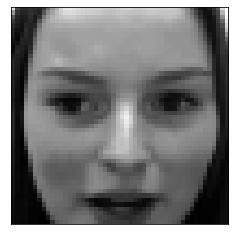

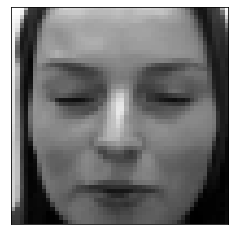

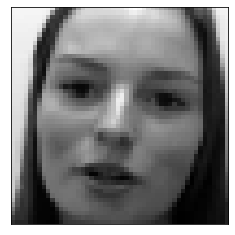

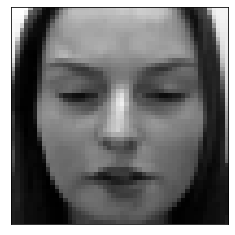

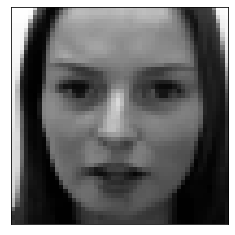

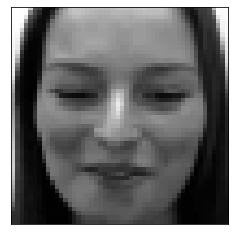

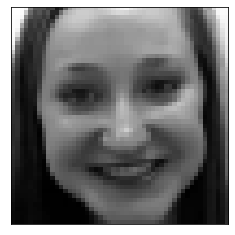

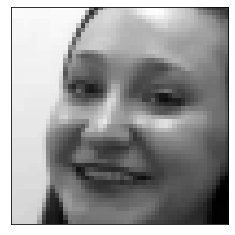

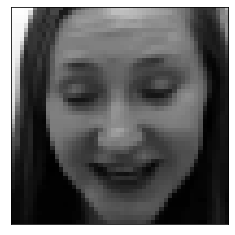

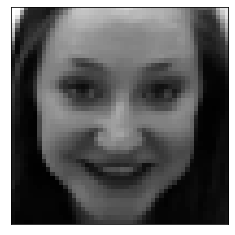

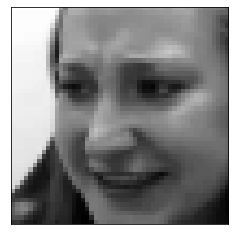

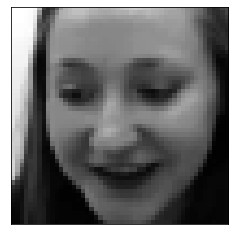

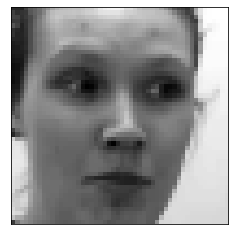

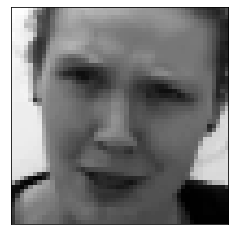

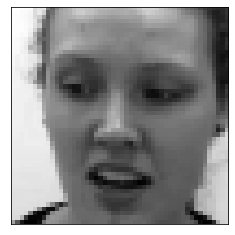

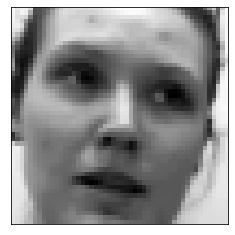

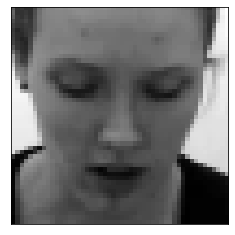

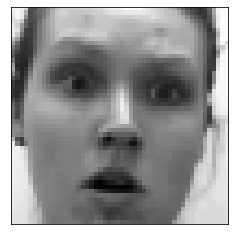

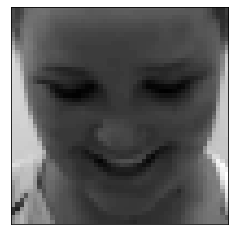

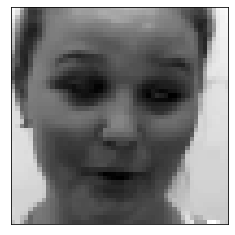

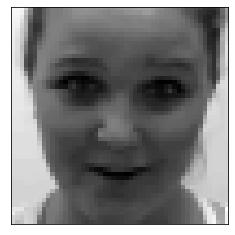

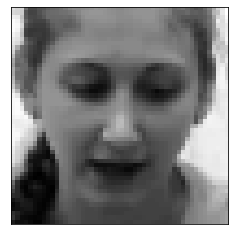

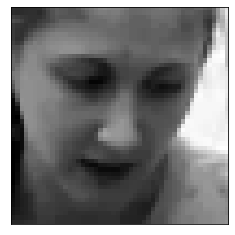

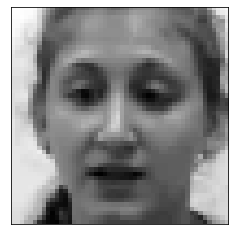

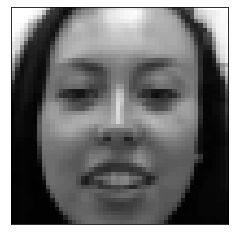

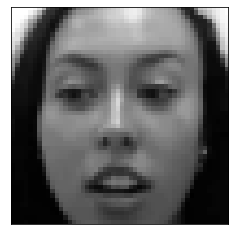

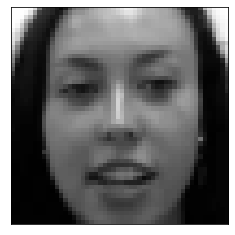

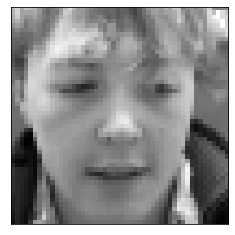

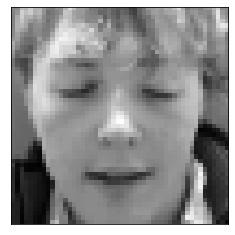

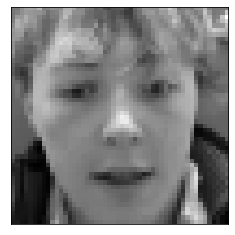

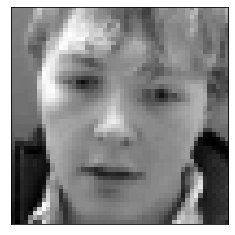

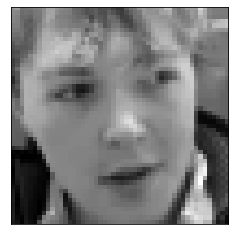

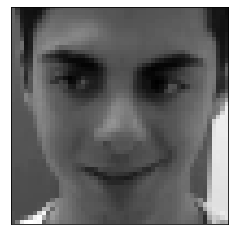

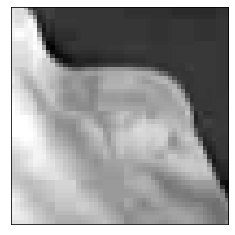

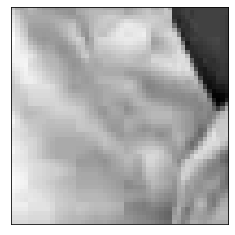

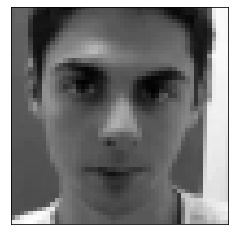

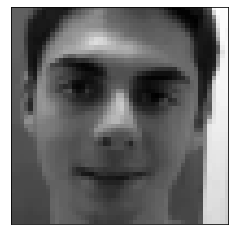

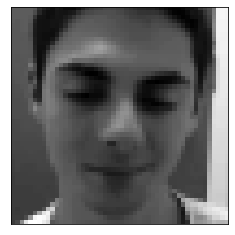

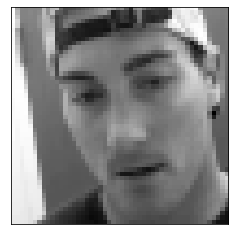

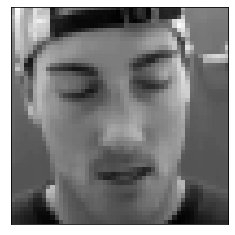

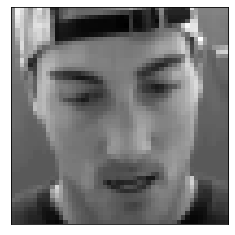

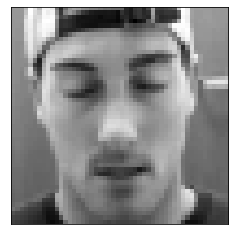

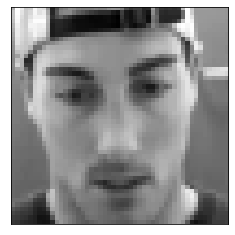

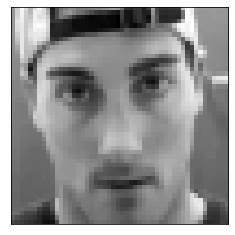

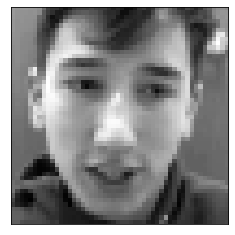

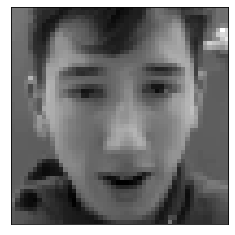

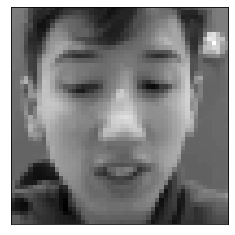

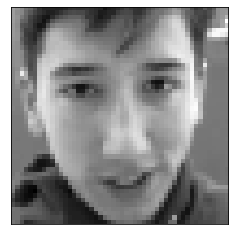

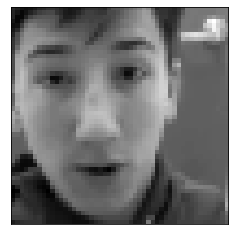

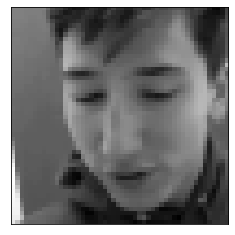

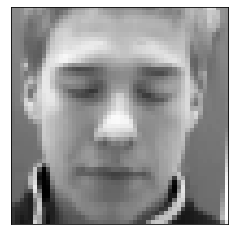

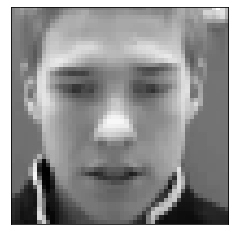

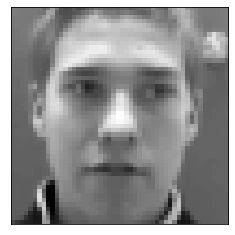

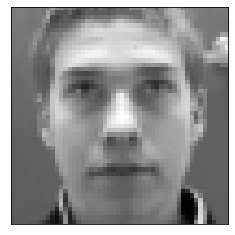

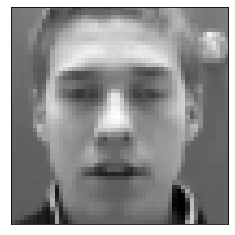

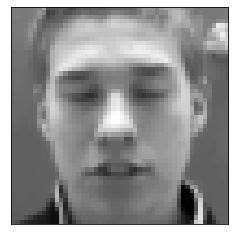

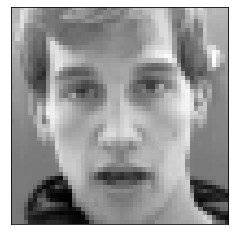

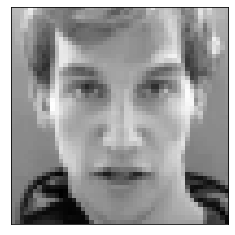

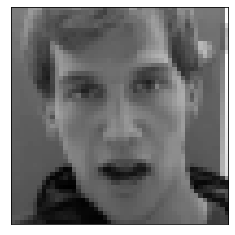

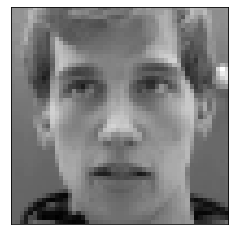

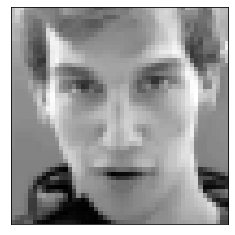

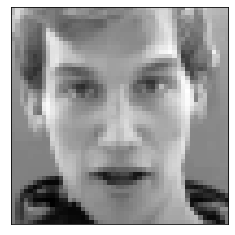

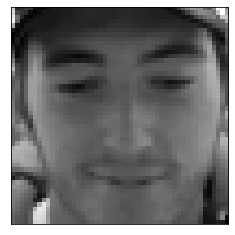

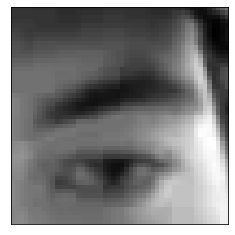

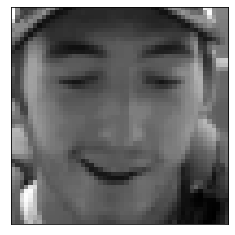

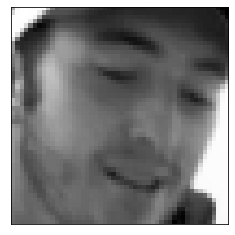

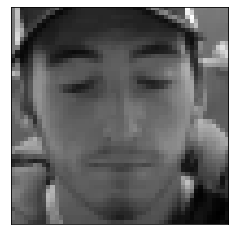

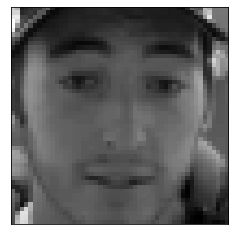

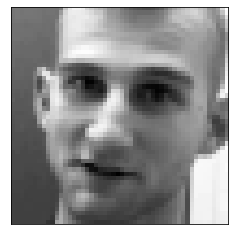

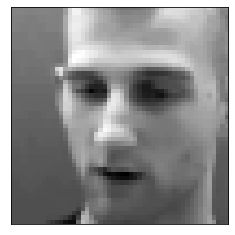

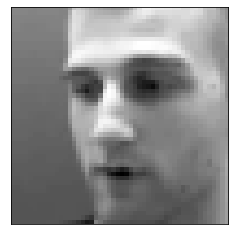

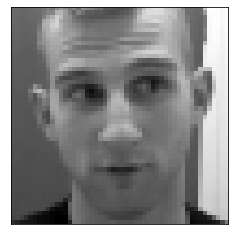

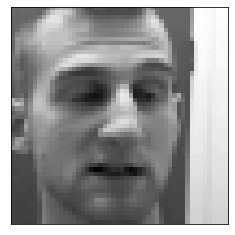

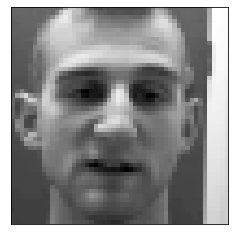

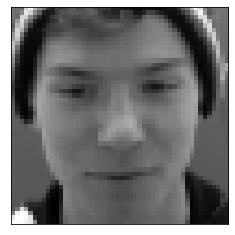

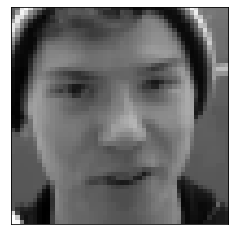

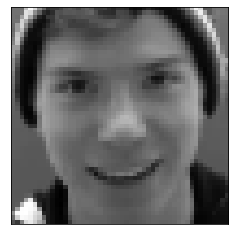

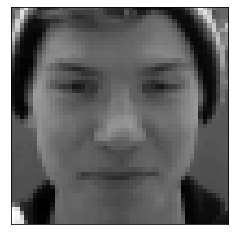

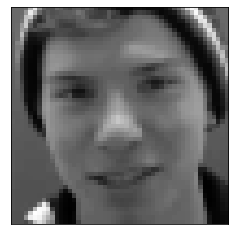

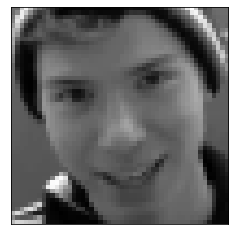

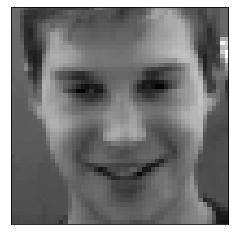

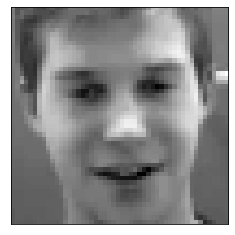

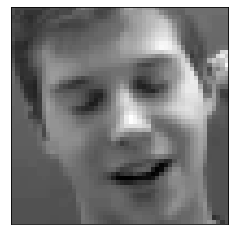

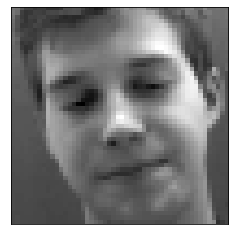

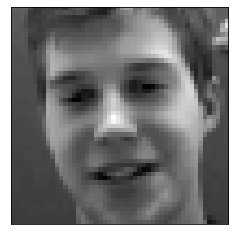

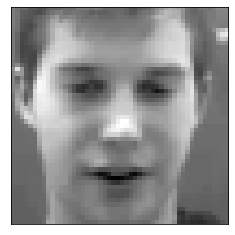

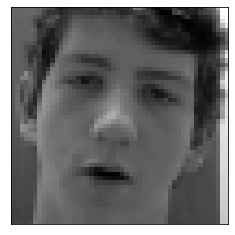

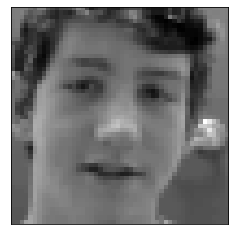

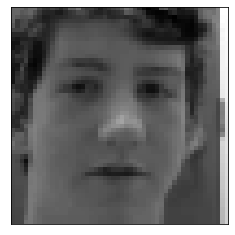

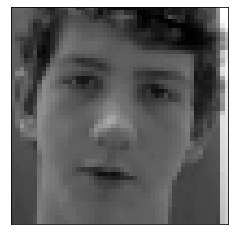

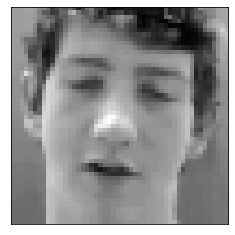

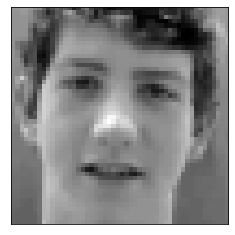

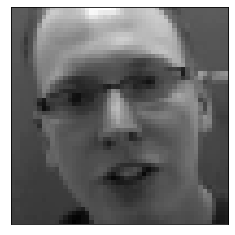

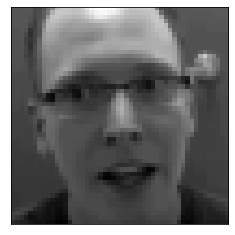

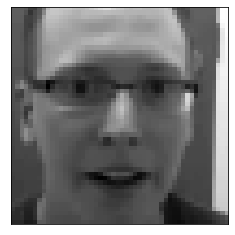

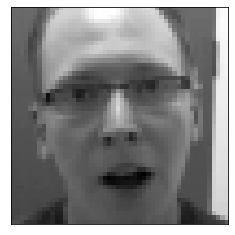

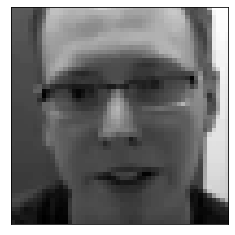

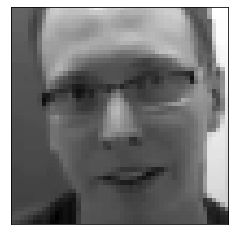

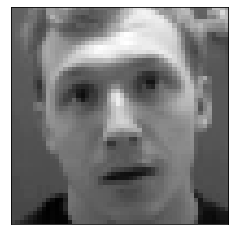

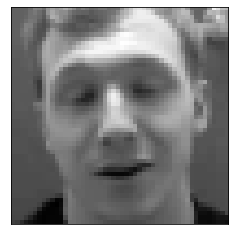

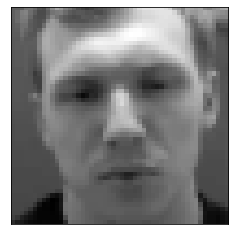

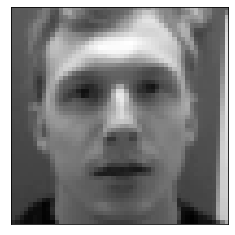

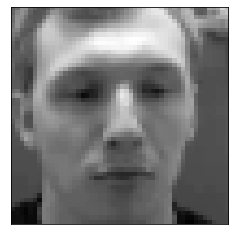

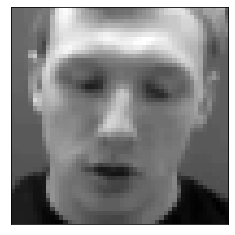

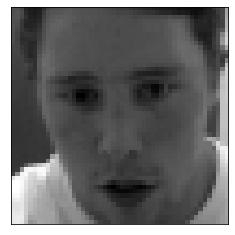

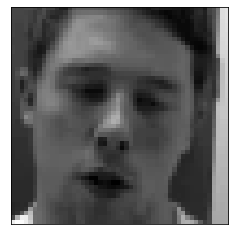

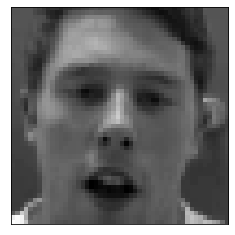

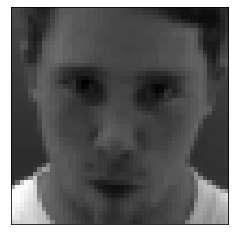

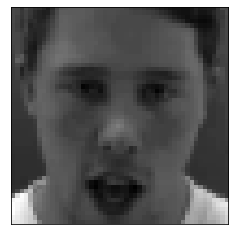

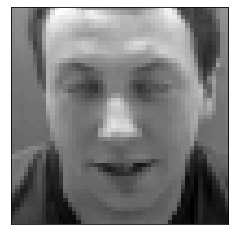

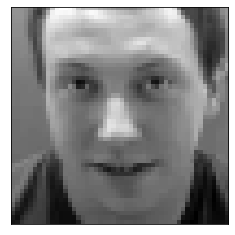

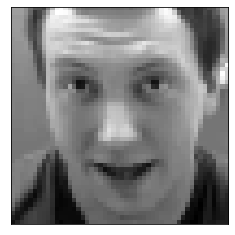

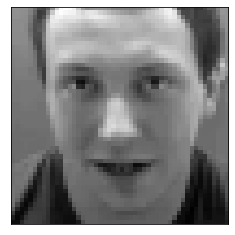

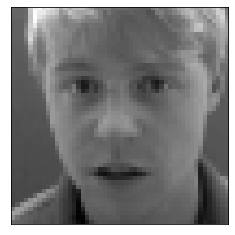

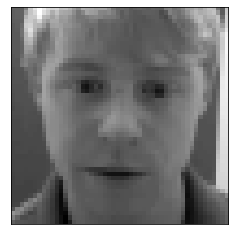

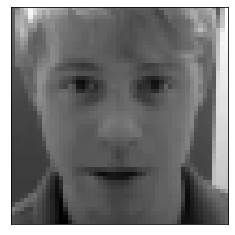

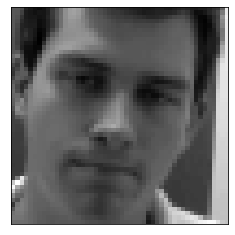

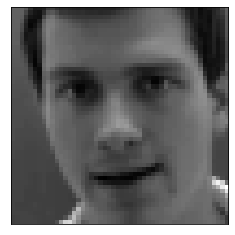

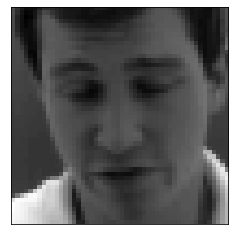

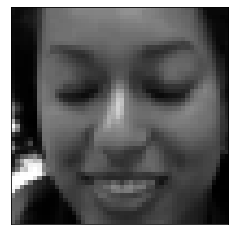

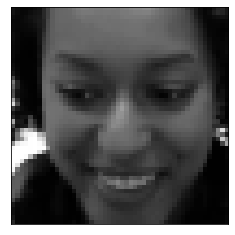

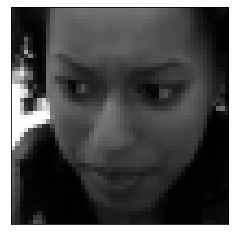

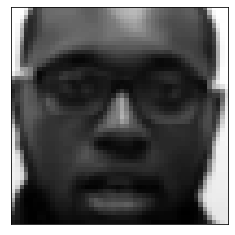

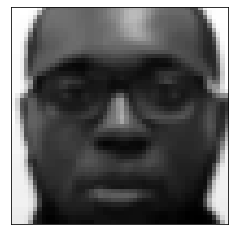

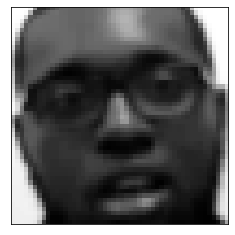

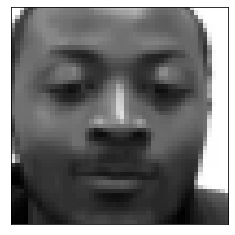

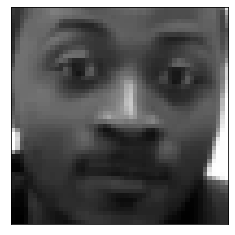

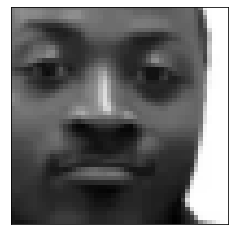

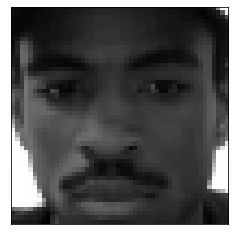

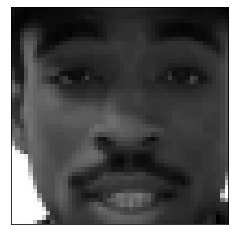

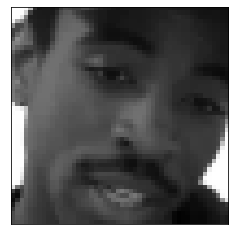

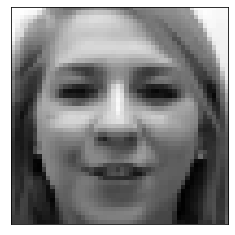

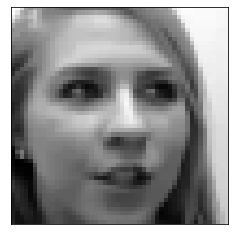

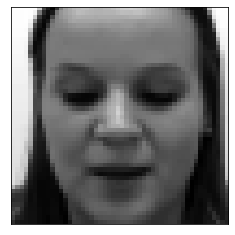

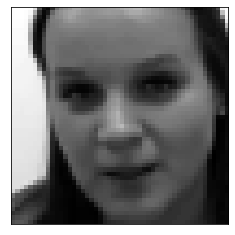

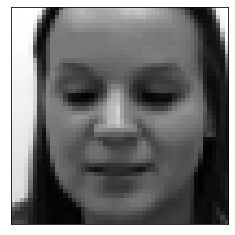

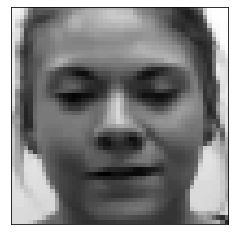

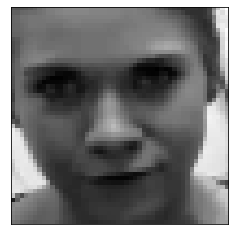

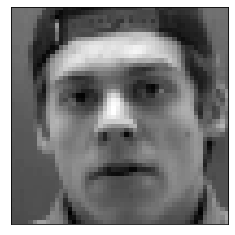

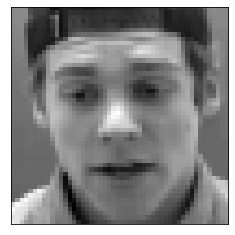

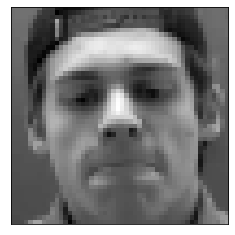

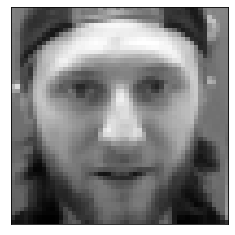

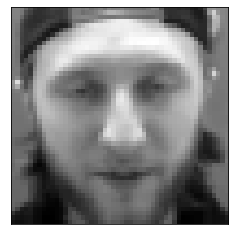

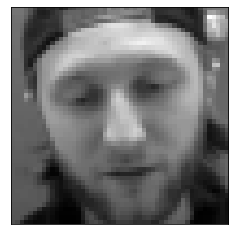

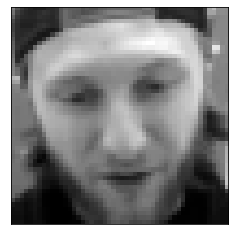

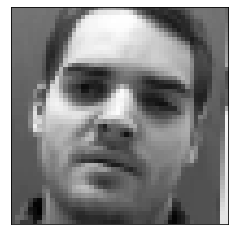

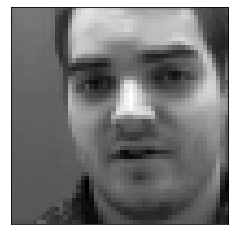

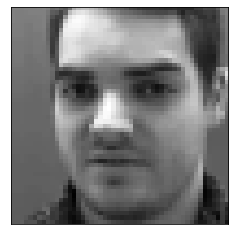

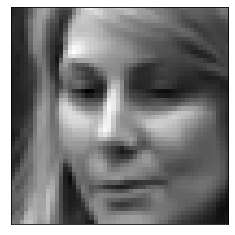

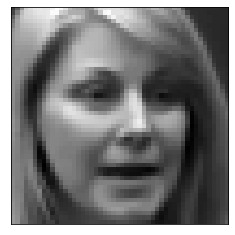

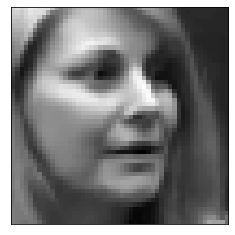

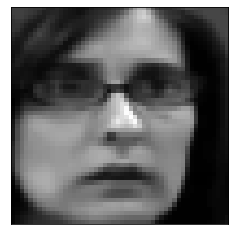

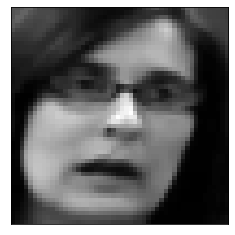

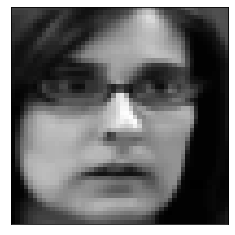

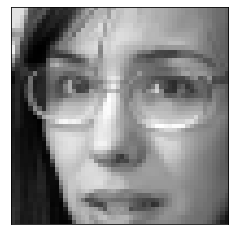

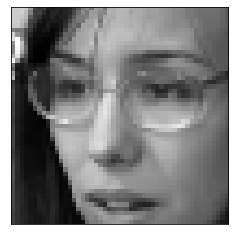

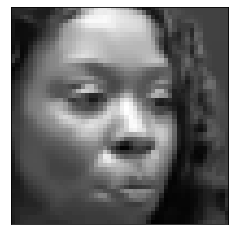

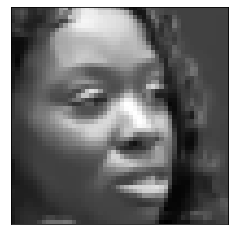

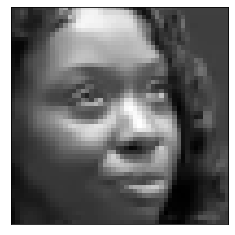

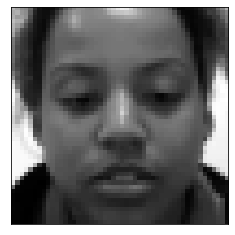

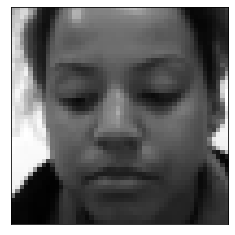

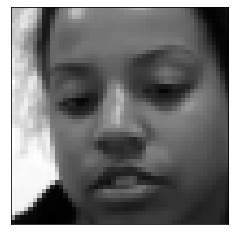

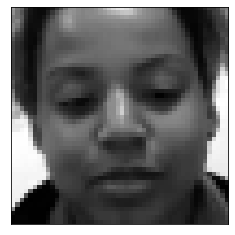

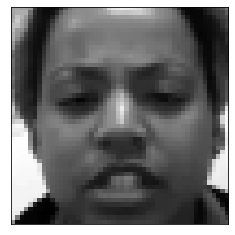

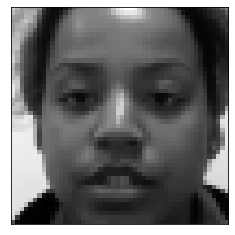

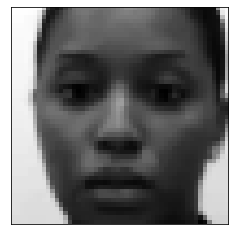

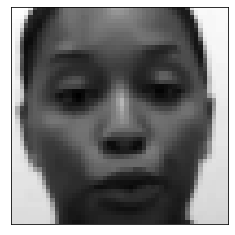

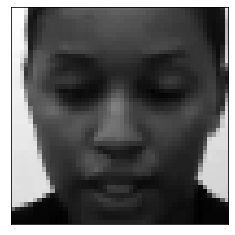

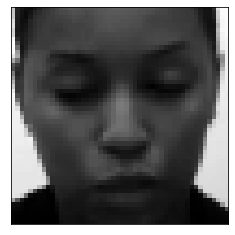

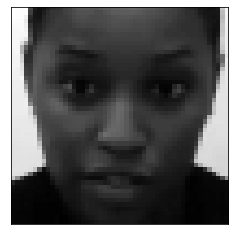

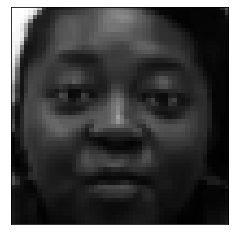

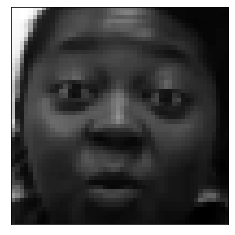

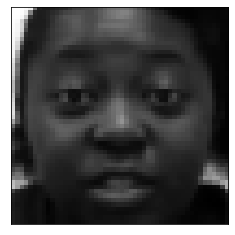

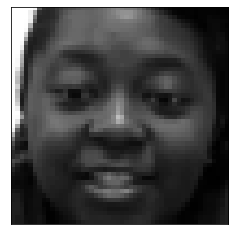

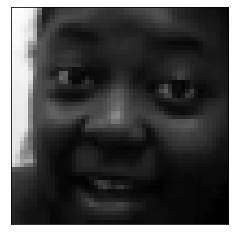

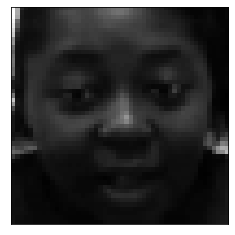

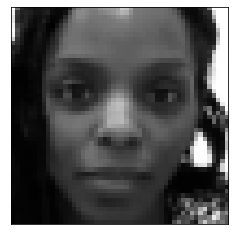

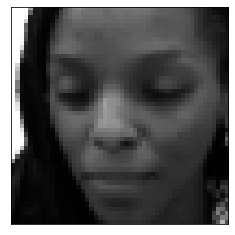

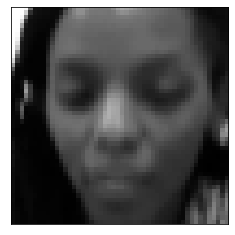

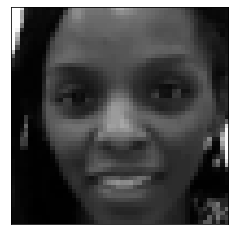

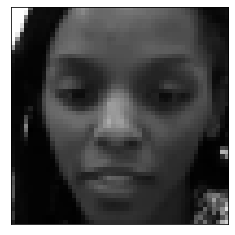

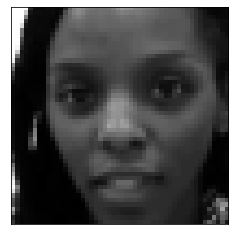

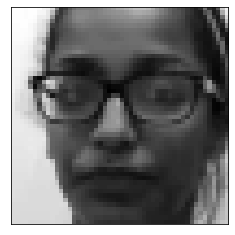

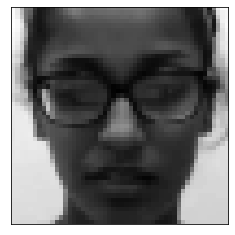

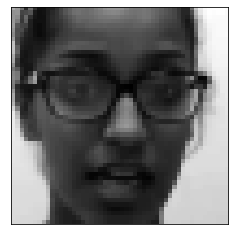

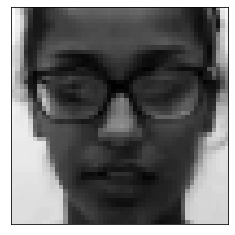

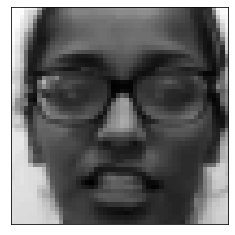

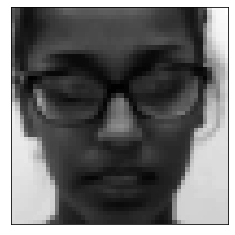

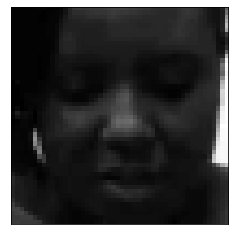

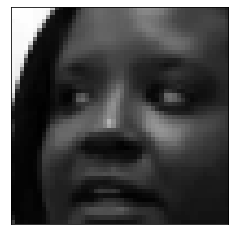

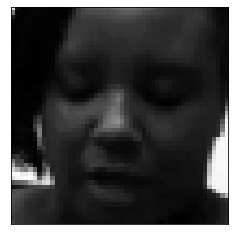

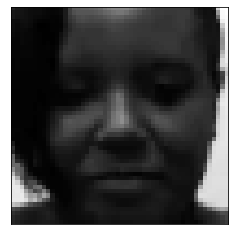

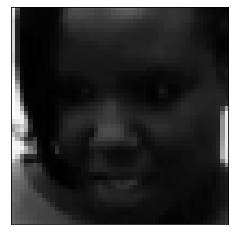

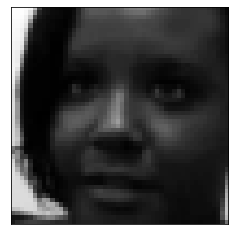

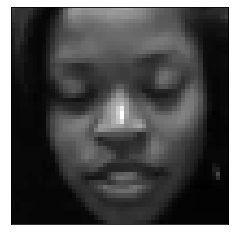

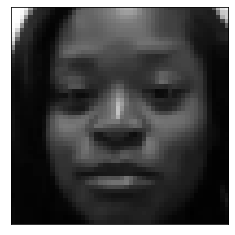

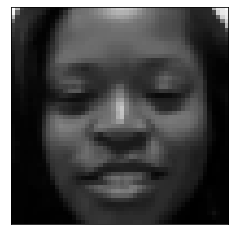

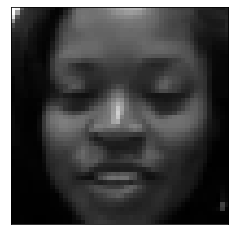

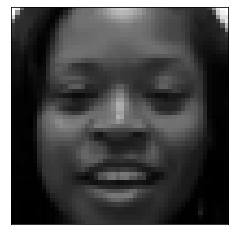

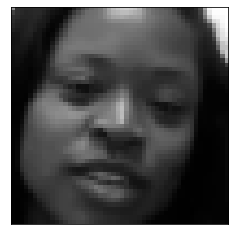

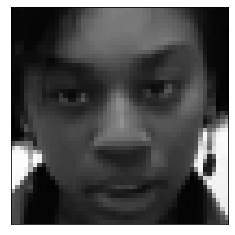

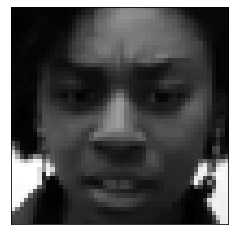

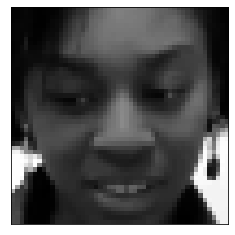

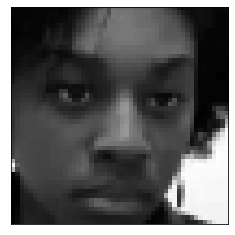

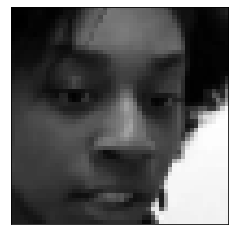

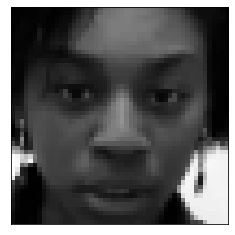

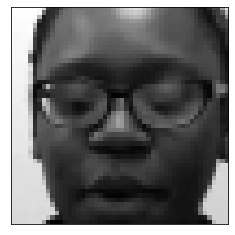

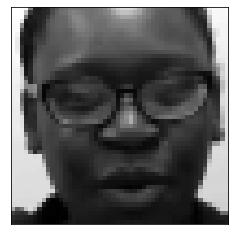

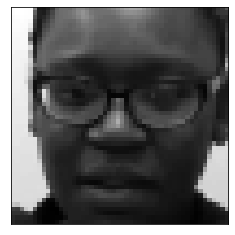

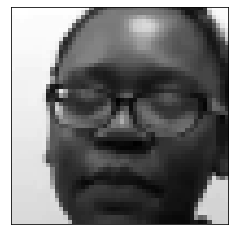

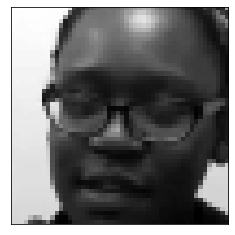

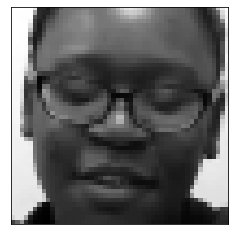

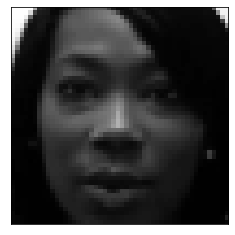

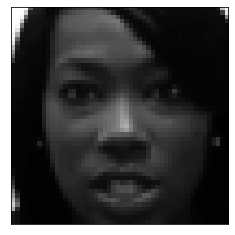

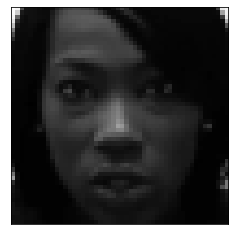

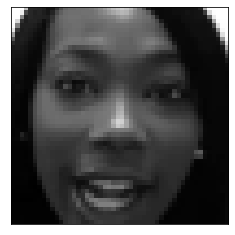

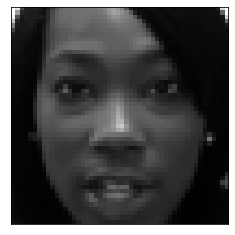

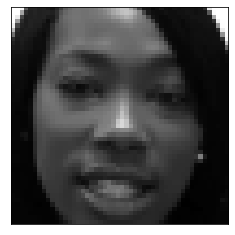

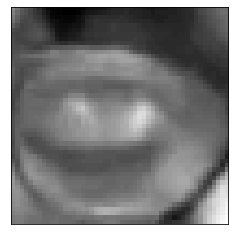

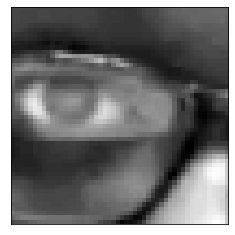

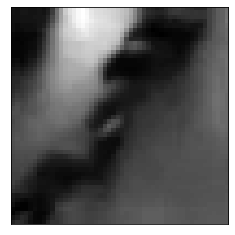

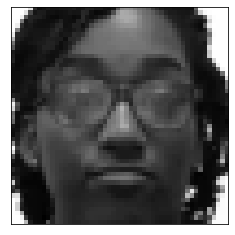

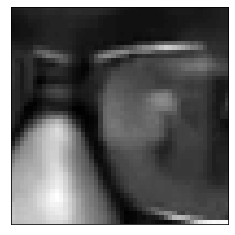

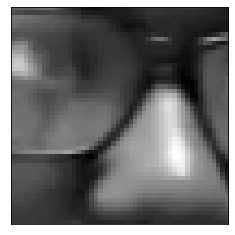

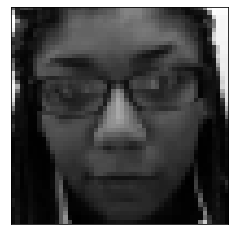

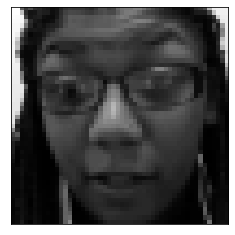

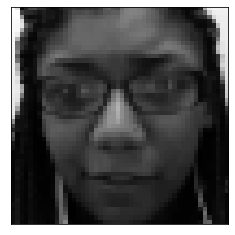

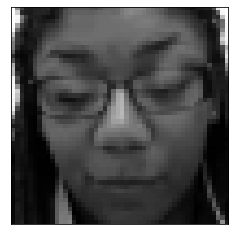

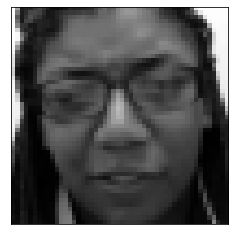

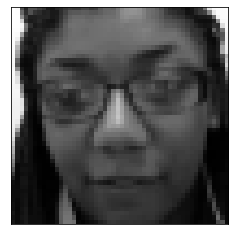

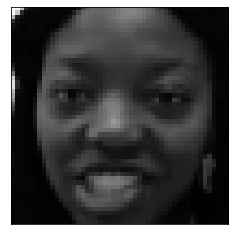

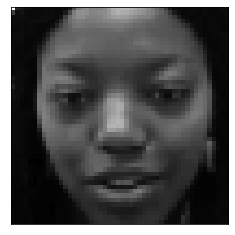

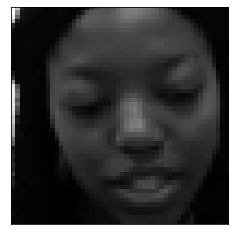

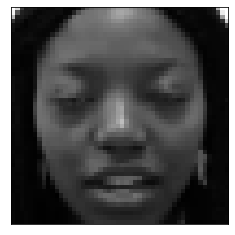

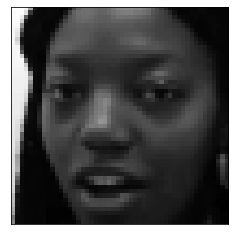

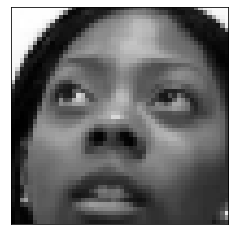

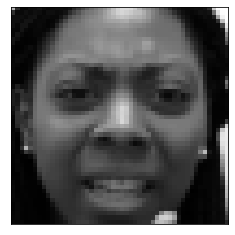

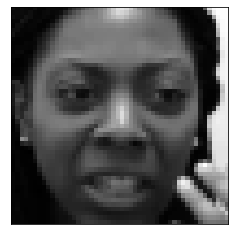

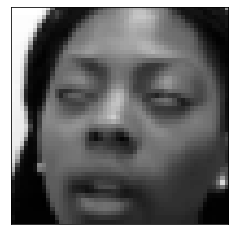

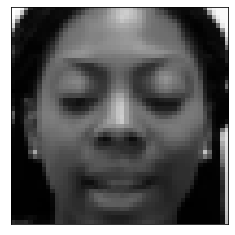

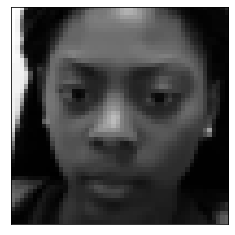

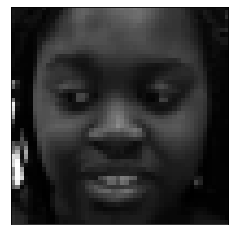

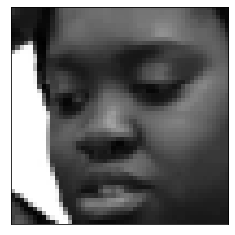

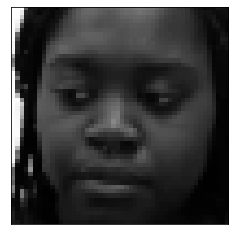

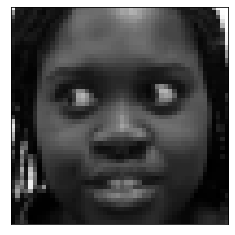

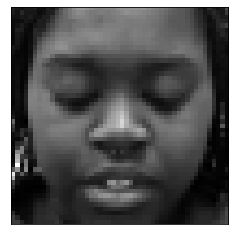

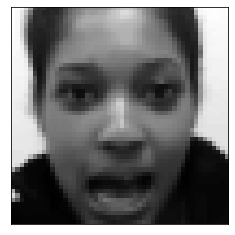

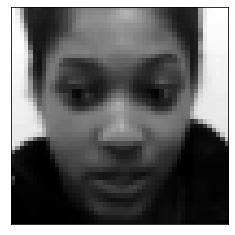

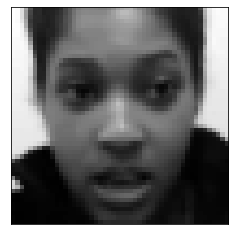

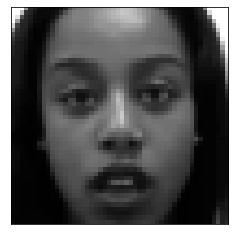

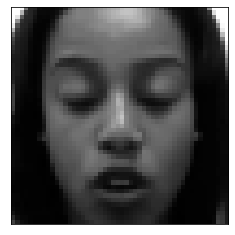

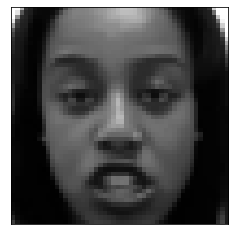

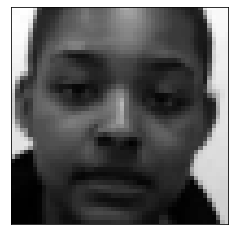

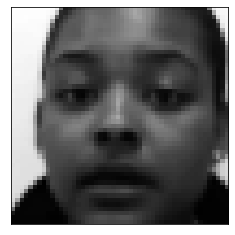

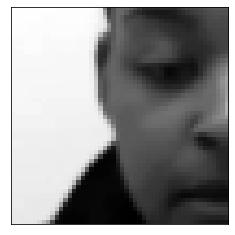

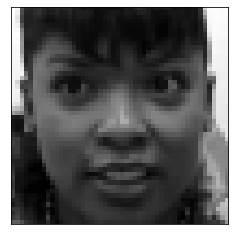

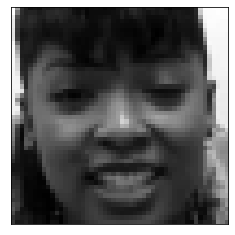

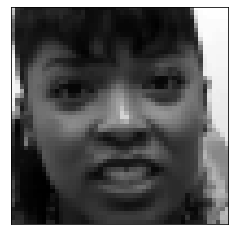

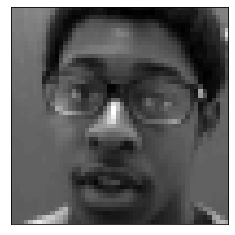

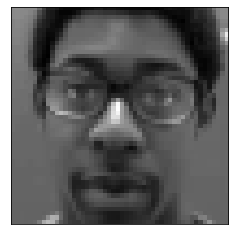

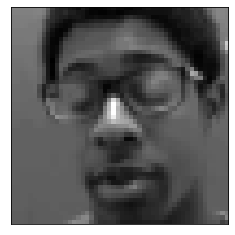

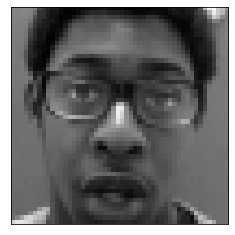

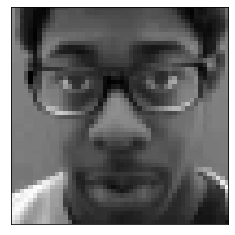

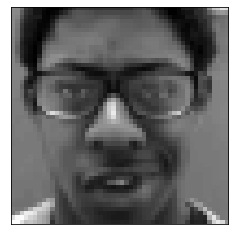

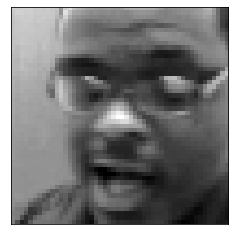

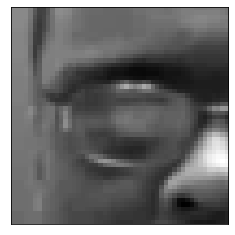

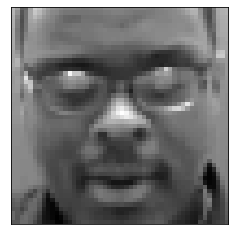

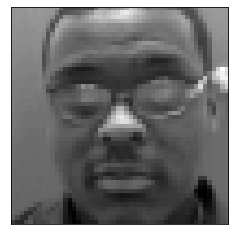

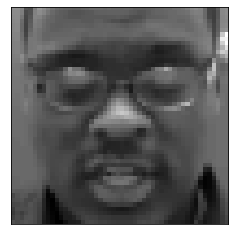

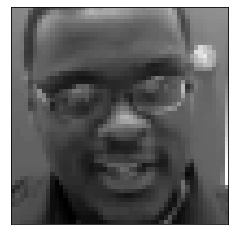

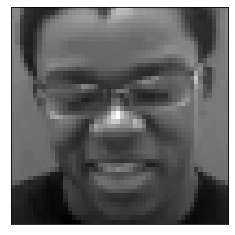

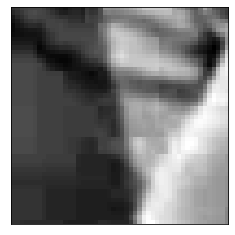

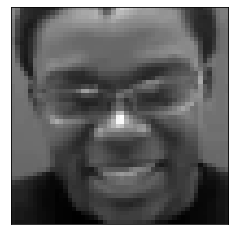

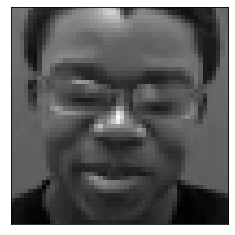

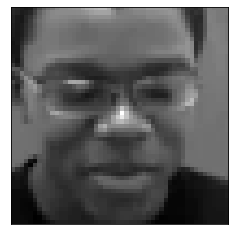

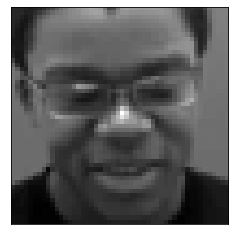

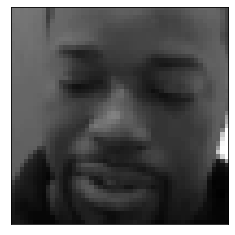

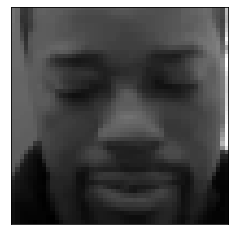

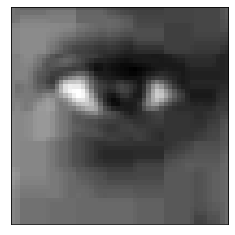

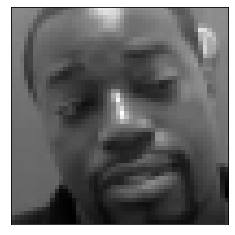

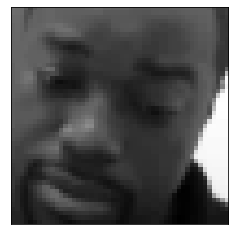

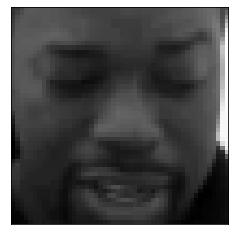

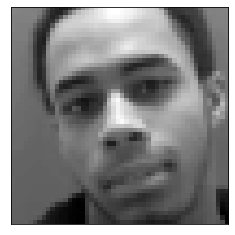

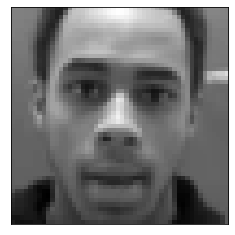

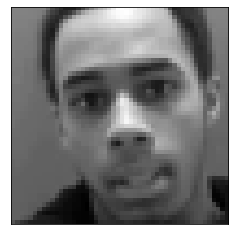

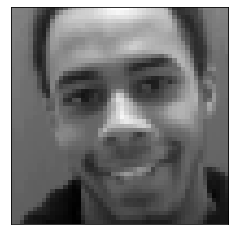

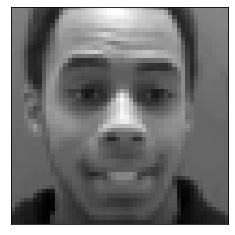

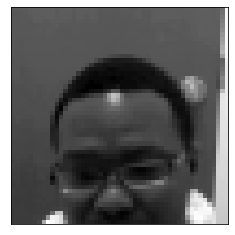

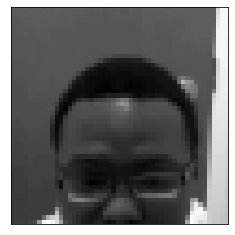

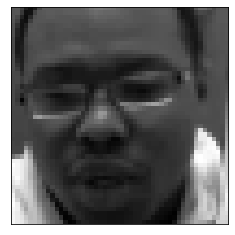

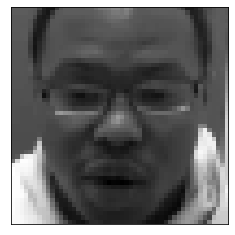

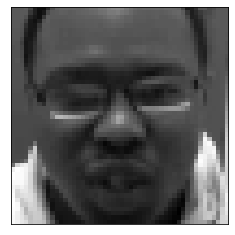

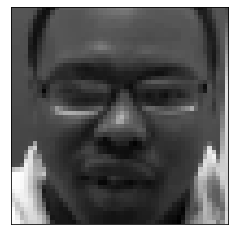

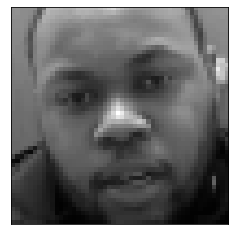

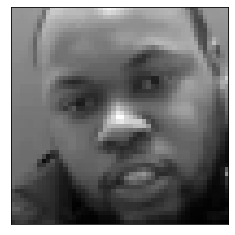

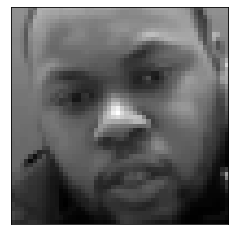

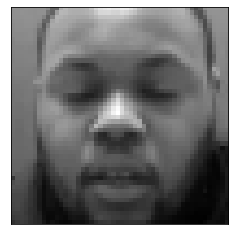

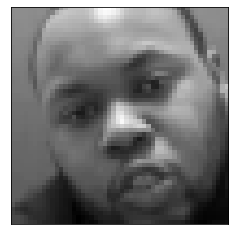

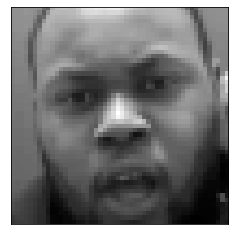

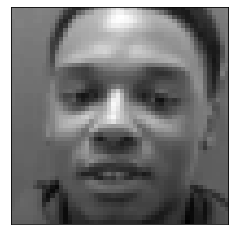

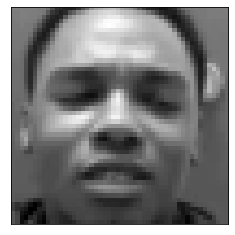

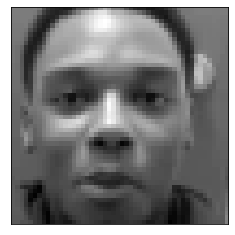

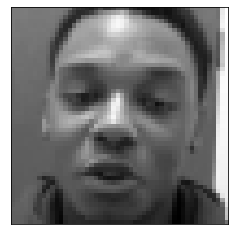

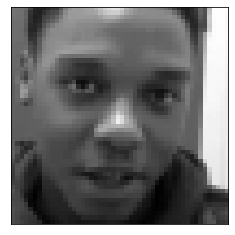

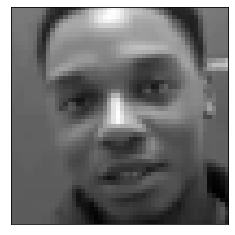

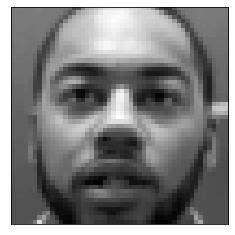

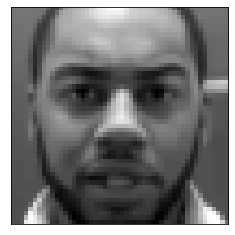

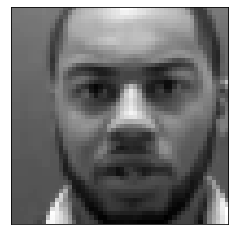

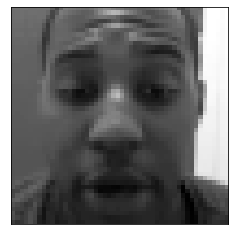

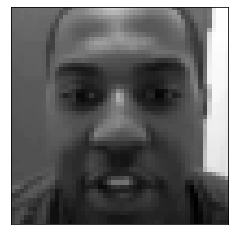

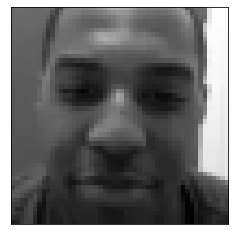

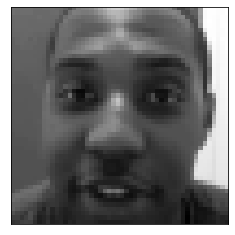

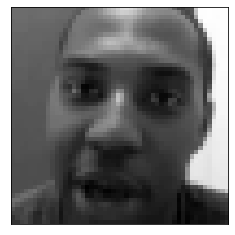

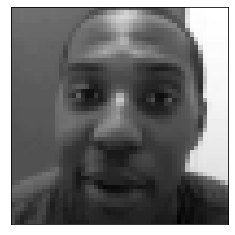

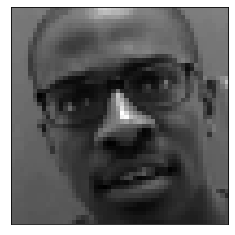

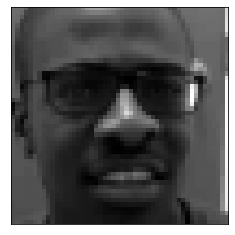

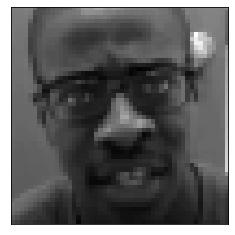

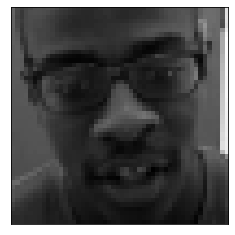

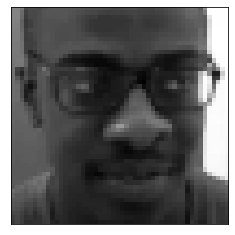

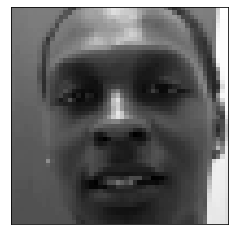

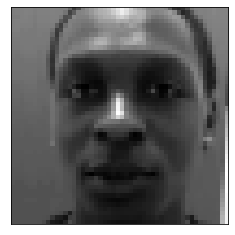

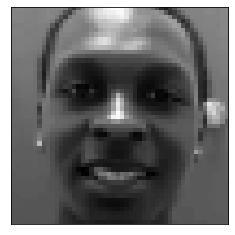

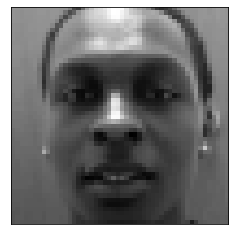

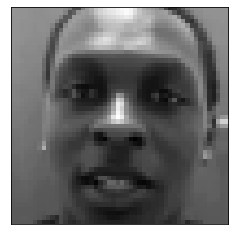

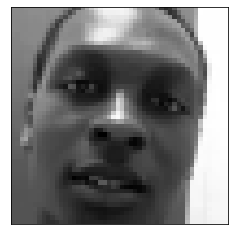

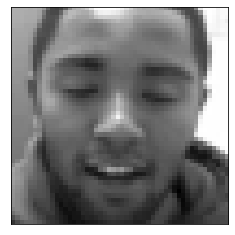

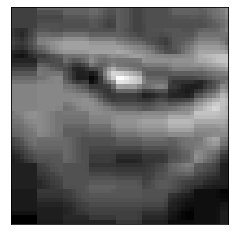

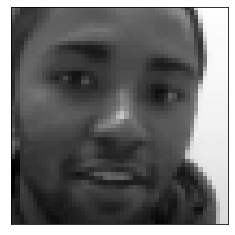

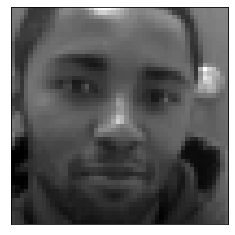

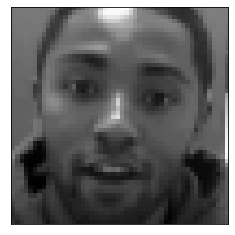

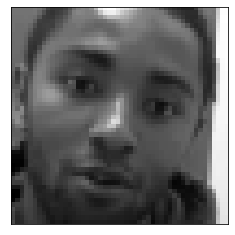

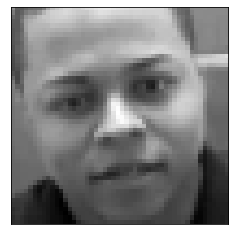

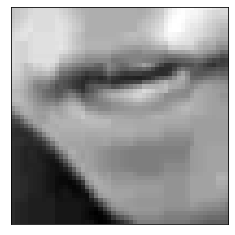

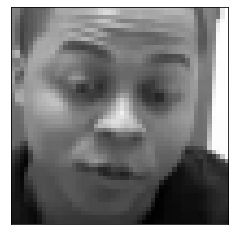

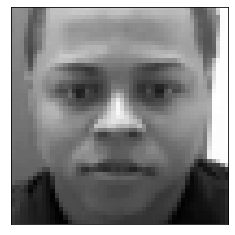

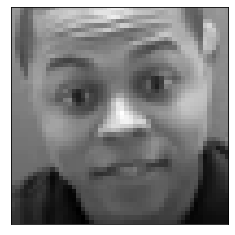

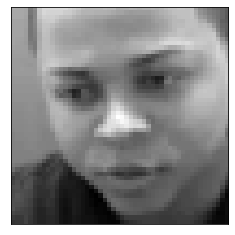

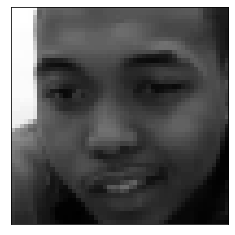

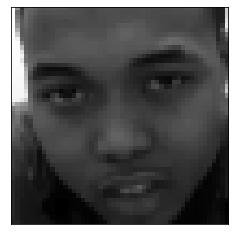

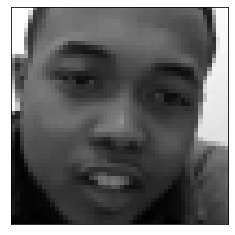

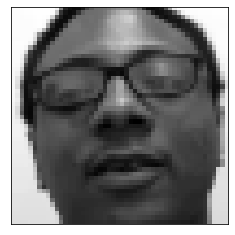

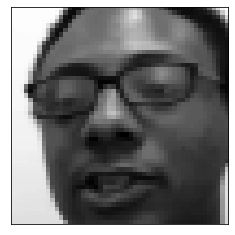

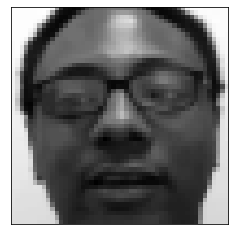

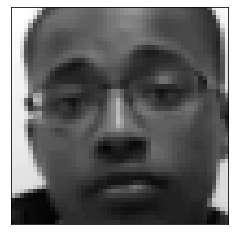

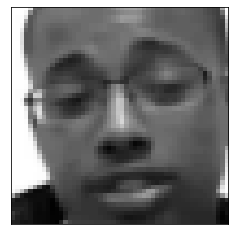

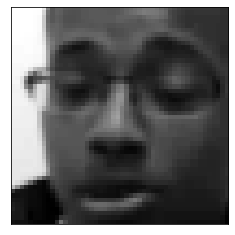

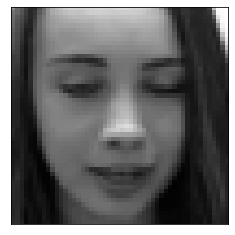

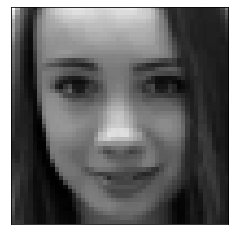

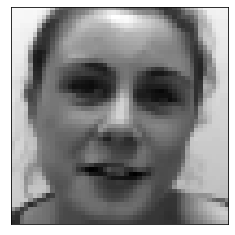

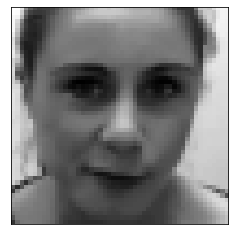

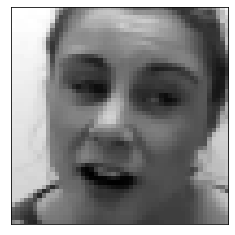

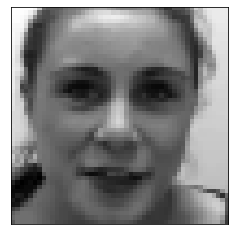

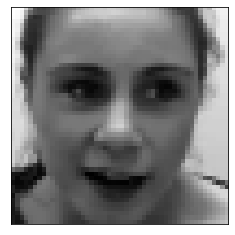

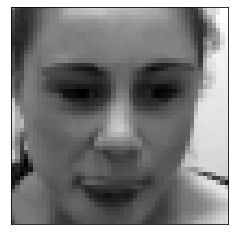

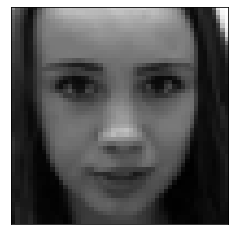

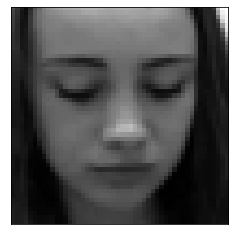

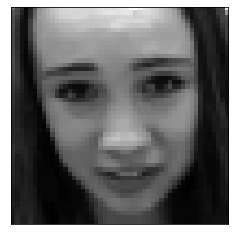

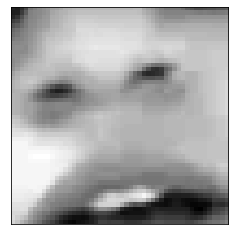

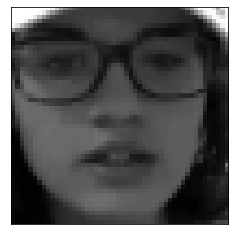

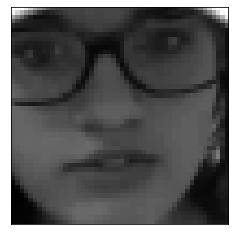

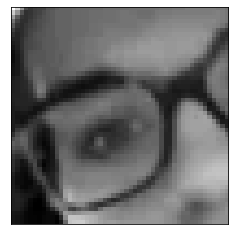

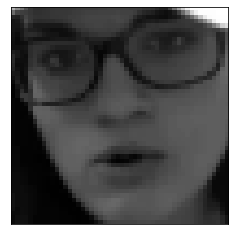

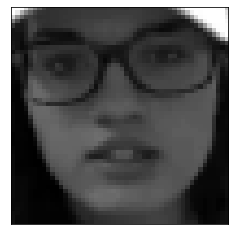

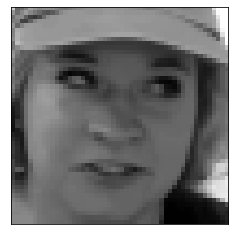

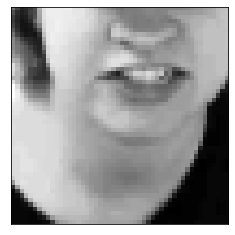

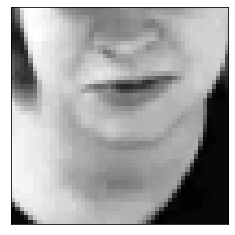

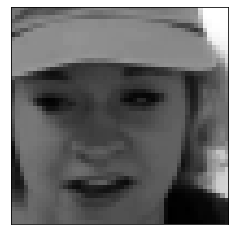

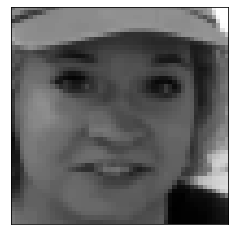

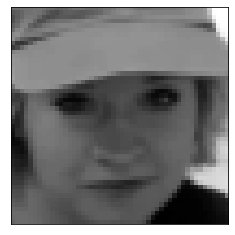

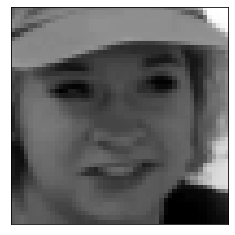

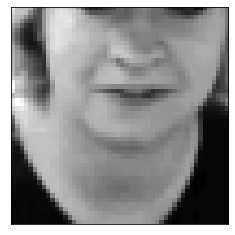

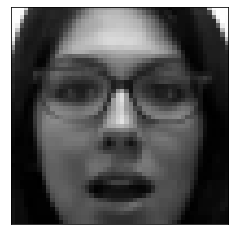

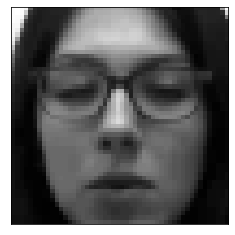

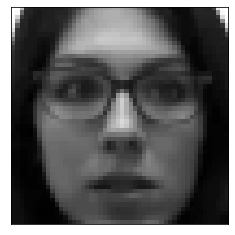

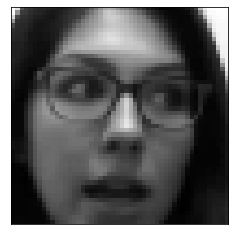

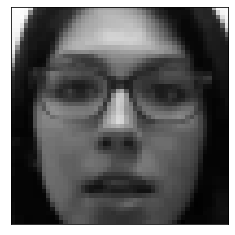

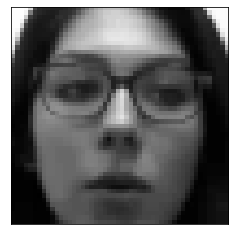

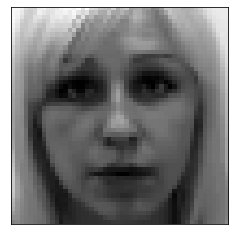

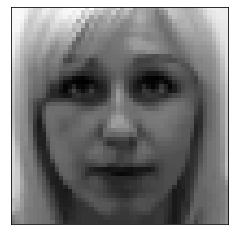

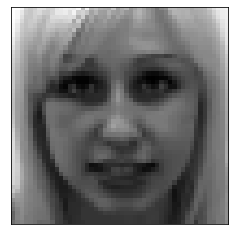

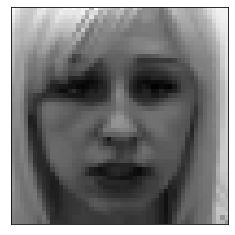

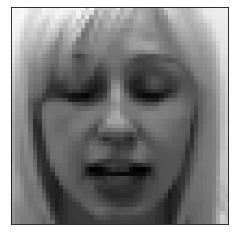

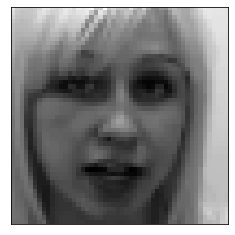

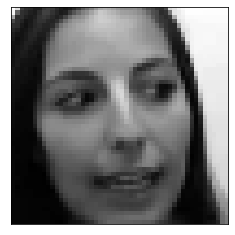

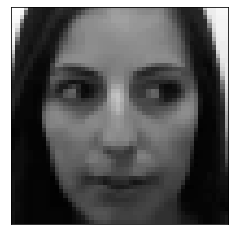

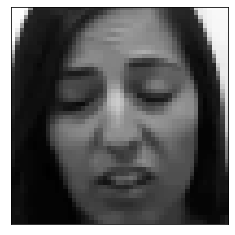

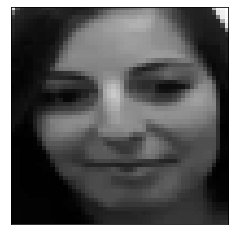

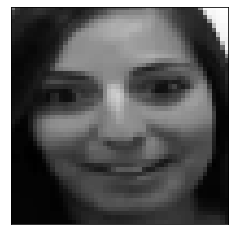

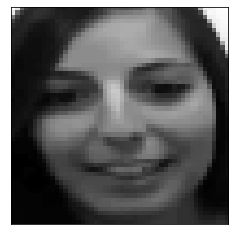

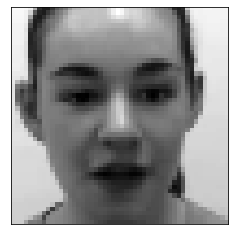

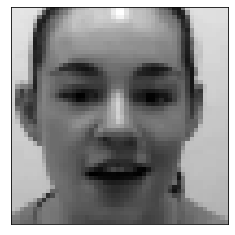

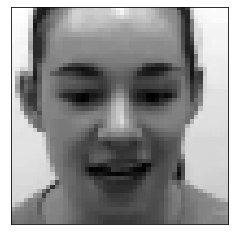

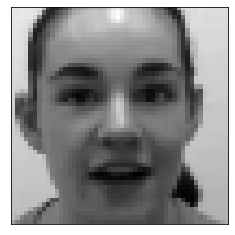

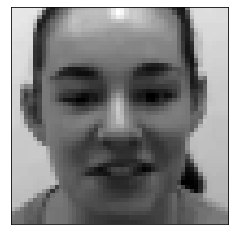

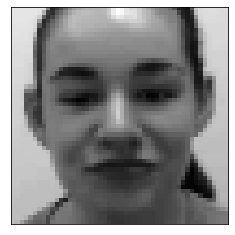

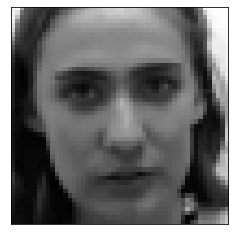

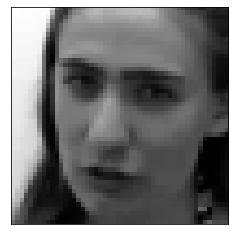

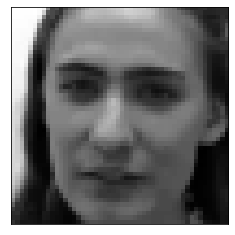

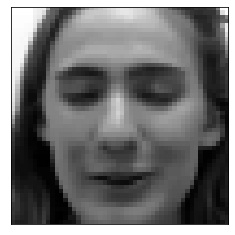

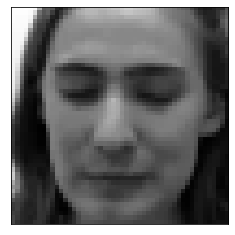

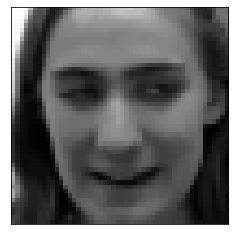

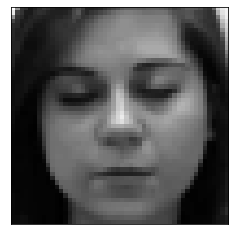

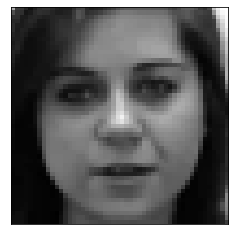

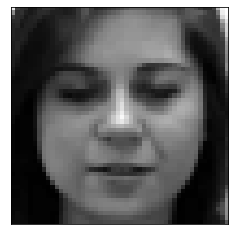

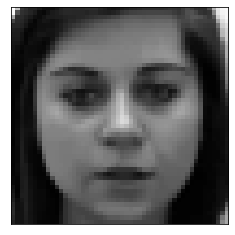

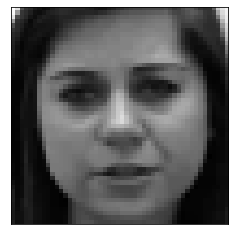

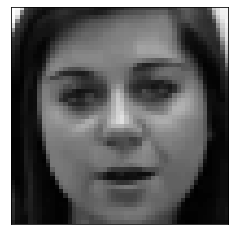

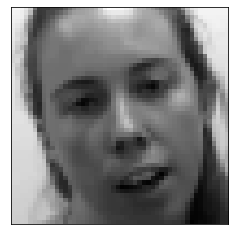

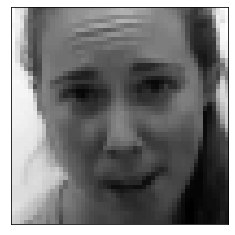

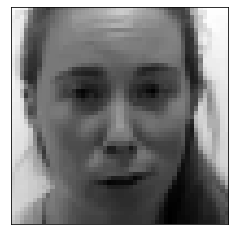

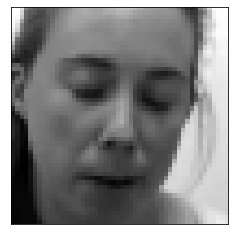

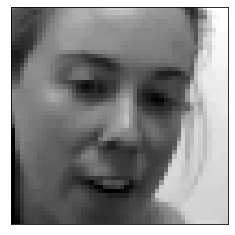

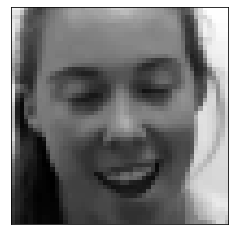

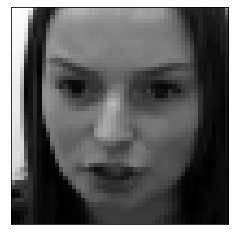

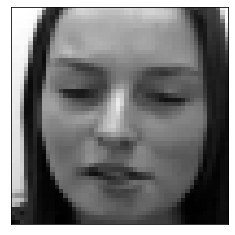

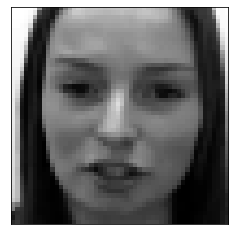

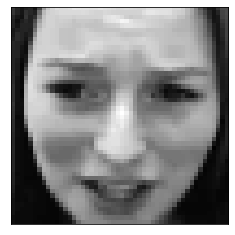

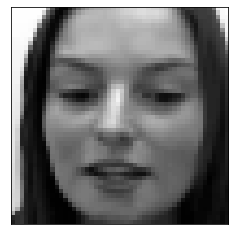

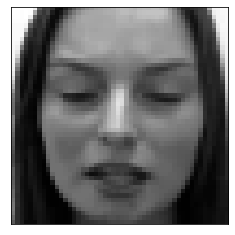

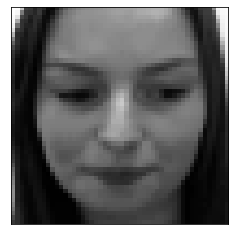

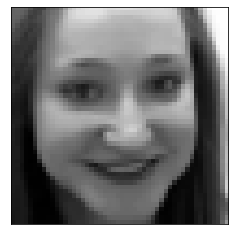

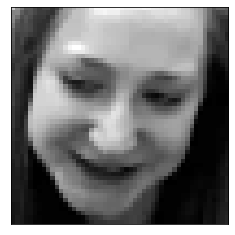

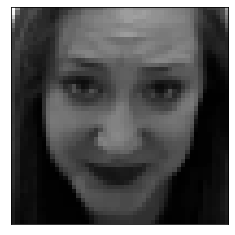

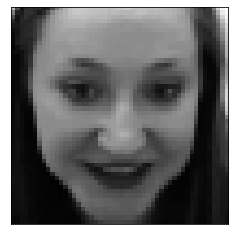

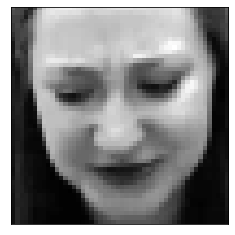

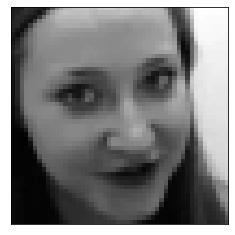

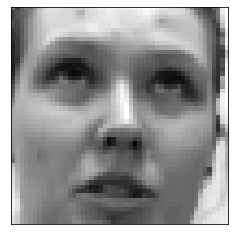

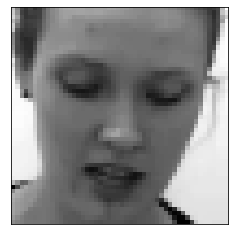

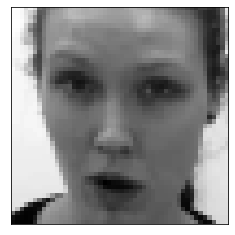

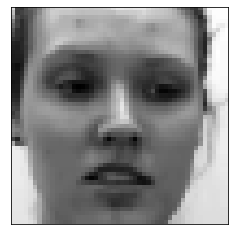

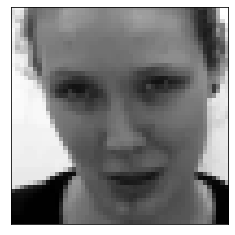

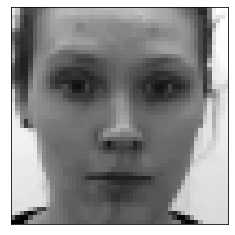

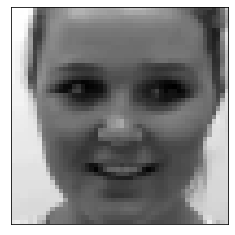

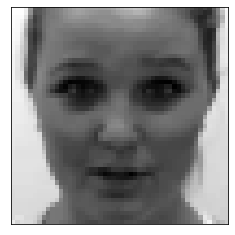

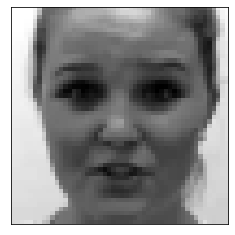

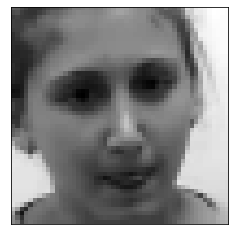

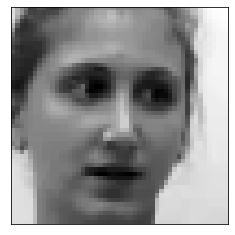

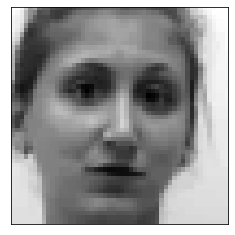

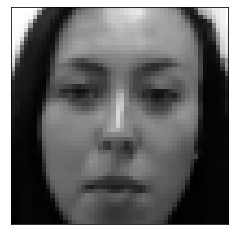

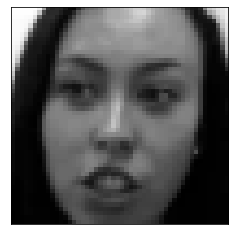

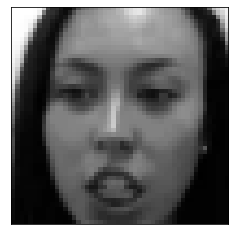

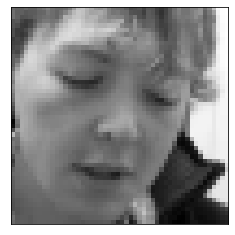

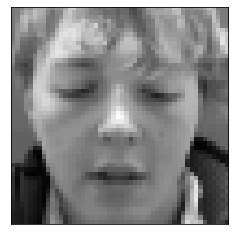

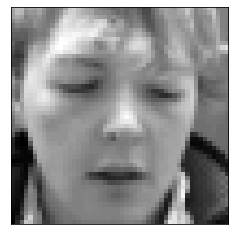

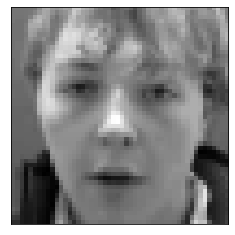

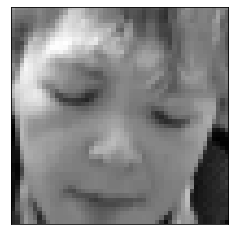

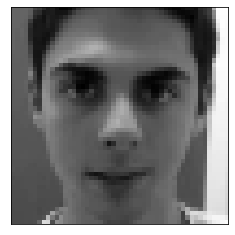

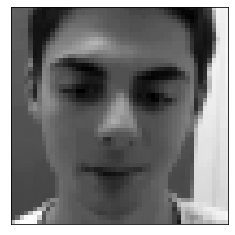

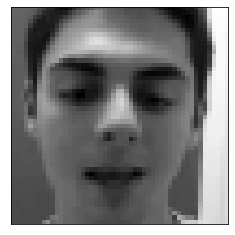

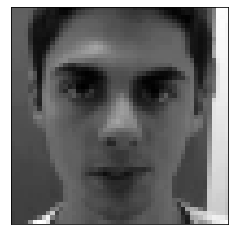

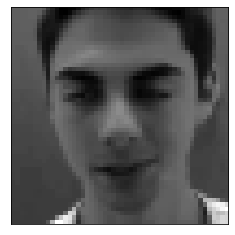

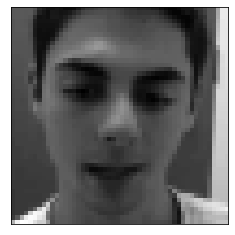

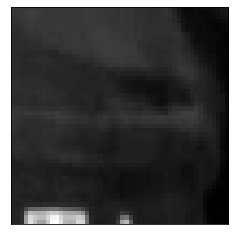

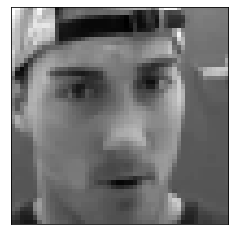

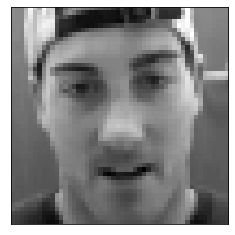

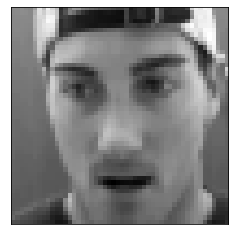

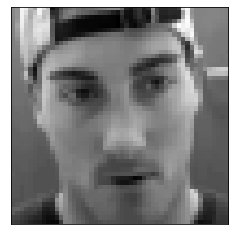

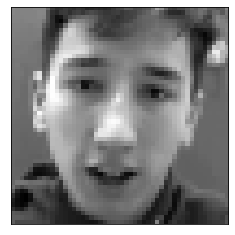

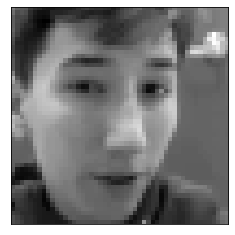

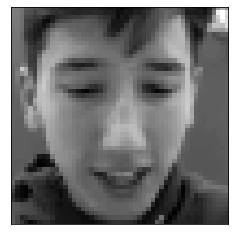

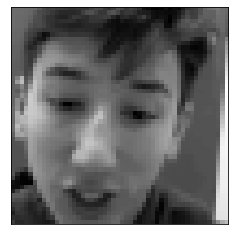

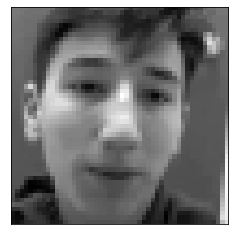

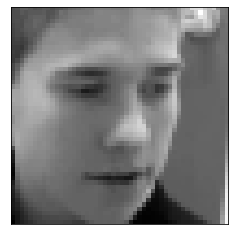

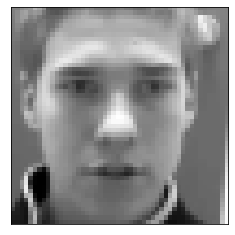

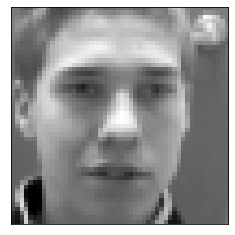

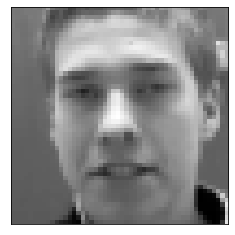

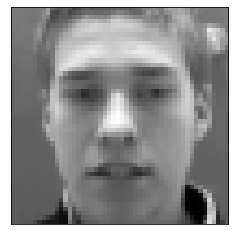

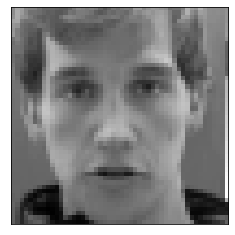

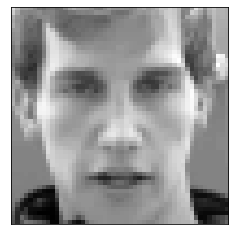

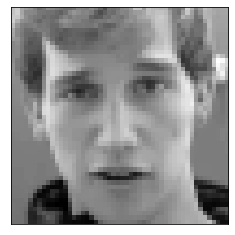

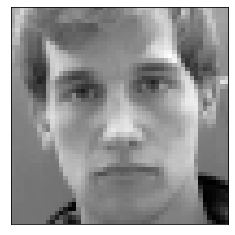

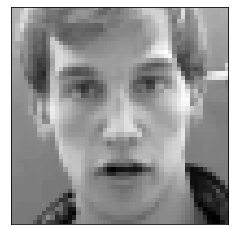

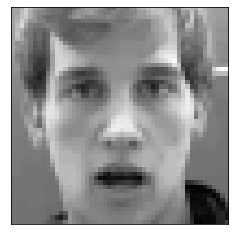

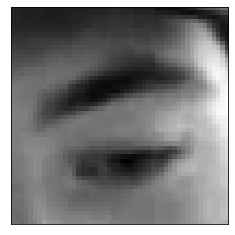

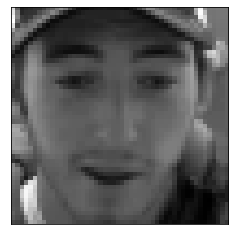

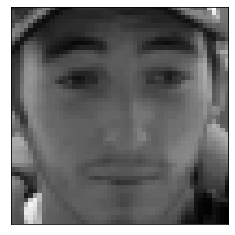

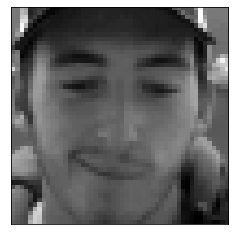

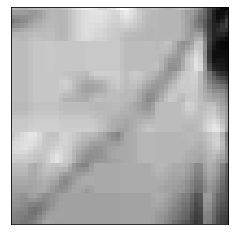

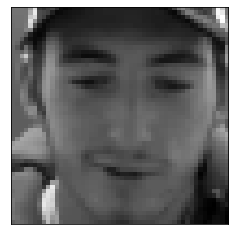

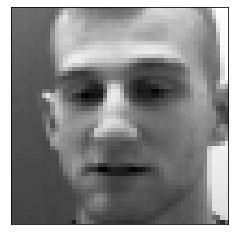

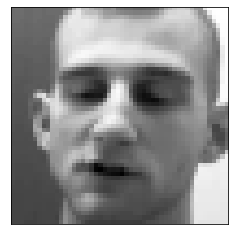

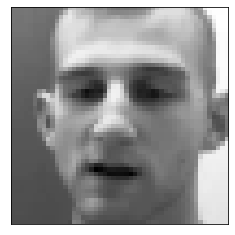

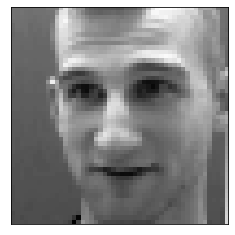

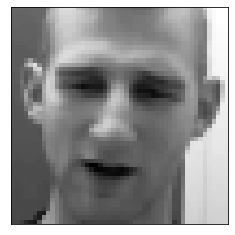

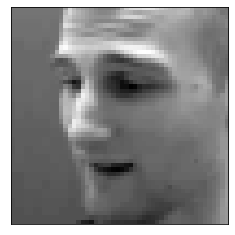

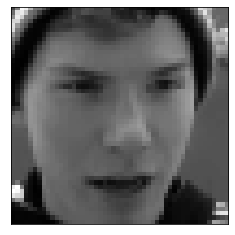

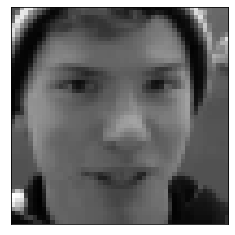

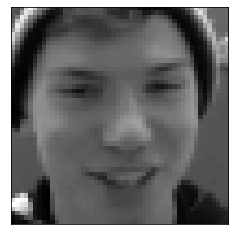

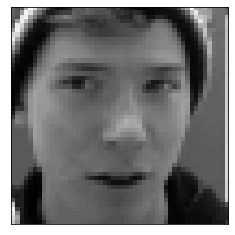

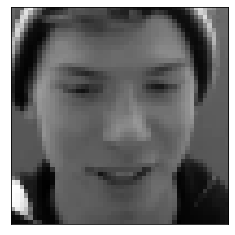

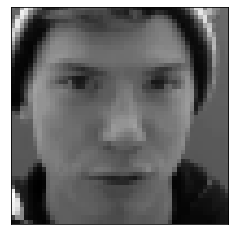

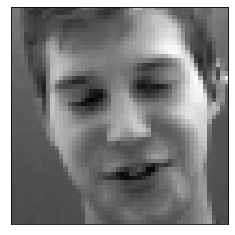

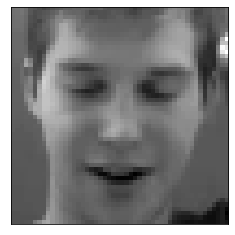

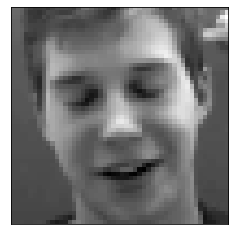

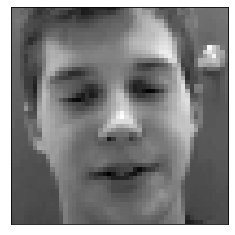

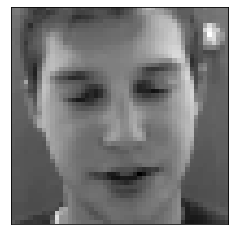

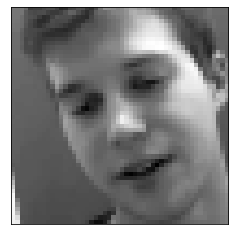

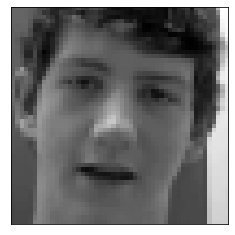

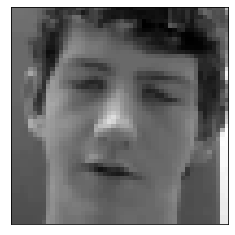

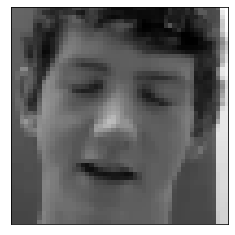

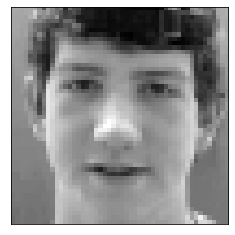

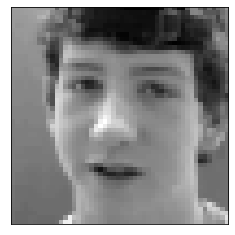

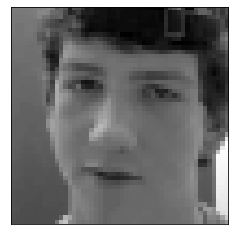

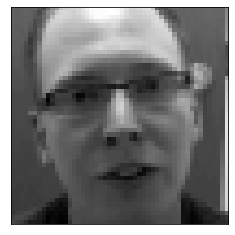

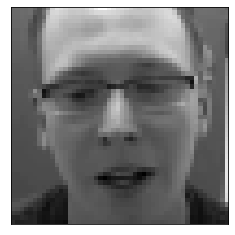

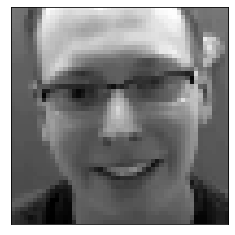

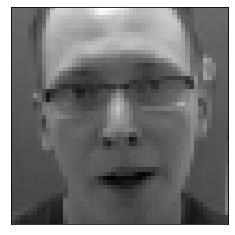

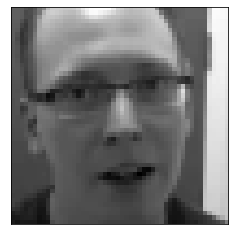

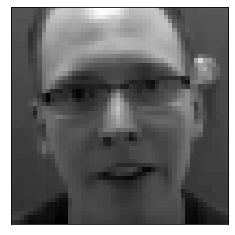

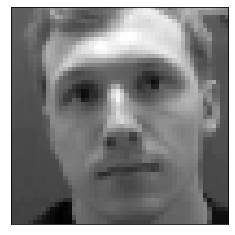

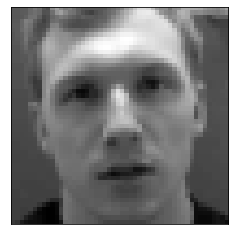

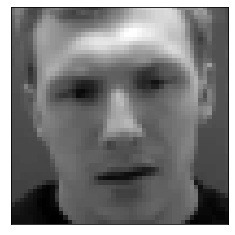

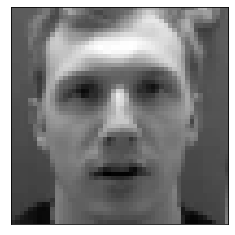

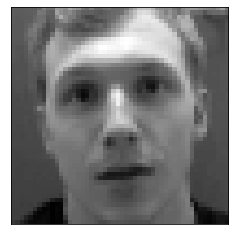

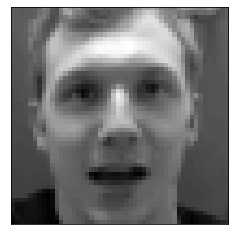

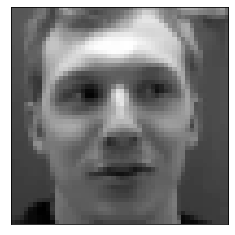

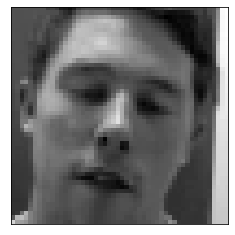

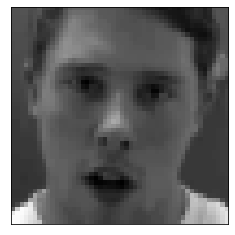

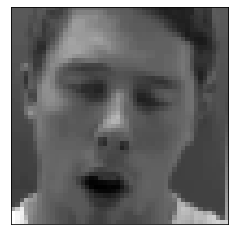

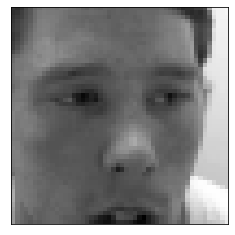

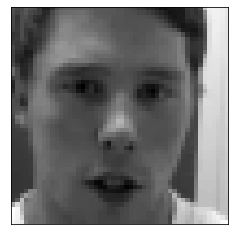

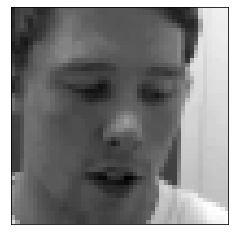

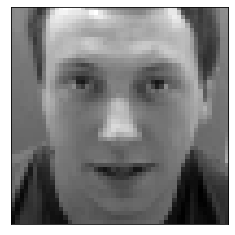

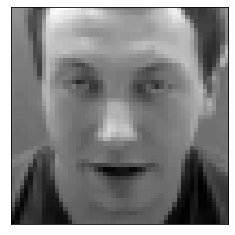

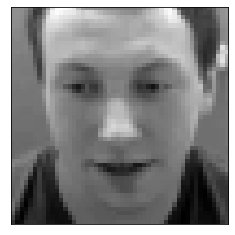

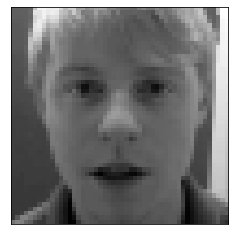

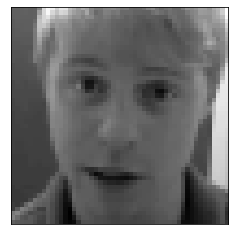

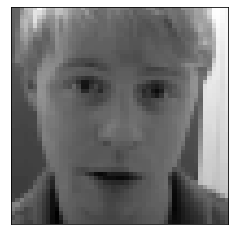

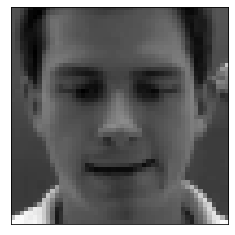

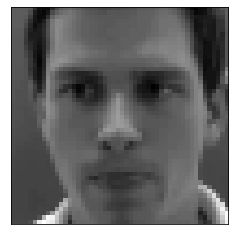

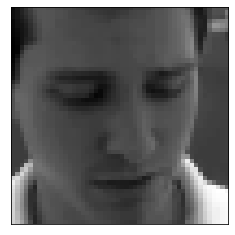

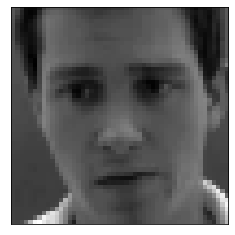

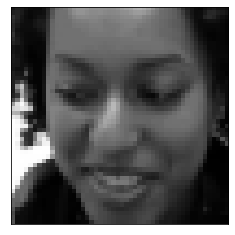

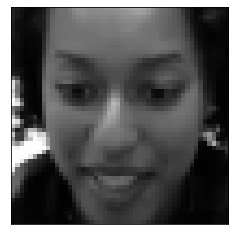

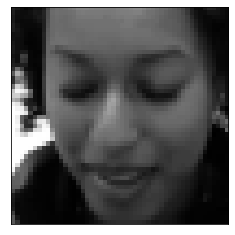

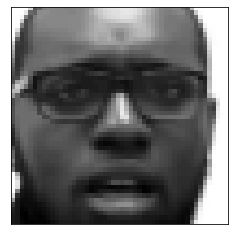

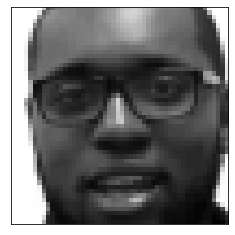

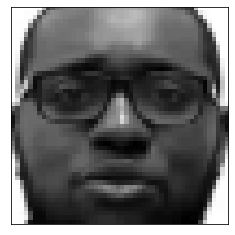

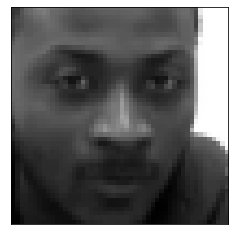

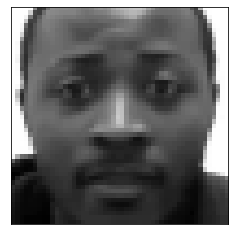

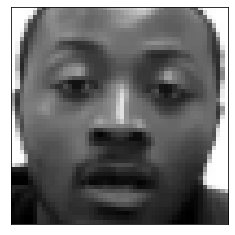

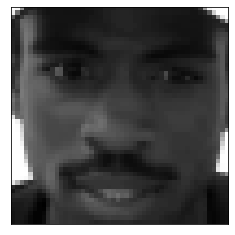

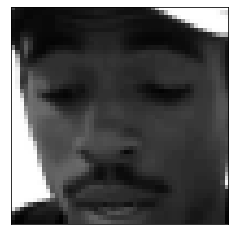

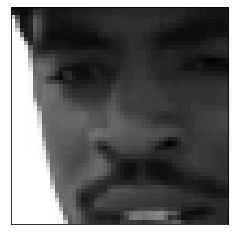

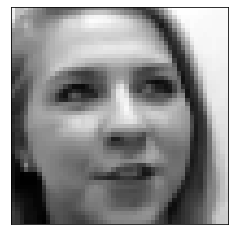

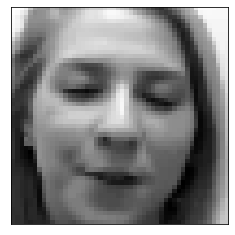

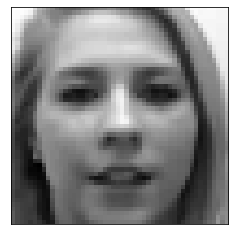

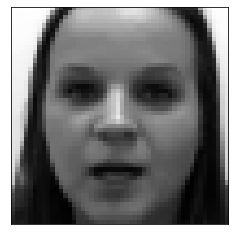

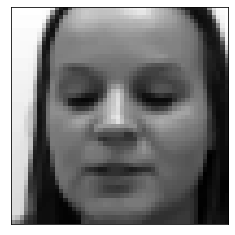

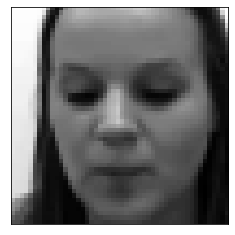

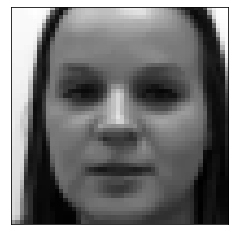

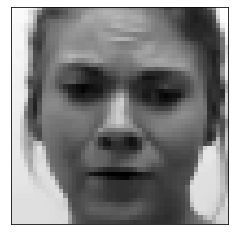

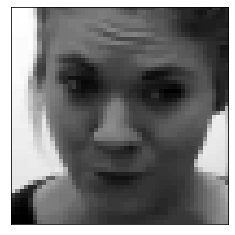

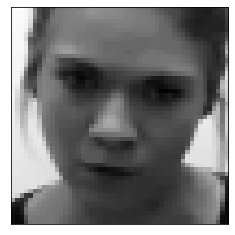

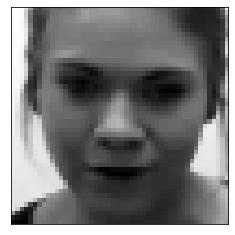

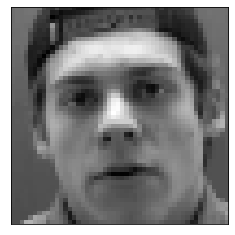

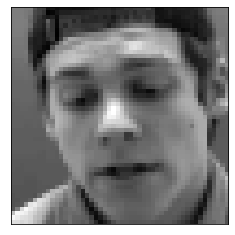

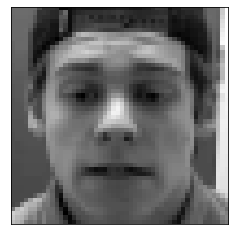

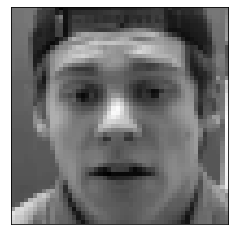

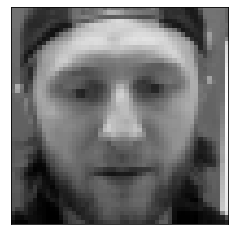

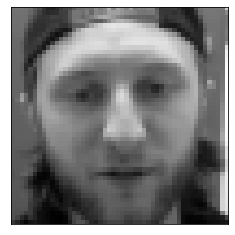

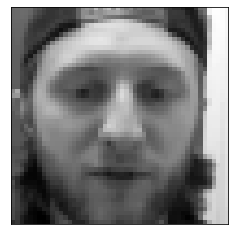

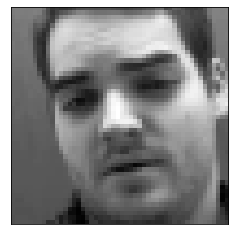

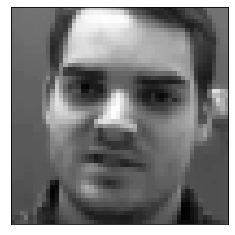

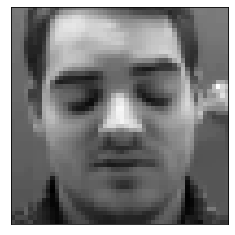

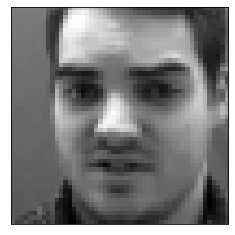

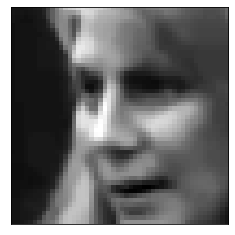

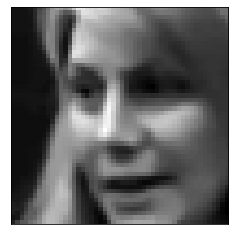

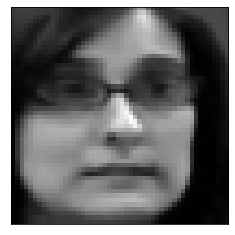

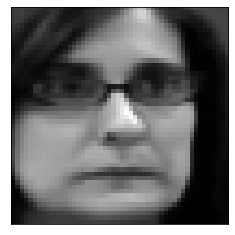

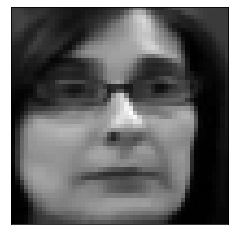

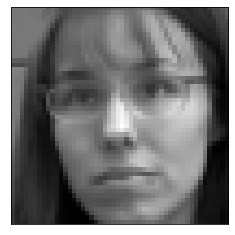

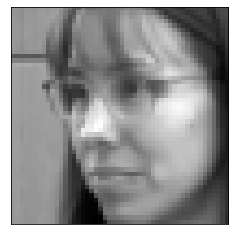

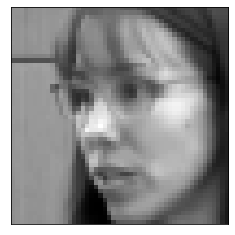

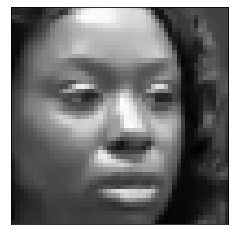

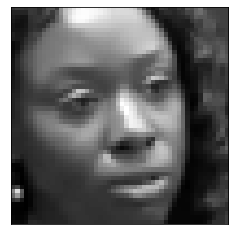

In [68]:
for x in range(836):
    plt.imshow(DataGSTrain[x][0], interpolation='none', cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()